# Data Preparation

## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

## Import Data
The dataset contains all available data for more than 800,000 consumer loans issued from 2007 to 2015 by Lending Club: a large US peer-to-peer lending company. There are several different versions of this dataset. We have used a version available on kaggle.com. You can find it here: https://www.kaggle.com/wendykan/lending-club-loan-data/version/1
We divided the data into two periods because we assume that some data are available at the moment when we need to build Expected Loss models, and some data comes from applications after. Later, we investigate whether the applications we have after we built the Probability of Default (PD) model have similar characteristics with the applications we used to build the PD model.

In [2]:
loan_data_backup = pd.read_csv('loan_data.csv')

In [3]:
#Make a copy of data before making any changes in original  data
loan_data = loan_data_backup.copy()

## Explore Data

In [4]:
loan_data

Unnamed: 0       id  member_id  loan_amnt  funded_amnt  \
0                0  1077501    1296599       5000         5000   
1                1  1077430    1314167       2500         2500   
2                2  1077175    1313524       2400         2400   
3                3  1076863    1277178      10000        10000   
4                4  1075358    1311748       3000         3000   
...            ...      ...        ...        ...          ...   
466280      466280  8598660    1440975      18400        18400   
466281      466281  9684700   11536848      22000        22000   
466282      466282  9584776   11436914      20700        20700   
466283      466283  9604874   11457002       2000         2000   
466284      466284  9199665   11061576      10000        10000   

        funded_amnt_inv        term  int_rate  installment grade  ...  \
0                4975.0   36 months     10.65       162.87     B  ...   
1                2500.0   60 months     15.27        59.83     C  ...   
2                2400.0   36 months     15.96        84.33     C  ...   
3               10000.0   36 months     13.49       339.31     C  ...   
4                3000.0   60 months     12.69        67.79     B  ...   
...                 ...         ...       ...          ...   ...  ...   
466280          18400.0   60 months     14.47       432.64     C  ...   
466281          22000.0   60 months     19.97       582.50     D  ...   
466282          20700.0   60 months     16.99       514.34     D  ...   
466283           2000.0   36 months      7.90        62.59     A  ...   
466284           9975.0   36 months     19.20       367.58     D  ...   

       total_bal_il il_util open_rv_12m open_rv_24m  max_bal_bc all_util  \
0               NaN     NaN         NaN         NaN         NaN      NaN   
1               NaN     NaN         NaN         NaN         NaN      NaN   
2               NaN     NaN         NaN         NaN         NaN      NaN   
3               NaN     NaN         NaN         NaN         NaN      NaN   
4               NaN     NaN         NaN         NaN         NaN      NaN   
...             ...     ...         ...         ...         ...      ...   
466280          NaN     NaN         NaN         NaN         NaN      NaN   
466281          NaN     NaN         NaN         NaN         NaN      NaN   
466282          NaN     NaN         NaN         NaN         NaN      NaN   
466283          NaN     NaN         NaN         NaN         NaN      NaN   
466284          NaN     NaN         NaN         NaN         NaN      NaN   

       total_rev_hi_lim inq_fi total_cu_tl inq_last_12m  
0                   NaN    NaN         NaN          NaN  
1                   NaN    NaN         NaN          NaN  
2                   NaN    NaN         NaN          NaN  
3                   NaN    NaN         NaN          NaN  
4                   NaN    NaN         NaN          NaN  
...                 ...    ...         ...          ...  
466280          29900.0    NaN         NaN          NaN  
466281          39400.0    NaN         NaN          NaN  
466282          13100.0    NaN         NaN          NaN  
466283          53100.0    NaN         NaN          NaN  
466284          16000.0    NaN         NaN          NaN  

[466285 rows x 75 columns]

In [5]:
pd.options.display.max_columns = None
#pd.options.display.max_rows = None
# Sets the pandas dataframe options to display all columns/ rows.

In [6]:
loan_data

Unnamed: 0       id  member_id  loan_amnt  funded_amnt  \
0                0  1077501    1296599       5000         5000   
1                1  1077430    1314167       2500         2500   
2                2  1077175    1313524       2400         2400   
3                3  1076863    1277178      10000        10000   
4                4  1075358    1311748       3000         3000   
...            ...      ...        ...        ...          ...   
466280      466280  8598660    1440975      18400        18400   
466281      466281  9684700   11536848      22000        22000   
466282      466282  9584776   11436914      20700        20700   
466283      466283  9604874   11457002       2000         2000   
466284      466284  9199665   11061576      10000        10000   

        funded_amnt_inv        term  int_rate  installment grade sub_grade  \
0                4975.0   36 months     10.65       162.87     B        B2   
1                2500.0   60 months     15.27        59.83     C        C4   
2                2400.0   36 months     15.96        84.33     C        C5   
3               10000.0   36 months     13.49       339.31     C        C1   
4                3000.0   60 months     12.69        67.79     B        B5   
...                 ...         ...       ...          ...   ...       ...   
466280          18400.0   60 months     14.47       432.64     C        C2   
466281          22000.0   60 months     19.97       582.50     D        D5   
466282          20700.0   60 months     16.99       514.34     D        D1   
466283           2000.0   36 months      7.90        62.59     A        A4   
466284           9975.0   36 months     19.20       367.58     D        D3   

                                    emp_title emp_length home_ownership  \
0                                         NaN  10+ years           RENT   
1                                       Ryder   < 1 year           RENT   
2                                         NaN  10+ years           RENT   
3                         AIR RESOURCES BOARD  10+ years           RENT   
4                    University Medical Group     1 year           RENT   
...                                       ...        ...            ...   
466280                     Financial Advisor     4 years       MORTGAGE   
466281  Chief of Interpretation (Park Ranger)  10+ years       MORTGAGE   
466282                                 patrol    7 years       MORTGAGE   
466283                   Server Engineer Lead    3 years            OWN   
466284                                    NaN  10+ years       MORTGAGE   

        annual_inc verification_status issue_d  loan_status pymnt_plan  \
0          24000.0            Verified  Dec-11   Fully Paid          n   
1          30000.0     Source Verified  Dec-11  Charged Off          n   
2          12252.0        Not Verified  Dec-11   Fully Paid          n   
3          49200.0     Source Verified  Dec-11   Fully Paid          n   
4          80000.0     Source Verified  Dec-11      Current          n   
...            ...                 ...     ...          ...        ...   
466280    110000.0     Source Verified  Jan-14      Current          n   
466281     78000.0            Verified  Jan-14  Charged Off          n   
466282     46000.0            Verified  Jan-14      Current          n   
466283     83000.0            Verified  Jan-14   Fully Paid          n   
466284     46000.0            Verified  Jan-14      Current          n   

                                                      url  \
0       https://www.lendingclub.com/browse/loanDetail....   
1       https://www.lendingclub.com/browse/loanDetail....   
2       https://www.lendingclub.com/browse/loanDetail....   
3       https://www.lendingclub.com/browse/loanDetail....   
4       https://www.lendingclub.com/browse/loanDetail....   
...                                                   ...   
466280  https://www.lendingclub.com/browse/loanDetail....   


In [7]:
loan_data.head()

Unnamed: 0       id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
0           0  1077501    1296599       5000         5000           4975.0   
1           1  1077430    1314167       2500         2500           2500.0   
2           2  1077175    1313524       2400         2400           2400.0   
3           3  1076863    1277178      10000        10000          10000.0   
4           4  1075358    1311748       3000         3000           3000.0   

         term  int_rate  installment grade sub_grade  \
0   36 months     10.65       162.87     B        B2   
1   60 months     15.27        59.83     C        C4   
2   36 months     15.96        84.33     C        C5   
3   36 months     13.49       339.31     C        C1   
4   60 months     12.69        67.79     B        B5   

                  emp_title emp_length home_ownership  annual_inc  \
0                       NaN  10+ years           RENT     24000.0   
1                     Ryder   < 1 year           RENT     30000.0   
2                       NaN  10+ years           RENT     12252.0   
3       AIR RESOURCES BOARD  10+ years           RENT     49200.0   
4  University Medical Group     1 year           RENT     80000.0   

  verification_status issue_d  loan_status pymnt_plan  \
0            Verified  Dec-11   Fully Paid          n   
1     Source Verified  Dec-11  Charged Off          n   
2        Not Verified  Dec-11   Fully Paid          n   
3     Source Verified  Dec-11   Fully Paid          n   
4     Source Verified  Dec-11      Current          n   

                                                 url  \
0  https://www.lendingclub.com/browse/loanDetail....   
1  https://www.lendingclub.com/browse/loanDetail....   
2  https://www.lendingclub.com/browse/loanDetail....   
3  https://www.lendingclub.com/browse/loanDetail....   
4  https://www.lendingclub.com/browse/loanDetail....   

                                                desc         purpose  \
0    Borrower added on 12/22/11 > I need to upgra...     credit_card   
1    Borrower added on 12/22/11 > I plan to use t...             car   
2                                                NaN  small_business   
3    Borrower added on 12/21/11 > to pay for prop...           other   
4    Borrower added on 12/21/11 > I plan on combi...           other   

                  title zip_code addr_state    dti  delinq_2yrs  \
0              Computer    860xx         AZ  27.65          0.0   
1                  bike    309xx         GA   1.00          0.0   
2  real estate business    606xx         IL   8.72          0.0   
3              personel    917xx         CA  20.00          0.0   
4              Personal    972xx         OR  17.94          0.0   

  earliest_cr_line  inq_last_6mths  mths_since_last_delinq  \
0           Jan-85             1.0                     NaN   
1           Apr-99             5.0                     NaN   
2           Nov-01             2.0                     NaN   
3           Feb-96             1.0                    35.0   
4           Jan-96             0.0                    38.0   

   mths_since_last_record  open_acc  pub_rec  revol_bal  revol_util  \
0                     NaN       3.0      0.0      13648        83.7   
1                     NaN       3.0      0.0       1687         9.4   
2                     NaN       2.0      0.0       2956        98.5   
3                     NaN      10.0      0.0       5598        21.0   
4                     NaN      15.0      0.0      27783        53.9   

   total_acc initial_list_status  out_prncp  out_prncp_inv   total_pymnt  \
0        9.0                   f        0.0            0.0   5861.071414   
1        4.0                   f        0.0            0.0   1008.710000   
2       10.0                   f        0.0            0.0   3003.653644   
3       37.0                   f        0.0            0.0  12226.302210   
4       38.0                   f      766.9          766.9   3242.170000   

   total_

In [8]:
loan_data.tail()

Unnamed: 0       id  member_id  loan_amnt  funded_amnt  \
466280      466280  8598660    1440975      18400        18400   
466281      466281  9684700   11536848      22000        22000   
466282      466282  9584776   11436914      20700        20700   
466283      466283  9604874   11457002       2000         2000   
466284      466284  9199665   11061576      10000        10000   

        funded_amnt_inv        term  int_rate  installment grade sub_grade  \
466280          18400.0   60 months     14.47       432.64     C        C2   
466281          22000.0   60 months     19.97       582.50     D        D5   
466282          20700.0   60 months     16.99       514.34     D        D1   
466283           2000.0   36 months      7.90        62.59     A        A4   
466284           9975.0   36 months     19.20       367.58     D        D3   

                                    emp_title emp_length home_ownership  \
466280                     Financial Advisor     4 years       MORTGAGE   
466281  Chief of Interpretation (Park Ranger)  10+ years       MORTGAGE   
466282                                 patrol    7 years       MORTGAGE   
466283                   Server Engineer Lead    3 years            OWN   
466284                                    NaN  10+ years       MORTGAGE   

        annual_inc verification_status issue_d  loan_status pymnt_plan  \
466280    110000.0     Source Verified  Jan-14      Current          n   
466281     78000.0            Verified  Jan-14  Charged Off          n   
466282     46000.0            Verified  Jan-14      Current          n   
466283     83000.0            Verified  Jan-14   Fully Paid          n   
466284     46000.0            Verified  Jan-14      Current          n   

                                                      url  \
466280  https://www.lendingclub.com/browse/loanDetail....   
466281  https://www.lendingclub.com/browse/loanDetail....   
466282  https://www.lendingclub.com/browse/loanDetail....   
466283  https://www.lendingclub.com/browse/loanDetail....   
466284  https://www.lendingclub.com/browse/loanDetail....   

                                                     desc             purpose  \
466280                                                NaN  debt_consolidation   
466281                                                NaN  debt_consolidation   
466282    Borrower added on 12/06/13 > I am going to c...  debt_consolidation   
466283                                                NaN         credit_card   
466284    Borrower added on 12/04/13 > I will like a l...               other   

                          title zip_code addr_state    dti  delinq_2yrs  \
466280       Debt consolidation    773xx         TX  19.85          0.0   
466281       Debt consolidation    377xx         TN  18.45          0.0   
466282       Debt consolidation    458xx         OH  25.65          0.0   
466283  Credit card refinancing    913xx         CA   5.39          3.0   
466284                    Other    950xx         CA  22.78          1.0   

       earliest_cr_line  inq_last_6mths  mths_since_last_delinq  \
466280           Apr-03             2.0                     NaN   
466281           Jun-97             5.0                     NaN   
466282           Dec-01             2.0                    65.0   
466283           Feb-03             1.0                    13.0   
466284           Feb-00             0.0                     9.0   

        mths_since_last_record  open_acc  pub_rec  revol_bal  revol_util  \
466280                     NaN      18.0      0.0      23208        77.6   
466281                   116.0      18.0      1.0      18238        46.3   
466282                     NaN      18.0      0.0       6688        51.1   
466283                     NaN      21.0      0.0      11404        21.5   
466284                     NaN       6.0      0.0      11325        70.8   

        total_acc initial_list_status  out_prncp  out_prncp_inv   total_pymnt  \


In [9]:
loan_data.columns.values
# Displays all column names.

array(['Unnamed: 0', 'id', 'member_id', 'loan_amnt', 'funded_amnt',
       'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade',
       'sub_grade', 'emp_title', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'pymnt_plan', 'url', 'desc', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee',
       'recoveries', 'collection_recovery_fee', 'last_pymnt_d',
       'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'policy_code', 'application_type', 'annual_inc_joint', 'dti_joint',
       'veri

In [10]:
loan_data.info()
# Displays column names, complete (non-missing) cases per column, and datatype per column.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

# ***General Preprocessing***

Preprocessing few continuous variables

In [11]:
#its in object type we have to change it in int
loan_data['emp_length'].unique()

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years', nan],
      dtype=object)

In [12]:
# using str.replace method it have 2 parameter it replaces all strings of series with new strings
# str.repalce(<string to be replaced>,<new replacement strings>)
loan_data['emp_length_int'] = loan_data['emp_length'].str.replace('\+ years','')
loan_data['emp_length_int'] = loan_data['emp_length_int'].str.replace('< 1 year',str(0))
loan_data['emp_length_int'] = loan_data['emp_length_int'].str.replace('n/a',str(0))
loan_data['emp_length_int'] = loan_data['emp_length_int'].str.replace(' years','')
loan_data['emp_length_int'] = loan_data['emp_length_int'].str.replace('year','')

In [13]:
# We store the preprocessed ‘employment length’ variable in a new variable called ‘employment length int’,
# We assign the new ‘employment length int’ to be equal to the ‘employment length’ variable with the string ‘+ years’
# replaced with nothing. Next, we replace the whole string ‘less than 1 year’ with the string ‘0’.
# Then, we replace the ‘n/a’ string with the string ‘0’. Then, we replace the string ‘space years’ with nothing.
# Finally, we replace the string ‘space year’ with nothing.

In [14]:
type(loan_data['emp_length_int'][0])

str

In [15]:
loan_data['emp_length_int'] = pd.to_numeric(loan_data['emp_length_int'])

In [16]:
type(loan_data['emp_length_int'][0])

numpy.float64

In [17]:
#change earliest_cr_line to data time data type #%b and %y is used to convert the string into date time
loan_data['earliest_cr_line_date'] = pd.to_datetime(loan_data['earliest_cr_line'],format = '%b-%y')

In [18]:
#it convert into time series
type(loan_data['earliest_cr_line_date'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [19]:
#now we have to set a refrence time that is passed 
#Calculates the difference between two dates and times.
pd.to_datetime('2017-12-01')-loan_data['earliest_cr_line_date']

0        12022 days
1         6819 days
2         5874 days
3         7974 days
4         8005 days
            ...    
466280    5358 days
466281    7488 days
466282    5844 days
466283    5417 days
466284    6513 days
Name: earliest_cr_line_date, Length: 466285, dtype: timedelta64[ns]

In [20]:
# convert it into months assume we are now 2017-12-01
# We calculate the difference between two dates in months, turn it to numeric datatype and round it.
# We save the result in a new variable.
loan_data['mths_since_earliest_cr_line'] = round(pd.to_numeric((pd.to_datetime('2017-12-01')-loan_data['earliest_cr_line_date'])/ np.timedelta64(1,'M')))

In [21]:
#describe the mths_since_earliest_cr_line column
loan_data['mths_since_earliest_cr_line'].describe()
#it is impossible that the time in negative

count    466256.000000
mean        239.482430
std          93.974829
min        -612.000000
25%         183.000000
50%         225.000000
75%         285.000000
max         587.000000
Name: mths_since_earliest_cr_line, dtype: float64

In [22]:
# solve this issue
loan_data.loc[:,['earliest_cr_line','earliest_cr_line_date','mths_since_earliest_cr_line']][loan_data['mths_since_earliest_cr_line']<0]

earliest_cr_line earliest_cr_line_date  mths_since_earliest_cr_line
1580             Sep-62            2062-09-01                       -537.0
1770             Sep-68            2068-09-01                       -609.0
2799             Sep-64            2064-09-01                       -561.0
3282             Sep-67            2067-09-01                       -597.0
3359             Feb-65            2065-02-01                       -566.0
...                 ...                   ...                          ...
464003           Jan-68            2068-01-01                       -601.0
464260           Jul-66            2066-07-01                       -583.0
465100           Oct-67            2067-10-01                       -598.0
465500           Sep-67            2067-09-01                       -597.0
465655           Jan-56            2056-01-01                       -457.0

[1169 rows x 3 columns]

In [23]:
# we remove these row because we have more than 466000 data, and its only 1169rows

In [24]:
# another approach we can impute this valuse with max no of months
# We set the rows that had negative differences to the maximum value.
loan_data['mths_since_earliest_cr_line'][loan_data['mths_since_earliest_cr_line']<0]=loan_data['mths_since_earliest_cr_line'].max()

In [25]:
# Calculates and shows the minimum value of a column.
min(loan_data['mths_since_earliest_cr_line'])

73.0

In [26]:
loan_data['term']

0          36 months
1          60 months
2          36 months
3          36 months
4          60 months
             ...    
466280     60 months
466281     60 months
466282     60 months
466283     36 months
466284     36 months
Name: term, Length: 466285, dtype: object

In [27]:
loan_data['term'].describe()
# Shows some descriptive statisics for the values of a column.

count         466285
unique             2
top        36 months
freq          337953
Name: term, dtype: object

In [28]:
loan_data['term_int'] = loan_data['term'].str.replace(' months', '')
# We replace a string with another string, in this case, with an empty strng (i.e. with nothing).

In [29]:
loan_data['term_int']

0          36
1          60
2          36
3          36
4          60
         ... 
466280     60
466281     60
466282     60
466283     36
466284     36
Name: term_int, Length: 466285, dtype: object

In [30]:
type(loan_data['term_int'][25])
# Checks the datatype of a single element of a column.

str

In [31]:
loan_data['term_int'] = pd.to_numeric(loan_data['term'].str.replace(' months', ''))
# We remplace a string from a variable with another string, in this case, with an empty strng (i.e. with nothing).
# We turn the result to numeric datatype and save it in another variable.
loan_data['term_int']

0         36
1         60
2         36
3         36
4         60
          ..
466280    60
466281    60
466282    60
466283    36
466284    36
Name: term_int, Length: 466285, dtype: int64

In [32]:
type(loan_data['term_int'][0])
# Checks the datatype of a single element of a column.

numpy.int64

In [33]:
loan_data['issue_d']

0         Dec-11
1         Dec-11
2         Dec-11
3         Dec-11
4         Dec-11
           ...  
466280    Jan-14
466281    Jan-14
466282    Jan-14
466283    Jan-14
466284    Jan-14
Name: issue_d, Length: 466285, dtype: object

In [34]:
# Assume we are now in 2017-12-01
loan_data['issue_d_date'] = pd.to_datetime(loan_data['issue_d'], format = '%b-%y')
# Extracts the date and the time from a string variable that is in a given format.
loan_data['mths_since_issue_d'] = round(pd.to_numeric((pd.to_datetime('2017-12-01') - loan_data['issue_d_date']) / np.timedelta64(1, 'M')))
# We calculate the difference between two dates in months, turn it to numeric datatype and round it.
# We save the result in a new variable.
loan_data['mths_since_issue_d'].describe()
# Shows some descriptive statisics for the values of a column.

count    466285.000000
mean         51.255187
std          14.340154
min          36.000000
25%          41.000000
50%          47.000000
75%          57.000000
max         126.000000
Name: mths_since_issue_d, dtype: float64

# ***Preprocessing few discrete variables***

In [35]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 81 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   Unnamed: 0                   466285 non-null  int64         
 1   id                           466285 non-null  int64         
 2   member_id                    466285 non-null  int64         
 3   loan_amnt                    466285 non-null  int64         
 4   funded_amnt                  466285 non-null  int64         
 5   funded_amnt_inv              466285 non-null  float64       
 6   term                         466285 non-null  object        
 7   int_rate                     466285 non-null  float64       
 8   installment                  466285 non-null  float64       
 9   grade                        466285 non-null  object        
 10  sub_grade                    466285 non-null  object        
 11  emp_title                 

In [36]:
#pandas has inbulit fuction to convert it into dummie variable
# dummie variable like onehotencoder
pd.get_dummies(loan_data['grade'])

A  B  C  D  E  F  G
0       0  1  0  0  0  0  0
1       0  0  1  0  0  0  0
2       0  0  1  0  0  0  0
3       0  0  1  0  0  0  0
4       0  1  0  0  0  0  0
...    .. .. .. .. .. .. ..
466280  0  0  1  0  0  0  0
466281  0  0  0  1  0  0  0
466282  0  0  0  1  0  0  0
466283  1  0  0  0  0  0  0
466284  0  0  0  1  0  0  0

[466285 rows x 7 columns]

In [37]:
# but its not showing categories to solve this use prefix 
pd.get_dummies(loan_data['grade'],prefix='grade',prefix_sep=':')

grade:A  grade:B  grade:C  grade:D  grade:E  grade:F  grade:G
0             0        1        0        0        0        0        0
1             0        0        1        0        0        0        0
2             0        0        1        0        0        0        0
3             0        0        1        0        0        0        0
4             0        1        0        0        0        0        0
...         ...      ...      ...      ...      ...      ...      ...
466280        0        0        1        0        0        0        0
466281        0        0        0        1        0        0        0
466282        0        0        0        1        0        0        0
466283        1        0        0        0        0        0        0
466284        0        0        0        1        0        0        0

[466285 rows x 7 columns]

In [38]:
#using same method convert rest features which required
loan_data_dummies = [pd.get_dummies(loan_data['grade'],prefix='grade',prefix_sep=':'),
                    pd.get_dummies(loan_data['sub_grade'],prefix='sub_grade',prefix_sep=':'),
                    pd.get_dummies(loan_data['home_ownership'],prefix='home_ownership',prefix_sep=':'),
                    pd.get_dummies(loan_data['verification_status'],prefix='verification_status',prefix_sep=':'),
                    pd.get_dummies(loan_data['loan_status'],prefix='loan_status',prefix_sep=':'),
                    pd.get_dummies(loan_data['purpose'],prefix='purpose',prefix_sep=':'),
                    pd.get_dummies(loan_data['addr_state'],prefix='addr_state',prefix_sep=':'),
                    pd.get_dummies(loan_data['initial_list_status'],prefix='initial_list_status',prefix_sep=':')
                    ]

In [39]:
loan_data_dummies = pd.concat(loan_data_dummies,axis=1)

In [40]:
type(loan_data_dummies)

pandas.core.frame.DataFrame

In [41]:
loan_data_dummies

grade:A  grade:B  grade:C  grade:D  grade:E  grade:F  grade:G  \
0             0        1        0        0        0        0        0   
1             0        0        1        0        0        0        0   
2             0        0        1        0        0        0        0   
3             0        0        1        0        0        0        0   
4             0        1        0        0        0        0        0   
...         ...      ...      ...      ...      ...      ...      ...   
466280        0        0        1        0        0        0        0   
466281        0        0        0        1        0        0        0   
466282        0        0        0        1        0        0        0   
466283        1        0        0        0        0        0        0   
466284        0        0        0        1        0        0        0   

        sub_grade:A1  sub_grade:A2  sub_grade:A3  sub_grade:A4  sub_grade:A5  \
0                  0             0             0             0             0   
1                  0             0             0             0             0   
2                  0             0             0             0             0   
3                  0             0             0             0             0   
4                  0             0             0             0             0   
...              ...           ...           ...           ...           ...   
466280             0             0             0             0             0   
466281             0             0             0             0             0   
466282             0             0             0             0             0   
466283             0             0             0             1             0   
466284             0             0             0             0             0   

        sub_grade:B1  sub_grade:B2  sub_grade:B3  sub_grade:B4  sub_grade:B5  \
0                  0             1             0             0             0   
1                  0             0             0             0             0   
2                  0             0             0             0             0   
3                  0             0             0             0             0   
4                  0             0             0             0             1   
...              ...           ...           ...           ...           ...   
466280             0             0             0             0             0   
466281             0             0             0             0             0   
466282             0             0             0             0             0   
466283             0             0             0             0             0   
466284             0             0             0             0             0   

        sub_grade:C1  sub_grade:C2  sub_grade:C3  sub_grade:C4  sub_grade:C5  \
0                  0             0             0             0             0   
1                  0             0             0             1             0   
2                  0             0             0             0             1   
3                  1             0             0             0             0   
4                  0             0             0             0             0   
...              ...           ...           ...           ...           ...   
466280             0             1             0             0             0   
466281             0             0             0             0             0   
466282             0             0             0             0             0   
466283             0             0             0             0             0   
466284             0             0             0             0             0   

        sub_grade:D1  sub_grade:D2  sub_grade:D3  sub_grade:D4  sub_grade:D5  \
0                  0             0             0             0             0   
1                  0             0             0             0             0   
2       

In [42]:
#if u want to concat by row, use axis = 0
#if u want to concat bycolumn, use axis = 1
# add into data frame
loan_data = pd.concat([loan_data,loan_data_dummies],axis=1)

# ***checking missing values and clean***

In [43]:
#check 1st null values
pd.options.display.max_rows=None
loan_data.isnull().sum()

Unnamed: 0                                                              0
id                                                                      0
member_id                                                               0
loan_amnt                                                               0
funded_amnt                                                             0
funded_amnt_inv                                                         0
term                                                                    0
int_rate                                                                0
installment                                                             0
grade                                                                   0
sub_grade                                                               0
emp_title                                                           27588
emp_length                                                          21008
home_ownership                        

In [44]:
# variables we will need for the analysis
# annual_inc
# delling_2yrs
# inq_last_6mths
# open_acc
# pub_rec
# total_acc
# acc_now_delling
# total_rev_hi_lim
# emp_length_int
# mths_since_earliest_cr_line

In [45]:
# one way to remove the missing value remove the all row where missing value exist
# another way to deal with missing value and impute it
# df.fillna(new_values, [inplace])
# Sets the pandas dataframe options to display 100 columns/ rows.
pd.options.display.max_rows = 100
loan_data['total_rev_hi_lim'].fillna(loan_data['funded_amnt'], inplace = True)

In [46]:
loan_data['total_rev_hi_lim'].isnull().sum()

0

In [47]:
loan_data['annual_inc'].fillna(loan_data['annual_inc'].mean(), inplace=True)
# We fill the missing values with the mean value of the non-missing values.

In [48]:
loan_data['mths_since_earliest_cr_line'].fillna(0, inplace=True)
loan_data['acc_now_delinq'].fillna(0, inplace=True)
loan_data['total_acc'].fillna(0, inplace=True)
loan_data['pub_rec'].fillna(0, inplace=True)
loan_data['open_acc'].fillna(0, inplace=True)
loan_data['inq_last_6mths'].fillna(0, inplace=True)
loan_data['delinq_2yrs'].fillna(0, inplace=True)
loan_data['emp_length_int'].fillna(0, inplace=True)
# We fill the missing values with zeroes.

# **PD MODEL(PROBABILITY DEFAULT)**

# **DATA PREPEARATION **

In [49]:
#dependent variable. Good/Bad(default) definition. default and non-default accounts.

In [50]:
# check loan status
loan_data['loan_status'].unique()

array(['Fully Paid', 'Charged Off', 'Current', 'Default',
       'Late (31-120 days)', 'In Grace Period', 'Late (16-30 days)',
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off'],
      dtype=object)

In [51]:
#lets check values for each status
loan_data['loan_status'].value_counts()

Current                                                224226
Fully Paid                                             184739
Charged Off                                             42475
Late (31-120 days)                                       6900
In Grace Period                                          3146
Does not meet the credit policy. Status:Fully Paid       1988
Late (16-30 days)                                        1218
Default                                                   832
Does not meet the credit policy. Status:Charged Off       761
Name: loan_status, dtype: int64

In [52]:
#lets check the proportion of loan_status with status
loan_data['loan_status'].value_counts()/loan_data['loan_status'].count()

Current                                                0.480878
Fully Paid                                             0.396193
Charged Off                                            0.091092
Late (31-120 days)                                     0.014798
In Grace Period                                        0.006747
Does not meet the credit policy. Status:Fully Paid     0.004263
Late (16-30 days)                                      0.002612
Default                                                0.001784
Does not meet the credit policy. Status:Charged Off    0.001632
Name: loan_status, dtype: float64

In [53]:
# Good/ Bad Definition
loan_data['good_bad'] = np.where(loan_data['loan_status'].isin(['Charged Off', 'Default',
                                                       'Does not meet the credit policy. Status:Charged Off',
                                                       'Late (31-120 days)']), 0, 1)
# We create a new variable that has the value of '0' if a condition is met, and the value of '1' if it is not met.

In [54]:
loan_data['good_bad']

0         1
1         0
2         1
3         1
4         1
         ..
466280    1
466281    0
466282    1
466283    1
466284    1
Name: good_bad, Length: 466285, dtype: int32

# ***Splitting Data***

In [55]:
from sklearn.model_selection import train_test_split

In [56]:
loan_data_inputs_train,loan_data_inputs_test,loan_data_targets_train,loan_data_targets_test= train_test_split(loan_data.drop('good_bad',axis=1),loan_data['good_bad'], random_state = 42 )

In [57]:
loan_data_inputs_train.shape

(349713, 207)

In [58]:
loan_data_inputs_test.shape

(116572, 207)

In [59]:
loan_data_targets_train.shape

(349713,)

In [60]:
loan_data_targets_test.shape

(116572,)

# ***Data Preparation***

In [61]:
#discrete variables dont need fine classing(splitting into categories) because they are already categorical bt definition

In [62]:
###
df_inputs_prepr = loan_data_inputs_test
df_targets_prepr = loan_data_targets_test

In [63]:
df_inputs_prepr['grade'].unique()

array(['C', 'E', 'A', 'D', 'B', 'F', 'G'], dtype=object)

In [64]:
df1=pd.concat([df_inputs_prepr['grade'],df_targets_prepr],axis=1)
df1.head()

grade  good_bad
362514     C         1
288564     E         1
213591     C         1
263083     C         1
165001     A         1

A = HIGHEST CREDIT WORTHINESS


G = LOWEST CREDIT WORTHINESS

### calculating weight of evidence

In [65]:
# we claculate weight of evidence WOE = LN(%GOODj/%BADj)
# to calculate this we have find the propertion of good and bad of grade

In [66]:
# find the proportion of grade we used group by
df1.groupby(df1.columns.values[0],as_index=False)[df1.columns.values[1]].count()

grade  good_bad
0     A     18786
1     B     34141
2     C     31290
3     D     19210
4     E      8967
5     F      3329
6     G       849

In [67]:
# now we reuired proportion of good_bad for each group
# 1 if good, 0 = bad 
# we get the propertion by avg
df1.groupby(df1.columns.values[0],as_index=False)[df1.columns.values[1]].mean()

grade  good_bad
0     A  0.961674
1     B  0.922761
2     C  0.883765
3     D  0.844300
4     E  0.803056
5     F  0.772604
6     G  0.714959

In [68]:
df1 = pd.concat([df1.groupby(df1.columns.values[0],as_index=False)[df1.columns.values[1]].count(),
    df1.groupby(df1.columns.values[0],as_index=False)[df1.columns.values[1]].mean()],axis=1)

In [69]:
df1

grade  good_bad grade  good_bad
0     A     18786     A  0.961674
1     B     34141     B  0.922761
2     C     31290     C  0.883765
3     D     19210     D  0.844300
4     E      8967     E  0.803056
5     F      3329     F  0.772604
6     G       849     G  0.714959

In [70]:
df1=df1.iloc[:,[0,1,3]]

In [71]:
df1

grade  good_bad  good_bad
0     A     18786  0.961674
1     B     34141  0.922761
2     C     31290  0.883765
3     D     19210  0.844300
4     E      8967  0.803056
5     F      3329  0.772604
6     G       849  0.714959

In [72]:
df1.columns = [df1.columns.values[0],'n_obs','prop_good']

In [73]:
df1

grade  n_obs  prop_good
0     A  18786   0.961674
1     B  34141   0.922761
2     C  31290   0.883765
3     D  19210   0.844300
4     E   8967   0.803056
5     F   3329   0.772604
6     G    849   0.714959

In [74]:
df1['prop_n_obs'] = df1['n_obs']/df1['n_obs'].sum()
df1

grade  n_obs  prop_good  prop_n_obs
0     A  18786   0.961674    0.161154
1     B  34141   0.922761    0.292875
2     C  31290   0.883765    0.268418
3     D  19210   0.844300    0.164791
4     E   8967   0.803056    0.076922
5     F   3329   0.772604    0.028557
6     G    849   0.714959    0.007283

In [75]:
#lets  calculate no of good and bad powers by grade
df1['n_good'] = df1['prop_good']*df1['n_obs']
df1['n_bad'] = (1-df1['prop_good'])*df1['n_obs']
df1

grade  n_obs  prop_good  prop_n_obs   n_good   n_bad
0     A  18786   0.961674    0.161154  18066.0   720.0
1     B  34141   0.922761    0.292875  31504.0  2637.0
2     C  31290   0.883765    0.268418  27653.0  3637.0
3     D  19210   0.844300    0.164791  16219.0  2991.0
4     E   8967   0.803056    0.076922   7201.0  1766.0
5     F   3329   0.772604    0.028557   2572.0   757.0
6     G    849   0.714959    0.007283    607.0   242.0

In [76]:
# calculate good and bad propertion for each grade
df1['prop_n_good'] = df1['n_good']/df1['n_good'].sum()
df1['prop_n_bad'] = df1['n_bad']/df1['n_bad'].sum()
df1

grade  n_obs  prop_good  prop_n_obs   n_good   n_bad  prop_n_good  \
0     A  18786   0.961674    0.161154  18066.0   720.0     0.174009   
1     B  34141   0.922761    0.292875  31504.0  2637.0     0.303442   
2     C  31290   0.883765    0.268418  27653.0  3637.0     0.266350   
3     D  19210   0.844300    0.164791  16219.0  2991.0     0.156219   
4     E   8967   0.803056    0.076922   7201.0  1766.0     0.069359   
5     F   3329   0.772604    0.028557   2572.0   757.0     0.024773   
6     G    849   0.714959    0.007283    607.0   242.0     0.005847   

   prop_n_bad  
0    0.056471  
1    0.206824  
2    0.285255  
3    0.234588  
4    0.138510  
5    0.059373  
6    0.018980

In [77]:
#lets update in WOE
df1['WOE'] =  np.log(df1['prop_n_good']/df1['prop_n_bad'])
df1

grade  n_obs  prop_good  prop_n_obs   n_good   n_bad  prop_n_good  \
0     A  18786   0.961674    0.161154  18066.0   720.0     0.174009   
1     B  34141   0.922761    0.292875  31504.0  2637.0     0.303442   
2     C  31290   0.883765    0.268418  27653.0  3637.0     0.266350   
3     D  19210   0.844300    0.164791  16219.0  2991.0     0.156219   
4     E   8967   0.803056    0.076922   7201.0  1766.0     0.069359   
5     F   3329   0.772604    0.028557   2572.0   757.0     0.024773   
6     G    849   0.714959    0.007283    607.0   242.0     0.005847   

   prop_n_bad       WOE  
0    0.056471  1.125389  
1    0.206824  0.383326  
2    0.285255 -0.068572  
3    0.234588 -0.406571  
4    0.138510 -0.691644  
5    0.059373 -0.874071  
6    0.018980 -1.177556

In [78]:
# short the value by WoE
df1= df1.sort_values(['WOE'])
df1 = df1.reset_index(drop=True)
df1

grade  n_obs  prop_good  prop_n_obs   n_good   n_bad  prop_n_good  \
0     G    849   0.714959    0.007283    607.0   242.0     0.005847   
1     F   3329   0.772604    0.028557   2572.0   757.0     0.024773   
2     E   8967   0.803056    0.076922   7201.0  1766.0     0.069359   
3     D  19210   0.844300    0.164791  16219.0  2991.0     0.156219   
4     C  31290   0.883765    0.268418  27653.0  3637.0     0.266350   
5     B  34141   0.922761    0.292875  31504.0  2637.0     0.303442   
6     A  18786   0.961674    0.161154  18066.0   720.0     0.174009   

   prop_n_bad       WOE  
0    0.018980 -1.177556  
1    0.059373 -0.874071  
2    0.138510 -0.691644  
3    0.234588 -0.406571  
4    0.285255 -0.068572  
5    0.206824  0.383326  
6    0.056471  1.125389

In [79]:
df1['diff_prop_good'] = df1['prop_good'].diff().abs()
df1['diff_WOE'] = df1['WOE'].diff().abs()
df1

grade  n_obs  prop_good  prop_n_obs   n_good   n_bad  prop_n_good  \
0     G    849   0.714959    0.007283    607.0   242.0     0.005847   
1     F   3329   0.772604    0.028557   2572.0   757.0     0.024773   
2     E   8967   0.803056    0.076922   7201.0  1766.0     0.069359   
3     D  19210   0.844300    0.164791  16219.0  2991.0     0.156219   
4     C  31290   0.883765    0.268418  27653.0  3637.0     0.266350   
5     B  34141   0.922761    0.292875  31504.0  2637.0     0.303442   
6     A  18786   0.961674    0.161154  18066.0   720.0     0.174009   

   prop_n_bad       WOE  diff_prop_good  diff_WOE  
0    0.018980 -1.177556             NaN       NaN  
1    0.059373 -0.874071        0.057646  0.303485  
2    0.138510 -0.691644        0.030451  0.182427  
3    0.234588 -0.406571        0.041244  0.285073  
4    0.285255 -0.068572        0.039465  0.337999  
5    0.206824  0.383326        0.038997  0.451898  
6    0.056471  1.125389        0.038912  0.742063

### CALCULATING INFORMATION VALUES(I.V.)

In [80]:
# IV = summation ((%GOODj - %BADj)* WOEj)

In [81]:
df1['IV'] = (df1['prop_n_good']-df1['prop_n_bad'])* df1['WOE']
df1['IV'] = df1['IV'].sum()
df1

grade  n_obs  prop_good  prop_n_obs   n_good   n_bad  prop_n_good  \
0     G    849   0.714959    0.007283    607.0   242.0     0.005847   
1     F   3329   0.772604    0.028557   2572.0   757.0     0.024773   
2     E   8967   0.803056    0.076922   7201.0  1766.0     0.069359   
3     D  19210   0.844300    0.164791  16219.0  2991.0     0.156219   
4     C  31290   0.883765    0.268418  27653.0  3637.0     0.266350   
5     B  34141   0.922761    0.292875  31504.0  2637.0     0.303442   
6     A  18786   0.961674    0.161154  18066.0   720.0     0.174009   

   prop_n_bad       WOE  diff_prop_good  diff_WOE        IV  
0    0.018980 -1.177556             NaN       NaN  0.296008  
1    0.059373 -0.874071        0.057646  0.303485  0.296008  
2    0.138510 -0.691644        0.030451  0.182427  0.296008  
3    0.234588 -0.406571        0.041244  0.285073  0.296008  
4    0.285255 -0.068572        0.039465  0.337999  0.296008  
5    0.206824  0.383326        0.038997  0.451898  0.296008  
6    0.056471  1.125389        0.038912  0.742063  0.296008

### Preprocessing Discrete Variables : Automating calculation

### function for WOE and IV

In [82]:
# df = name of df where data is contain
# discrete_variables_name = column name
# good_bad_variable_df = label of column where data is contain
# The function takes 3 arguments: a dataframe, a string, and a dataframe. The function returns a dataframe as a result.

def woe_discrete(df, discrete_variabe_name, good_bad_variable_df):
    df = pd.concat([df[discrete_variabe_name], good_bad_variable_df], axis = 1)
    df = pd.concat([df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count(),
                    df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].mean()], axis = 1)
    df = df.iloc[:, [0, 1, 3]]
    df.columns = [df.columns.values[0], 'n_obs', 'prop_good']
    df['prop_n_obs'] = df['n_obs'] / df['n_obs'].sum()
    df['n_good'] = df['prop_good'] * df['n_obs']
    df['n_bad'] = (1 - df['prop_good']) * df['n_obs']
    df['prop_n_good'] = df['n_good'] / df['n_good'].sum()
    df['prop_n_bad'] = df['n_bad'] / df['n_bad'].sum()
    df['WoE'] = np.log(df['prop_n_good'] / df['prop_n_bad'])
    df = df.sort_values(['WoE'])
    df = df.reset_index(drop = True)
    df['diff_prop_good'] = df['prop_good'].diff().abs()
    df['diff_WoE'] = df['WoE'].diff().abs()
    df['IV'] = (df['prop_n_good'] - df['prop_n_bad']) * df['WoE']
    df['IV'] = df['IV'].sum()
    return df

In [83]:
# df_inputs_prepr = loan_data_inputs_train 
# df_targets_prepr = loan_data_targets_train 
df_temp = woe_discrete(df_inputs_prepr,'grade',df_targets_prepr)
df_temp

grade  n_obs  prop_good  prop_n_obs   n_good   n_bad  prop_n_good  \
0     G    849   0.714959    0.007283    607.0   242.0     0.005847   
1     F   3329   0.772604    0.028557   2572.0   757.0     0.024773   
2     E   8967   0.803056    0.076922   7201.0  1766.0     0.069359   
3     D  19210   0.844300    0.164791  16219.0  2991.0     0.156219   
4     C  31290   0.883765    0.268418  27653.0  3637.0     0.266350   
5     B  34141   0.922761    0.292875  31504.0  2637.0     0.303442   
6     A  18786   0.961674    0.161154  18066.0   720.0     0.174009   

   prop_n_bad       WoE  diff_prop_good  diff_WoE        IV  
0    0.018980 -1.177556             NaN       NaN  0.296008  
1    0.059373 -0.874071        0.057646  0.303485  0.296008  
2    0.138510 -0.691644        0.030451  0.182427  0.296008  
3    0.234588 -0.406571        0.041244  0.285073  0.296008  
4    0.285255 -0.068572        0.039465  0.337999  0.296008  
5    0.206824  0.383326        0.038997  0.451898  0.296008  
6    0.056471  1.125389        0.038912  0.742063  0.296008

### Preprocessing Discrete Variables: Visualizing Results

In [84]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [85]:
def plot_by_woe(df_WoE, rotation_of_x_axis_labels = 0):
    x = np.array(df_WoE.iloc[:, 0].apply(str))
    # Turns the values of the column with index 0 to strings, makes an array from these strings, and passes it to variable x.
    y = df_WoE['WoE']
    # Selects a column with label 'WoE' and passes it to variable y.
    plt.figure(figsize=(18, 6))
    # Sets the graph size to width 18 x height 6.
    plt.plot(x, y, marker = 'o', linestyle = '--', color = 'k')
    # Plots the datapoints with coordiantes variable x on the x-axis and variable y on the y-axis.
    # Sets the marker for each datapoint to a circle, the style line between the points to dashed, and the color to black.
    plt.xlabel(df_WoE.columns[0])
    # Names the x-axis with the name of the column with index 0.
    plt.ylabel('Weight of Evidence')
    # Names the y-axis 'Weight of Evidence'.
    plt.title(str('Weight of Evidence by ' + df_WoE.columns[0]))
    # Names the grapth 'Weight of Evidence by ' the name of the column with index 0.
    plt.xticks(rotation = rotation_of_x_axis_labels)
    # Rotates the labels of the x-axis a predefined number of degrees.

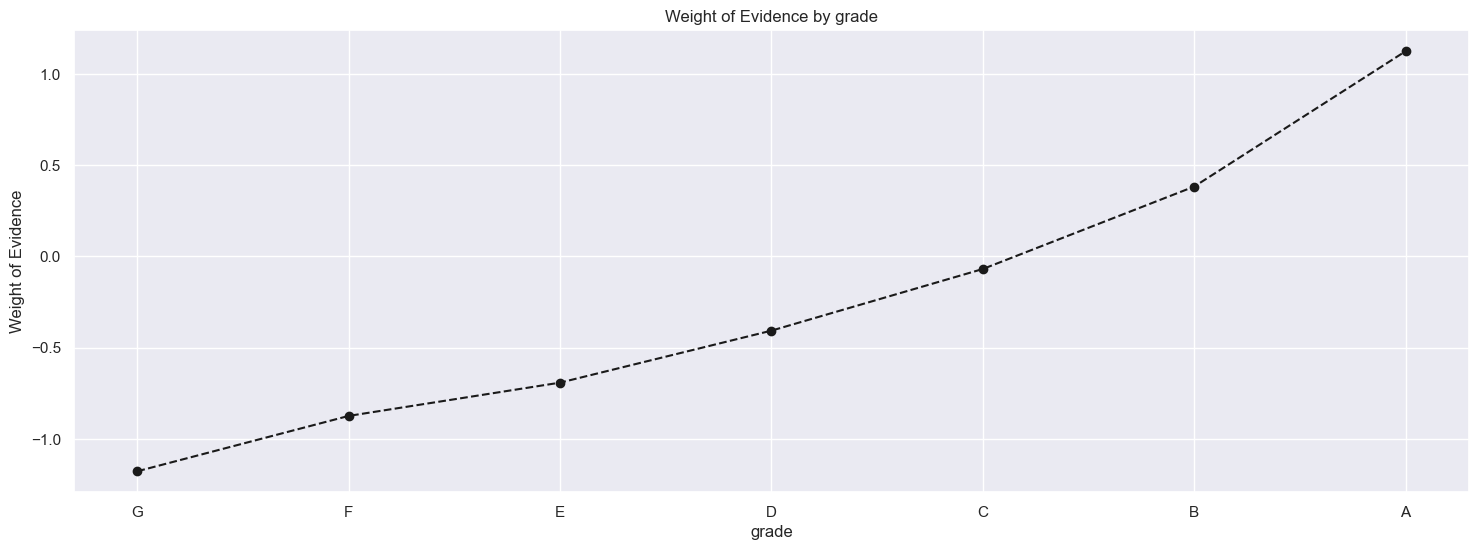

In [86]:
plot_by_woe(df_temp)

### Preprocessing Discrete Variables : Creating Dummy Variables,Part 1

In [87]:
df_temp = woe_discrete(df_inputs_prepr,'home_ownership',df_targets_prepr)
df_temp

home_ownership  n_obs  prop_good  prop_n_obs   n_good   n_bad  prop_n_good  \
0          OTHER     53   0.773585    0.000455     41.0    12.0     0.000395   
1           NONE     13   0.846154    0.000112     11.0     2.0     0.000106   
2           RENT  47305   0.874157    0.405801  41352.0  5953.0     0.398297   
3            OWN  10488   0.889111    0.089970   9325.0  1163.0     0.089817   
4       MORTGAGE  58712   0.904279    0.503654  53092.0  5620.0     0.511375   
5            ANY      1   1.000000    0.000009      1.0     0.0     0.000010   

   prop_n_bad       WoE  diff_prop_good  diff_WoE   IV  
0    0.000941 -0.868481             NaN       NaN  inf  
1    0.000157 -0.392399        0.072569  0.476083  inf  
2    0.466902 -0.158921        0.028003  0.233477  inf  
3    0.091216 -0.015451        0.014954  0.143471  inf  
4    0.440784  0.148548        0.015167  0.163999  inf  
5    0.000000       inf        0.095721       inf  inf

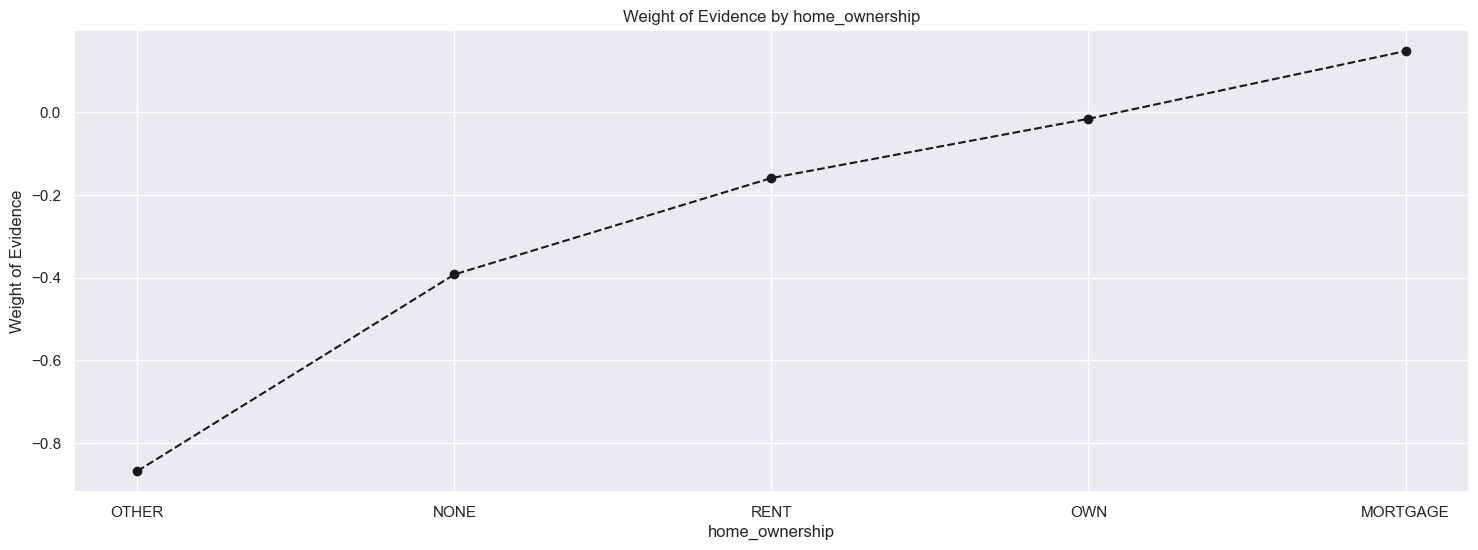

In [88]:
plot_by_woe(df_temp)

In [89]:
# lets combine categories ANY, OTHER , NONE WITH RENT
# reference line will be lowest WOE

In [90]:
df_inputs_prepr['home_ownership:RENT_OTHER_NONE_ANY'] = sum([df_inputs_prepr['home_ownership:RENT'],df_inputs_prepr['home_ownership:OTHER'],df_inputs_prepr['home_ownership:NONE'],df_inputs_prepr['home_ownership:ANY']])

In [91]:
# 'RENT_OTHER_NONE_ANY' will be the reference category.

# Alternatively:
#loan_data.loc['home_ownership' in ['RENT', 'OTHER', 'NONE', 'ANY'], 'home_ownership:RENT_OTHER_NONE_ANY'] = 1
#loan_data.loc['home_ownership' not in ['RENT', 'OTHER', 'NONE', 'ANY'], 'home_ownership:RENT_OTHER_NONE_ANY'] = 0
#loan_data.loc['loan_status' not in ['OWN'], 'home_ownership:OWN'] = 1
#loan_data.loc['loan_status' not in ['OWN'], 'home_ownership:OWN'] = 0
#loan_data.loc['loan_status' not in ['MORTGAGE'], 'home_ownership:MORTGAGE'] = 1
#loan_data.loc['loan_status' not in ['MORTGAGE'], 'home_ownership:MORTGAGE'] = 0

In [92]:
# There are many categories with very few observations and many categories with very different "good" %.
# Therefore, we create a new discrete variable where we combine some of the categories.
# 'OTHERS' and 'NONE' are riskiest but are very few. 'RENT' is the next riskiest.
# 'ANY' are least risky but are too few. Conceptually, they belong to the same category. Also, their inclusion would not change anything.
# We combine them in one category, 'RENT_OTHER_NONE_ANY'.
# We end up with 3 categories: 'RENT_OTHER_NONE_ANY', 'OWN', 'MORTGAGE'.

### Preprocessing Discrete Variables : Creating Dummy Variables,Part 2

In [93]:
# 'addr_state'
df_inputs_prepr['addr_state'].unique()

array(['CA', 'IN', 'AZ', 'MI', 'PA', 'MO', 'CT', 'IL', 'SC', 'VA', 'NY',
       'FL', 'TX', 'NC', 'NM', 'NJ', 'KY', 'DE', 'OK', 'CO', 'OH', 'GA',
       'LA', 'WA', 'AL', 'TN', 'MD', 'NV', 'MN', 'RI', 'NH', 'MA', 'MS',
       'UT', 'WV', 'HI', 'KS', 'OR', 'WY', 'WI', 'AK', 'DC', 'AR', 'MT',
       'SD', 'VT', 'IA', 'ID', 'ME', 'NE'], dtype=object)

In [94]:
# We calculate weight of evidence.
df_temp = woe_discrete(df_inputs_prepr, 'addr_state', df_targets_prepr)
df_temp

addr_state  n_obs  prop_good  prop_n_obs   n_good   n_bad  prop_n_good  \
0          NE      1   0.000000    0.000009      0.0     1.0     0.000000   
1          ID      2   0.500000    0.000017      1.0     1.0     0.000010   
2          NV   1589   0.856514    0.013631   1361.0   228.0     0.013109   
3          HI    608   0.861842    0.005216    524.0    84.0     0.005047   
4          FL   8019   0.873052    0.068790   7001.0  1018.0     0.067433   
5          DE    264   0.875000    0.002265    231.0    33.0     0.002225   
6          LA   1422   0.877637    0.012198   1248.0   174.0     0.012021   
7          AL   1482   0.878543    0.012713   1302.0   180.0     0.012541   
8          AR    899   0.878754    0.007712    790.0   109.0     0.007609   
9          NY  10061   0.878839    0.086307   8842.0  1219.0     0.085165   
10         NJ   4560   0.880482    0.039117   4015.0   545.0     0.038672   
11         NC   3150   0.883492    0.027022   2783.0   367.0     0.026805   
12         MI   2898   0.884748    0.024860   2564.0   334.0     0.024696   
13         RI    530   0.884906    0.004547    469.0    61.0     0.004517   
14         AZ   2625   0.885333    0.022518   2324.0   301.0     0.022384   
15         OK   1071   0.887021    0.009187    950.0   121.0     0.009150   
16         MD   2730   0.887179    0.023419   2422.0   308.0     0.023328   
17         CA  17874   0.887490    0.153330  15863.0  2011.0     0.152790   
18         MO   1871   0.887761    0.016050   1661.0   210.0     0.015999   
19         PA   4109   0.887807    0.035249   3648.0   461.0     0.035137   
20         UT    847   0.890201    0.007266    754.0    93.0     0.007262   
21         SD    228   0.890351    0.001956    203.0    25.0     0.001955   
22         VA   3606   0.892402    0.030934   3218.0   388.0     0.030995   
23         NM    672   0.894345    0.005765    601.0    71.0     0.005789   
24         MA   2775   0.894775    0.023805   2483.0   292.0     0.023916   
25         MN   2011   0.895077    0.017251   1800.0   211.0     0.017337   
26         GA   3765   0.895352    0.032298   3371.0   394.0     0.032469   
27         IN   1645   0.895441    0.014111   1473.0   172.0     0.014188   
28         OH   3872   0.895919    0.033216   3469.0   403.0     0.033413   
29         OR   1452   0.896694    0.012456   1302.0   150.0     0.012541   
30         WI   1453   0.896765    0.012464   1303.0   150.0     0.012550   
31         WA   2665   0.901313    0.022861   2402.0   263.0     0.023136   
32         TX   9020   0.904878    0.077377   8162.0   858.0     0.078615   
33         TN   1447   0.905321    0.012413   1310.0   137.0     0.012618   
34         CO   2386   0.905700    0.020468   2161.0   225.0     0.020814   
35         CT   1788   0.906600    0.015338   1621.0   167.0     0.015613   
36         NH    506   0.907115    0.004341    459.0    47.0     0.004421   
37         IL   4668   0.907669    0.040044   4237.0   431.0     0.040810   
38         KY   1073   0.907735    0.009205    974.0    99.0     0.009381   
39         VT    225   0.911111    0.001930    205.0    20.0     0.001975   
40         WY    274   0.912409    0.002350    250.0    24.0     0.002408   
41         SC   1401   0.912919    0.012018   1279.0   122.0     0.012319   
42         AK    311   0.913183    0.002668    284.0    27.0     0.002735   
43         KS   1043   0.915628    0.008947    955.0    88.0     0.009198   
44         MS    325   0.916923    0.002788    298.0    27.0     0.002870   
45         WV    606   0.919142    0.005199    557.0    49.0     0.005365   
46         DC    368   0.929348    0.003157    342.0    26.0     0.003294   
47         MT    372   0.932796    0.003191    347.0    25.0     0.003342   
48         ME      2   1.000000    0.000017      2.0     0.0     0.000019   
49         IA      1   1.000000    0.000009      1.0     0.0     0.000010   

    prop_n_bad       WoE  diff_prop_good  diff_WoE   IV  
0     0.000078   

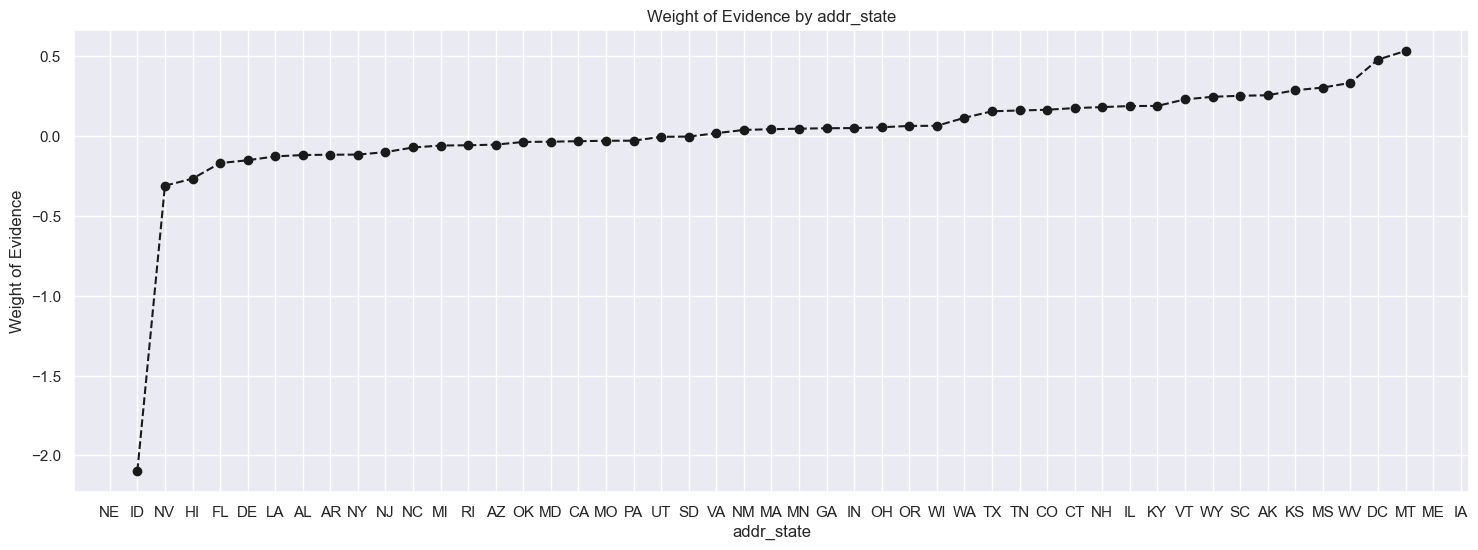

In [95]:
# We plot the weight of evidence values.
plot_by_woe(df_temp)

In [96]:
if ['addr_state:ND'] in df_inputs_prepr.columns.values:
    pass
else:
    df_inputs_prepr['addr_state:ND'] = 0

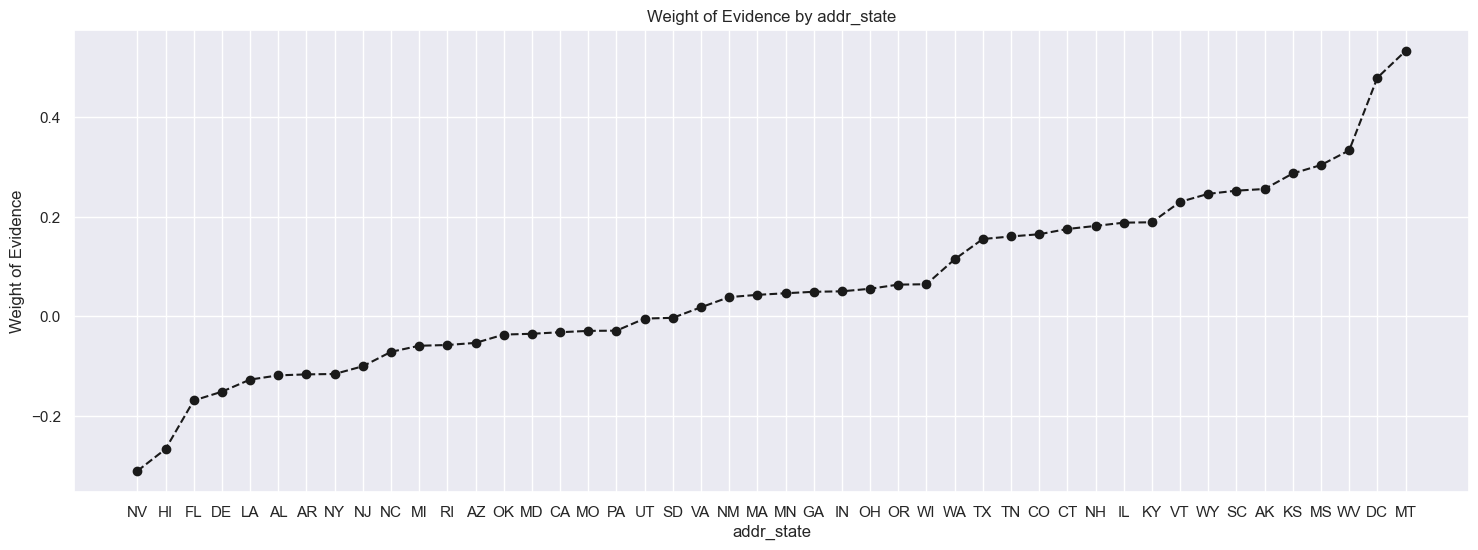

In [97]:
# We plot the weight of evidence values.
plot_by_woe(df_temp.iloc[2: -2, : ])

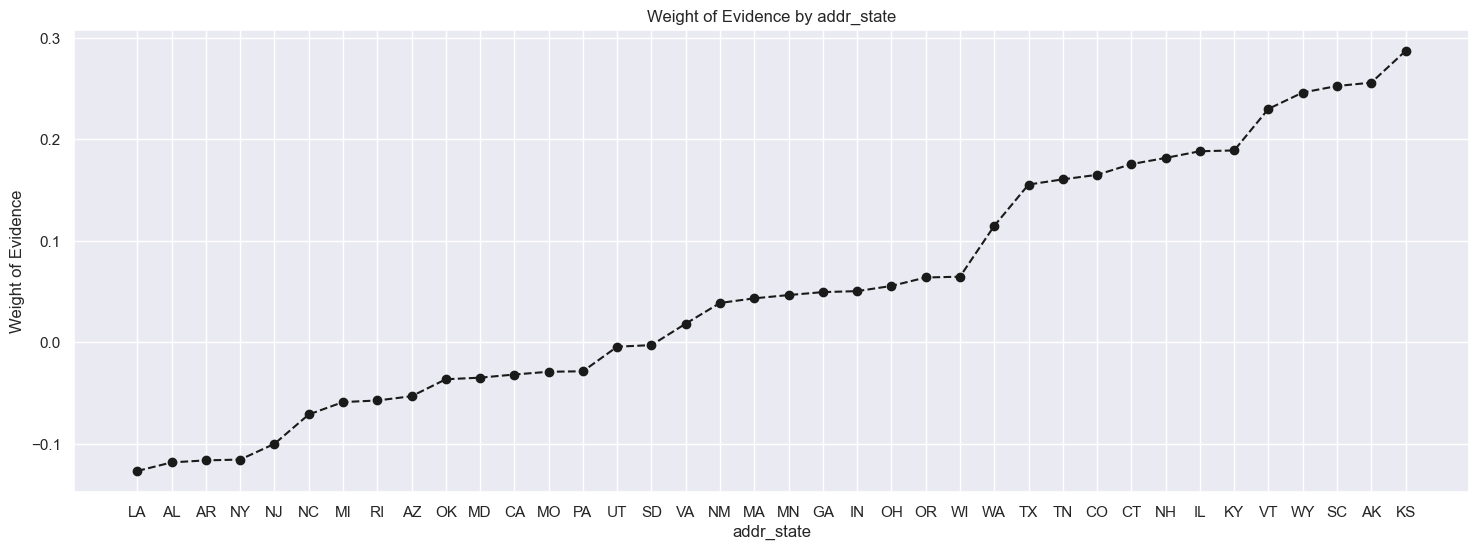

In [98]:
# We plot the weight of evidence values.
plot_by_woe(df_temp.iloc[6: -6, : ])


In [99]:
# We create the following categories:
# 'ND' 'NE' 'IA' NV' 'FL' 'HI' 'AL'
# 'NM' 'VA'
# 'NY'
# 'OK' 'TN' 'MO' 'LA' 'MD' 'NC'
# 'CA'
# 'UT' 'KY' 'AZ' 'NJ'
# 'AR' 'MI' 'PA' 'OH' 'MN'
# 'RI' 'MA' 'DE' 'SD' 'IN'
# 'GA' 'WA' 'OR'
# 'WI' 'MT'
# 'TX'
# 'IL' 'CT'
# 'KS' 'SC' 'CO' 'VT' 'AK' 'MS'
# 'WV' 'NH' 'WY' 'DC' 'ME' 'ID'

# 'IA_NV_HI_ID_AL_FL' will be the reference category.

df_inputs_prepr['addr_state:ND_NE_IA_NV_FL_HI_AL'] = sum([df_inputs_prepr['addr_state:ND'], df_inputs_prepr['addr_state:NE'],
                                              df_inputs_prepr['addr_state:IA'], df_inputs_prepr['addr_state:NV'],
                                              df_inputs_prepr['addr_state:FL'], df_inputs_prepr['addr_state:HI'],
                                                          df_inputs_prepr['addr_state:AL']])

df_inputs_prepr['addr_state:NM_VA'] = sum([df_inputs_prepr['addr_state:NM'], df_inputs_prepr['addr_state:VA']])

df_inputs_prepr['addr_state:OK_TN_MO_LA_MD_NC'] = sum([df_inputs_prepr['addr_state:OK'], df_inputs_prepr['addr_state:TN'],
                                              df_inputs_prepr['addr_state:MO'], df_inputs_prepr['addr_state:LA'],
                                              df_inputs_prepr['addr_state:MD'], df_inputs_prepr['addr_state:NC']])

df_inputs_prepr['addr_state:UT_KY_AZ_NJ'] = sum([df_inputs_prepr['addr_state:UT'], df_inputs_prepr['addr_state:KY'],
                                              df_inputs_prepr['addr_state:AZ'], df_inputs_prepr['addr_state:NJ']])

df_inputs_prepr['addr_state:AR_MI_PA_OH_MN'] = sum([df_inputs_prepr['addr_state:AR'], df_inputs_prepr['addr_state:MI'],
                                              df_inputs_prepr['addr_state:PA'], df_inputs_prepr['addr_state:OH'],
                                              df_inputs_prepr['addr_state:MN']])

df_inputs_prepr['addr_state:RI_MA_DE_SD_IN'] = sum([df_inputs_prepr['addr_state:RI'], df_inputs_prepr['addr_state:MA'],
                                              df_inputs_prepr['addr_state:DE'], df_inputs_prepr['addr_state:SD'],
                                              df_inputs_prepr['addr_state:IN']])

df_inputs_prepr['addr_state:GA_WA_OR'] = sum([df_inputs_prepr['addr_state:GA'], df_inputs_prepr['addr_state:WA'],
                                              df_inputs_prepr['addr_state:OR']])

df_inputs_prepr['addr_state:WI_MT'] = sum([df_inputs_prepr['addr_state:WI'], df_inputs_prepr['addr_state:MT']])

df_inputs_prepr['addr_state:IL_CT'] = sum([df_inputs_prepr['addr_state:IL'], df_inputs_prepr['addr_state:CT']])

df_inputs_prepr['addr_state:KS_SC_CO_VT_AK_MS'] = sum([df_inputs_prepr['addr_state:KS'], df_inputs_prepr['addr_state:SC'],
                                              df_inputs_prepr['addr_state:CO'], df_inputs_prepr['addr_state:VT'],
                                              df_inputs_prepr['addr_state:AK'], df_inputs_prepr['addr_state:MS']])

df_inputs_prepr['addr_state:WV_NH_WY_DC_ME_ID'] = sum([df_inputs_prepr['addr_state:WV'], df_inputs_prepr['addr_state:NH'],
                                              df_inputs_prepr['addr_state:WY'], df_inputs_prepr['addr_state:DC'],
                                              df_inputs_prepr['addr_state:ME'], df_inputs_prepr['addr_state:ID']])

### Preprocessing Discrete Variables

In [100]:
# 'verification_status'
df_temp = woe_discrete(df_inputs_prepr, 'verification_status', df_targets_prepr)
# We calculate weight of evidence.
df_temp

verification_status  n_obs  prop_good  prop_n_obs   n_good   n_bad  \
0            Verified  41915   0.871931    0.359563  36547.0  5368.0   
1     Source Verified  37568   0.895816    0.322273  33654.0  3914.0   
2        Not Verified  37089   0.906495    0.318164  33621.0  3468.0   

   prop_n_good  prop_n_bad       WoE  diff_prop_good  diff_WoE        IV  
0     0.352016     0.42102 -0.179003             NaN       NaN  0.022327  
1     0.324151     0.30698  0.054425        0.023884  0.233428  0.022327  
2     0.323833     0.27200  0.174426        0.010680  0.120001  0.022327

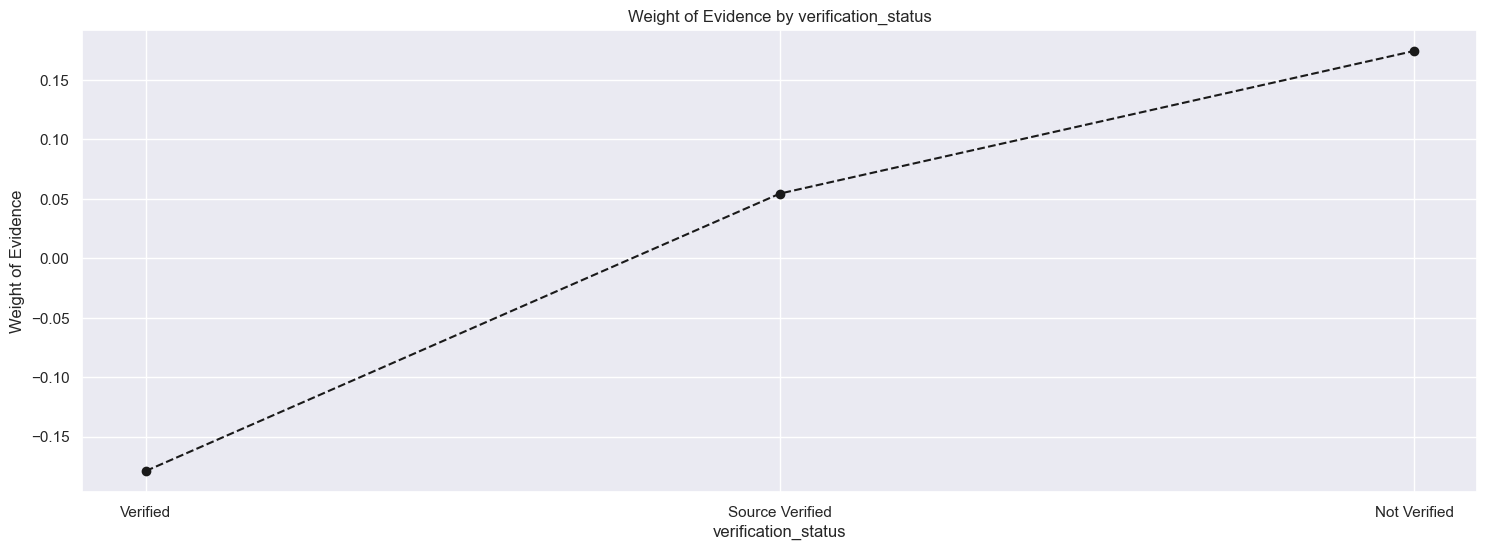

In [101]:
# We plot the weight of evidence values.
plot_by_woe(df_temp)


In [102]:
# 'purpose'
df_temp = woe_discrete(df_inputs_prepr, 'purpose', df_targets_prepr)
# We calculate weight of evidence.
df_temp

purpose  n_obs  prop_good  prop_n_obs   n_good   n_bad  \
0          educational    114   0.771930    0.000978     88.0    26.0   
1       small_business   1771   0.777527    0.015192   1377.0   394.0   
2     renewable_energy     80   0.787500    0.000686     63.0    17.0   
3              medical   1157   0.859118    0.009925    994.0   163.0   
4                house    556   0.859712    0.004770    478.0    78.0   
5                other   6007   0.860829    0.051530   5171.0   836.0   
6              wedding    583   0.866209    0.005001    505.0    78.0   
7               moving    733   0.871760    0.006288    639.0    94.0   
8   debt_consolidation  68638   0.885646    0.588803  60789.0  7849.0   
9             vacation    621   0.887279    0.005327    551.0    70.0   
10      major_purchase   2515   0.902187    0.021575   2269.0   246.0   
11    home_improvement   6561   0.906569    0.056283   5948.0   613.0   
12                 car   1392   0.910920    0.011941   1268.0   124.0   
13         credit_card  25844   0.916344    0.221700  23682.0  2162.0   

    prop_n_good  prop_n_bad       WoE  diff_prop_good  diff_WoE       IV  
0      0.000848    0.002039 -0.877906             NaN       NaN  0.04411  
1      0.013263    0.030902 -0.845835        0.005597  0.032071  0.04411  
2      0.000607    0.001333 -0.787225        0.009973  0.058610  0.04411  
3      0.009574    0.012784 -0.289160        0.071618  0.498066  0.04411  
4      0.004604    0.006118 -0.284245        0.000594  0.004915  0.04411  
5      0.049806    0.065569 -0.274954        0.001117  0.009291  0.04411  
6      0.004864    0.006118 -0.229297        0.005380  0.045657  0.04411  
7      0.006155    0.007373 -0.180537        0.005551  0.048760  0.04411  
8      0.585512    0.615608 -0.050124        0.013887  0.130413  0.04411  
9      0.005307    0.005490 -0.033907        0.001632  0.016217  0.04411  
10     0.021855    0.019294  0.124616        0.014908  0.158523  0.04411  
11     0.057290    0.048078  0.175299        0.004382  0.050682  0.04411  
12     0.012213    0.009725  0.227768        0.004350  0.052469  0.04411  
13     0.228102    0.169569  0.296535        0.005425  0.068767  0.04411

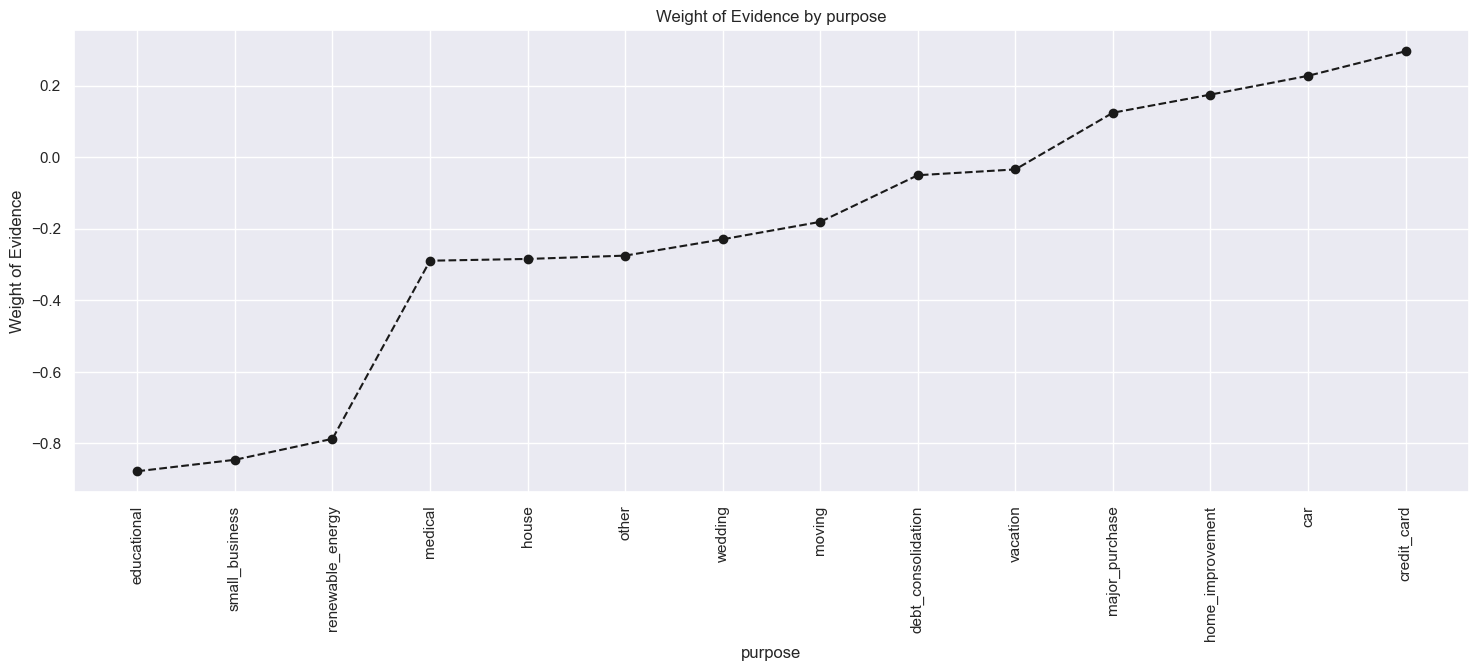

In [103]:
# We plot the weight of evidence values.
plot_by_woe(df_temp, 90)


In [104]:
# We combine 'educational', 'small_business', 'wedding', 'renewable_energy', 'moving', 'house' in one category: 'educ__sm_b__wedd__ren_en__mov__house'.
# We combine 'other', 'medical', 'vacation' in one category: 'oth__med__vacation'.
# We combine 'major_purchase', 'car', 'home_improvement' in one category: 'major_purch__car__home_impr'.
# We leave 'debt_consolidtion' in a separate category.
# We leave 'credit_card' in a separate category.
# 'educ__sm_b__wedd__ren_en__mov__house' will be the reference category.
df_inputs_prepr['purpose:educ__sm_b__wedd__ren_en__mov__house'] = sum([df_inputs_prepr['purpose:educational'], df_inputs_prepr['purpose:small_business'],
                                                                 df_inputs_prepr['purpose:wedding'], df_inputs_prepr['purpose:renewable_energy'],
                                                                 df_inputs_prepr['purpose:moving'], df_inputs_prepr['purpose:house']])
df_inputs_prepr['purpose:oth__med__vacation'] = sum([df_inputs_prepr['purpose:other'], df_inputs_prepr['purpose:medical'],
                                             df_inputs_prepr['purpose:vacation']])
df_inputs_prepr['purpose:major_purch__car__home_impr'] = sum([df_inputs_prepr['purpose:major_purchase'], df_inputs_prepr['purpose:car'],
                                                        df_inputs_prepr['purpose:home_improvement']])

In [105]:
# 'initial_list_status'
df_temp = woe_discrete(df_inputs_prepr, 'initial_list_status', df_targets_prepr)
df_temp

initial_list_status  n_obs  prop_good  prop_n_obs   n_good   n_bad  \
0                   f  75627   0.879183    0.648758  66490.0  9137.0   
1                   w  40945   0.911760    0.351242  37332.0  3613.0   

   prop_n_good  prop_n_bad       WoE  diff_prop_good  diff_WoE        IV  
0     0.640423    0.716627 -0.112427             NaN       NaN  0.026717  
1     0.359577    0.283373  0.238166        0.032576  0.350593  0.026717

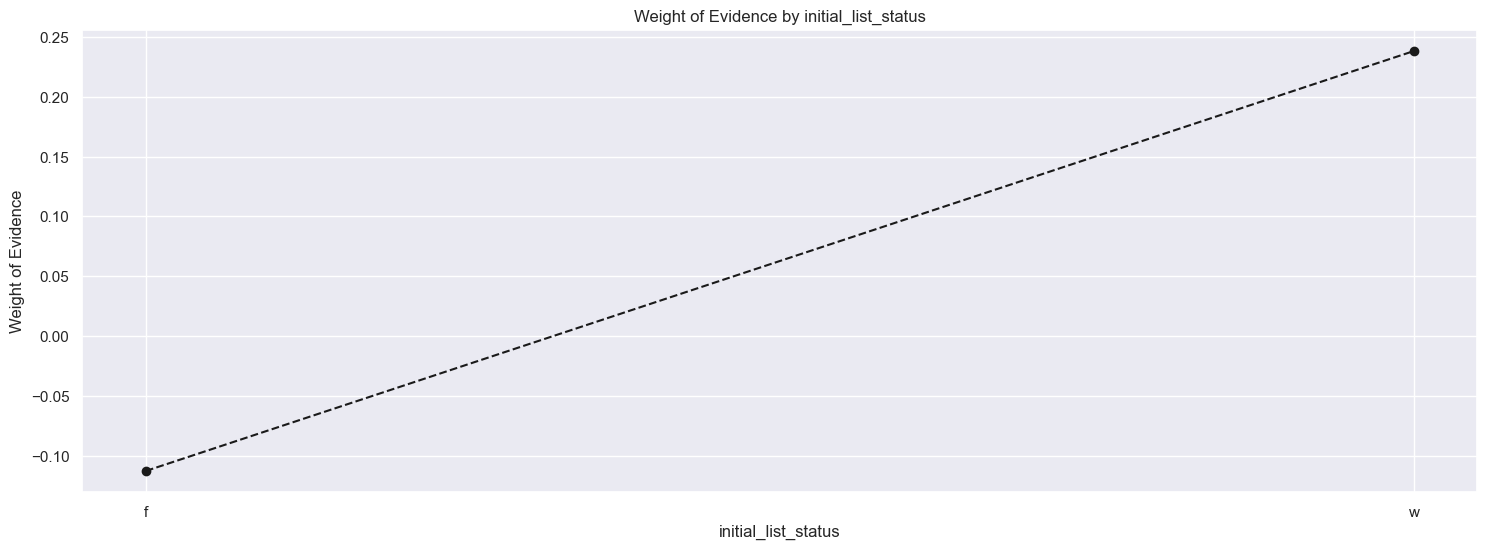

In [106]:
# We plot the weight of evidence values.
plot_by_woe(df_temp)


### Preprocessing numeric Variables

In [107]:
# df = name of df where data is contain
# discrete_variables_name = column name
# good_bad_variable_df = label of column where data is contain
# The function takes 3 arguments: a dataframe, a string, and a dataframe. The function returns a dataframe as a result.




def woe_ordered_continuous(df, discrete_variabe_name, good_bad_variable_df):
    df = pd.concat([df[discrete_variabe_name], good_bad_variable_df], axis = 1)
    df = pd.concat([df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count(),
                    df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].mean()], axis = 1)
    df = df.iloc[:, [0, 1, 3]]
    df.columns = [df.columns.values[0], 'n_obs', 'prop_good']
    df['prop_n_obs'] = df['n_obs'] / df['n_obs'].sum()
    df['n_good'] = df['prop_good'] * df['n_obs']
    df['n_bad'] = (1 - df['prop_good']) * df['n_obs']
    df['prop_n_good'] = df['n_good'] / df['n_good'].sum()
    df['prop_n_bad'] = df['n_bad'] / df['n_bad'].sum()
    df['WoE'] = np.log(df['prop_n_good'] / df['prop_n_bad'])
#     df = df.sort_values(['WoE'])
#     df = df.reset_index(drop = True)
    df['diff_prop_good'] = df['prop_good'].diff().abs()
    df['diff_WoE'] = df['WoE'].diff().abs()
    df['IV'] = (df['prop_n_good'] - df['prop_n_bad']) * df['WoE']
    df['IV'] = df['IV'].sum()
    return df

### Preprocessing Continuous Variables : Creating Dummy Variables

In [108]:
#elaborate term_int
df_inputs_prepr['term_int'].unique()

array([60, 36], dtype=int64)

In [109]:
df_temp = woe_ordered_continuous(df_inputs_prepr,'term_int',df_targets_prepr)
df_temp

term_int  n_obs  prop_good  prop_n_obs   n_good   n_bad  prop_n_good  \
0        36  84370   0.902513    0.723759  76145.0  8225.0     0.733419   
1        60  32202   0.859481    0.276241  27677.0  4525.0     0.266581   

   prop_n_bad       WoE  diff_prop_good  diff_WoE        IV  
0    0.645098  0.128314             NaN       NaN  0.036607  
1    0.354902 -0.286162        0.043032  0.414477  0.036607

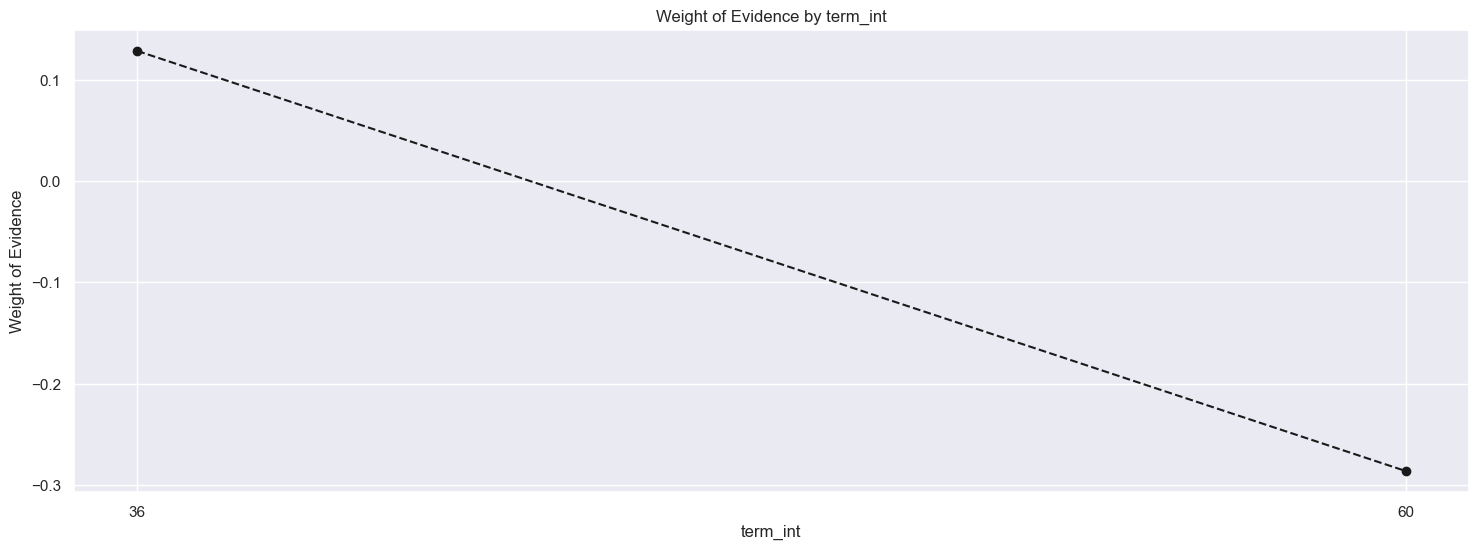

In [110]:
plot_by_woe(df_temp)

In [111]:
# reference point will be 60 months
# it seems 36 months loan risker than 60 months loan

In [112]:
# create dummy
df_inputs_prepr['term:36'] = np.where((df_inputs_prepr['term_int']==36),1,0)
df_inputs_prepr['term:60'] = np.where((df_inputs_prepr['term_int']==60),1,0)

In [113]:
#elaborate emp_length_int
df_inputs_prepr['emp_length_int'].unique()

array([ 0., 10.,  1.,  2.,  9.,  3.,  6.,  4.,  7.,  8.,  5.])

In [114]:
df_temp=woe_ordered_continuous(df_inputs_prepr,'emp_length_int',df_targets_prepr)

In [115]:
df_temp

emp_length_int  n_obs  prop_good  prop_n_obs   n_good   n_bad  \
0              0.0  14376   0.877365    0.123323  12613.0  1763.0   
1              1.0   7412   0.890313    0.063583   6599.0   813.0   
2              2.0  10314   0.886853    0.088478   9147.0  1167.0   
3              3.0   9255   0.888817    0.079393   8226.0  1029.0   
4              4.0   6971   0.889255    0.059800   6199.0   772.0   
5              5.0   7713   0.883703    0.066165   6816.0   897.0   
6              6.0   6526   0.880325    0.055983   5745.0   781.0   
7              7.0   6439   0.892375    0.055236   5746.0   693.0   
8              8.0   5651   0.888692    0.048476   5022.0   629.0   
9              9.0   4548   0.889842    0.039015   4047.0   501.0   
10            10.0  37367   0.900848    0.320549  33662.0  3705.0   

    prop_n_good  prop_n_bad       WoE  diff_prop_good  diff_WoE        IV  
0      0.121487    0.138275 -0.129435             NaN       NaN  0.006995  
1      0.063561    0.063765 -0.003204        0.012948  0.126231  0.006995  
2      0.088103    0.091529 -0.038157        0.003460  0.034953  0.006995  
3      0.079232    0.080706 -0.018434        0.001964  0.019723  0.006995  
4      0.059708    0.060549 -0.013988        0.000439  0.004446  0.006995  
5      0.065651    0.070353 -0.069174        0.005553  0.055187  0.006995  
6      0.055335    0.061255 -0.101637        0.003378  0.032462  0.006995  
7      0.055345    0.054353  0.018083        0.012050  0.119719  0.006995  
8      0.048371    0.049333 -0.019694        0.003682  0.037777  0.006995  
9      0.038980    0.039294 -0.008022        0.001149  0.011673  0.006995  
10     0.324228    0.290588  0.109540        0.011007  0.117561  0.006995

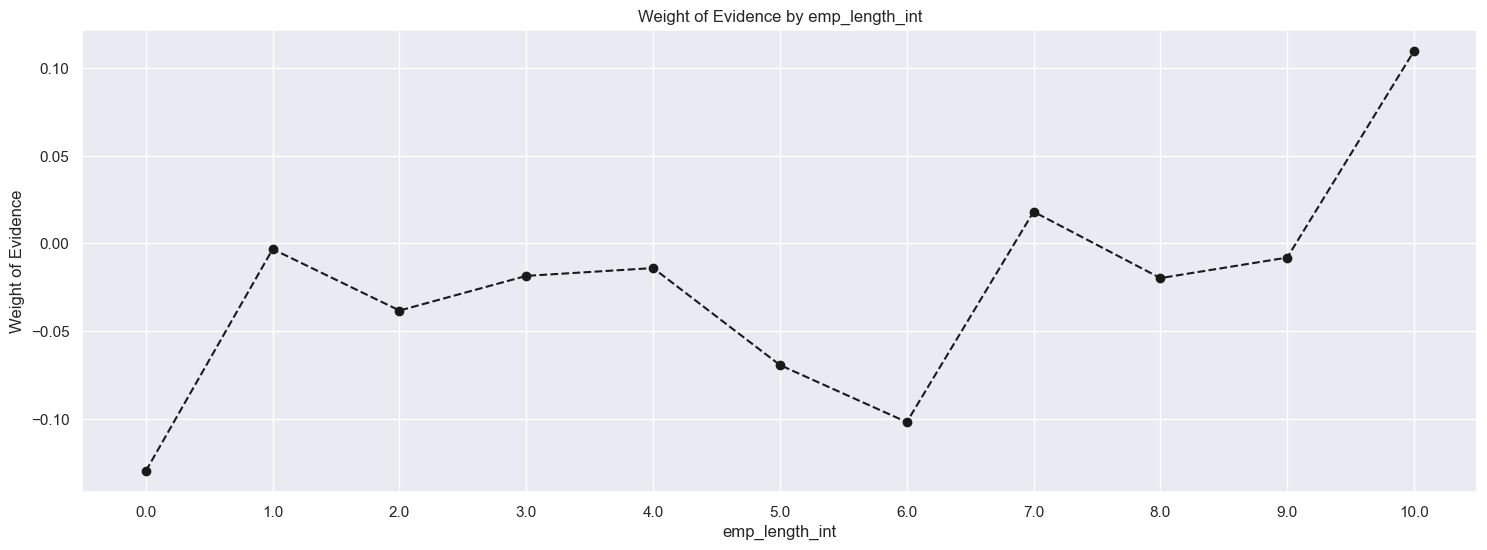

In [116]:
plot_by_woe(df_temp)

In [117]:
df_inputs_prepr['emp_length:0'] = np.where(df_inputs_prepr['emp_length_int'].isin([0]),1,0)
df_inputs_prepr['emp_length:1'] = np.where(df_inputs_prepr['emp_length_int'].isin([1]),1,0)
df_inputs_prepr['emp_length:2-4'] = np.where(df_inputs_prepr['emp_length_int'].isin(range(2,5)),1,0)
df_inputs_prepr['emp_length:5-6'] = np.where(df_inputs_prepr['emp_length_int'].isin(range(5,7)),1,0)
df_inputs_prepr['emp_length:7-9'] = np.where(df_inputs_prepr['emp_length_int'].isin(range(7,10)),1,0)
df_inputs_prepr['emp_length:10'] = np.where(df_inputs_prepr['emp_length_int'].isin([10]),1,0)

### Preprocessing Continuous Variables: Creating Dummy Variables, Part 2

In [118]:
df_inputs_prepr['mths_since_issue_d'].unique()

array([ 41.,  38.,  66.,  37.,  58.,  50.,  86.,  51.,  48.,  59.,  72.,
        77.,  47.,  46.,  56.,  55., 119.,  63., 102.,  39.,  53.,  40.,
        52.,  43.,  49.,  57.,  45.,  36.,  54.,  74.,  44.,  73., 103.,
        70.,  95.,  89.,  68.,  82.,  71.,  76., 104.,  65.,  80.,  91.,
        75.,  67.,  42.,  61.,  64.,  60.,  85.,  88., 110.,  96.,  78.,
        83.,  69.,  90.,  62., 108.,  79.,  92., 118.,  99.,  81., 115.,
        97., 114., 116., 100.,  93., 117., 106., 124., 101., 125.,  87.,
        84.,  94., 105., 109.,  98., 107., 112., 113., 122., 111., 120.,
       121., 123., 126.])

In [119]:
df_inputs_prepr['mths_since_issue_d_factor'] = pd.cut(df_inputs_prepr['mths_since_issue_d'], 50)
# Here we do fine-classing: using the 'cut' method, we split the variable into 50 categories by its values.

In [120]:
df_inputs_prepr['mths_since_issue_d_factor']

362514     (39.6, 41.4]
288564     (37.8, 39.6]
213591     (64.8, 66.6]
263083    (35.91, 37.8]
165001     (57.6, 59.4]
              ...      
82750      (48.6, 50.4]
341222     (39.6, 41.4]
294839     (37.8, 39.6]
200152     (61.2, 63.0]
117840     (52.2, 54.0]
Name: mths_since_issue_d_factor, Length: 116572, dtype: category
Categories (50, interval[float64, right]): [(35.91, 37.8] < (37.8, 39.6] < (39.6, 41.4] < (41.4, 43.2] ... (118.8, 120.6] < (120.6, 122.4] < (122.4, 124.2] < (124.2, 126.0]]

In [121]:
# mths_since_issue_d
df_temp = woe_ordered_continuous(df_inputs_prepr, 'mths_since_issue_d_factor', df_targets_prepr)
# We calculate weight of evidence.
df_temp

mths_since_issue_d_factor  n_obs  prop_good  prop_n_obs   n_good  n_bad  \
0              (35.91, 37.8]   8916   0.945379    0.076485   8429.0  487.0   
1               (37.8, 39.6]  12157   0.929094    0.104287  11295.0  862.0   
2               (39.6, 41.4]  11928   0.920775    0.102323  10983.0  945.0   
3               (41.4, 43.2]   9109   0.908552    0.078141   8276.0  833.0   
4               (43.2, 45.0]   9049   0.905514    0.077626   8194.0  855.0   
5               (45.0, 46.8]   3863   0.895418    0.033138   3459.0  404.0   
6               (46.8, 48.6]   7747   0.890538    0.066457   6899.0  848.0   
7               (48.6, 50.4]   7279   0.886935    0.062442   6456.0  823.0   
8               (50.4, 52.2]   6299   0.876647    0.054035   5522.0  777.0   
9               (52.2, 54.0]   5633   0.873424    0.048322   4920.0  713.0   
10              (54.0, 55.8]   2551   0.870247    0.021883   2220.0  331.0   
11              (55.8, 57.6]   4382   0.858740    0.037591   3763.0  619.0   
12              (57.6, 59.4]   3681   0.848411    0.031577   3123.0  558.0   
13              (59.4, 61.2]   3060   0.849020    0.026250   2598.0  462.0   
14              (61.2, 63.0]   3141   0.853868    0.026945   2682.0  459.0   
15              (63.0, 64.8]   1386   0.837662    0.011890   1161.0  225.0   
16              (64.8, 66.6]   2143   0.821745    0.018383   1761.0  382.0   
17              (66.6, 68.4]   1610   0.847205    0.013811   1364.0  246.0   
18              (68.4, 70.2]   1396   0.843123    0.011975   1177.0  219.0   
19              (70.2, 72.0]   1264   0.819620    0.010843   1036.0  228.0   
20              (72.0, 73.8]    553   0.833635    0.004744    461.0   92.0   
21              (73.8, 75.6]    986   0.848884    0.008458    837.0  149.0   
22              (75.6, 77.4]    943   0.861082    0.008089    812.0  131.0   
23              (77.4, 79.2]    883   0.850510    0.007575    751.0  132.0   
24              (79.2, 81.0]    756   0.880952    0.006485    666.0   90.0   
25              (81.0, 82.8]    315   0.860317    0.002702    271.0   44.0   
26              (82.8, 84.6]    693   0.886003    0.005945    614.0   79.0   
27              (84.6, 86.4]    588   0.831633    0.005044    489.0   99.0   
28              (86.4, 88.2]    569   0.861160    0.004881    490.0   79.0   
29              (88.2, 90.0]    567   0.851852    0.004864    483.0   84.0   
30              (90.0, 91.8]    251   0.836653    0.002153    210.0   41.0   
31              (91.8, 93.6]    453   0.900662    0.003886    408.0   45.0   
32              (93.6, 95.4]    322   0.878882    0.002762    283.0   39.0   
33              (95.4, 97.2]    324   0.845679    0.002779    274.0   50.0   
34              (97.2, 99.0]    287   0.829268    0.002462    238.0   49.0   
35             (99.0, 100.8]    117   0.897436    0.001004    105.0   12.0   
36            (100.8, 102.6]    209   0.808612    0.001793    169.0   40.0   
37            (102.6, 104.4]    189   0.867725    0.001621    164.0   25.0   
38            (104.4, 106.2]    161   0.881988    0.001381    142.0   19.0   
39            (106.2, 108.0]    140   0.842857    0.001201    118.0   22.0   
40            (108.0, 109.8]     50   0.780000    0.000429     39.0   11.0   
41            (109.8, 111.6]     45   0.777778    0.000386     35.0   10.0   
42            (111.6, 113.4]     53   0.943396    0.000455     50.0    3.0   
43            (113.4, 115.2]     63   0.841270    0.000540     53.0   10.0   
44            (115.2, 117.0]    169   0.775148    0.001450    131.0   38.0   
45            (117.0, 118.8]     80   0.787500    0.000686     63.0   17.0   
46            (118.8, 120.6]    105   0.714286    0.000901     75.0   30.0   
47            (120.6, 122.4]     57   0.596491    0.000489     34.0   23.0   
48            (122.4, 124.2]     30   0.700000    0.000257     21.0    9.0   
49            (124.2, 126.0]     20   0.900000    0.000172     18.0    2.0   

    prop_n_good  prop_n_

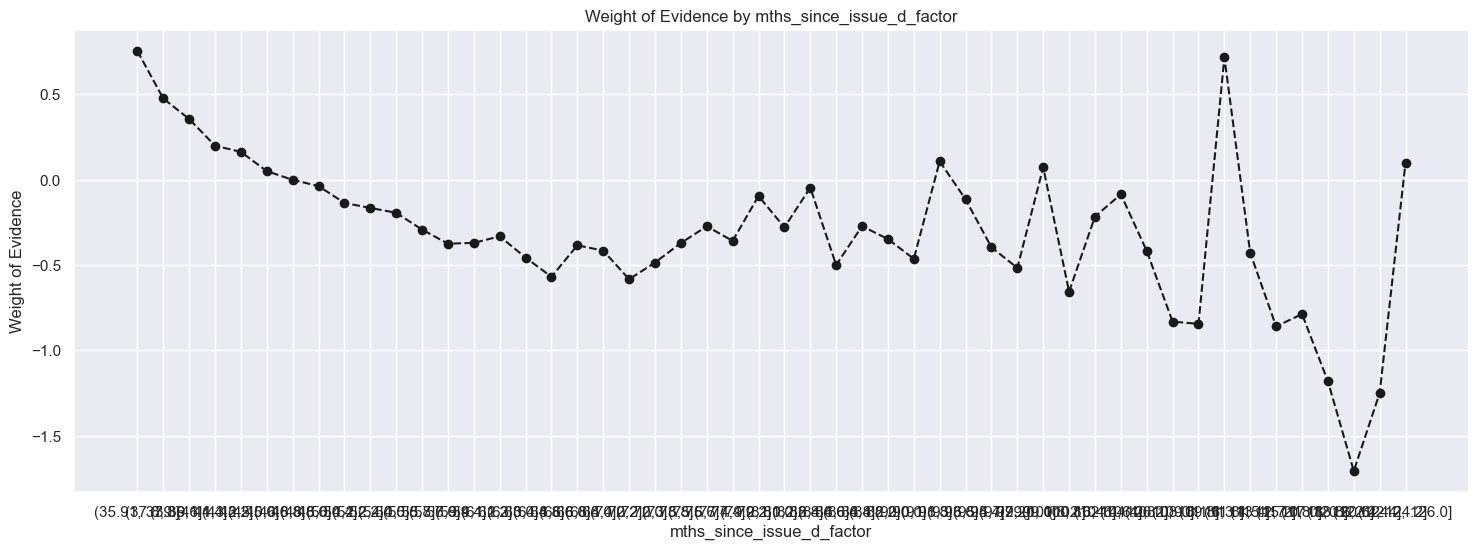

In [122]:
plot_by_woe(df_temp)
# We plot the weight of evidence values.
# We have to rotate the labels because we cannot read them otherwise.

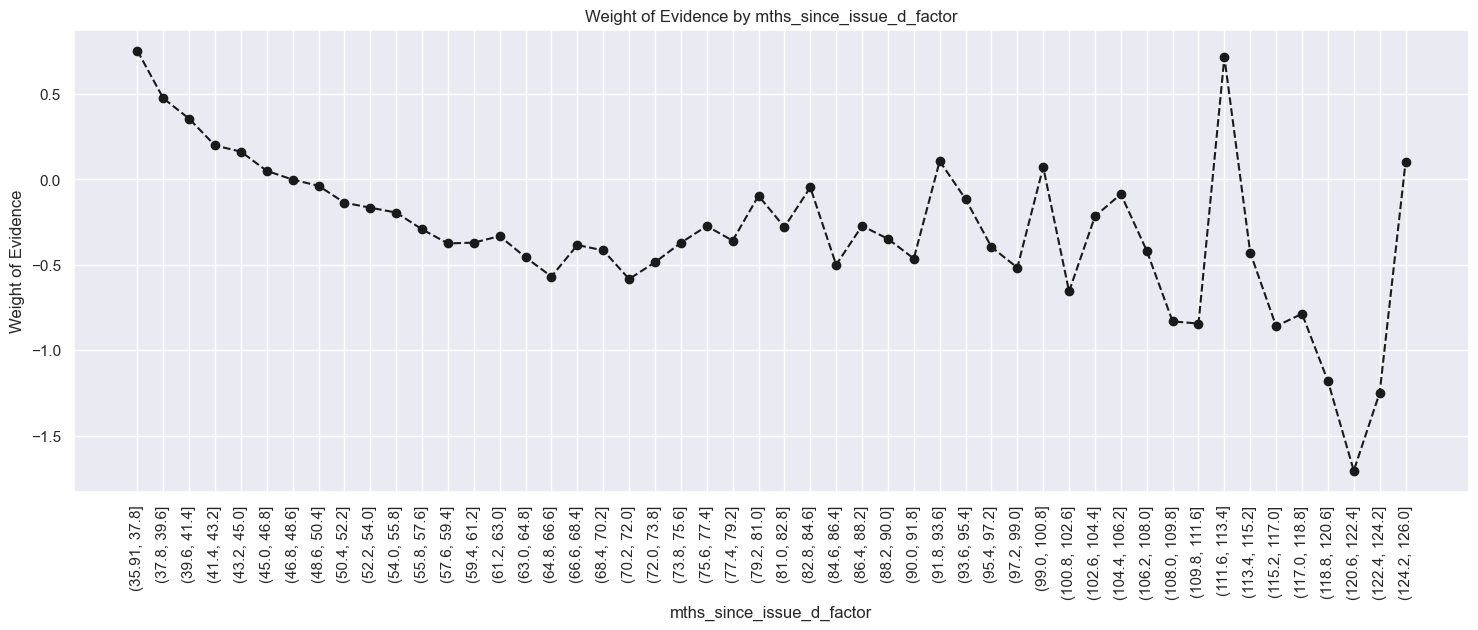

In [123]:
plot_by_woe(df_temp, 90)
# We plot the weight of evidence values, rotating the labels 90 degrees.

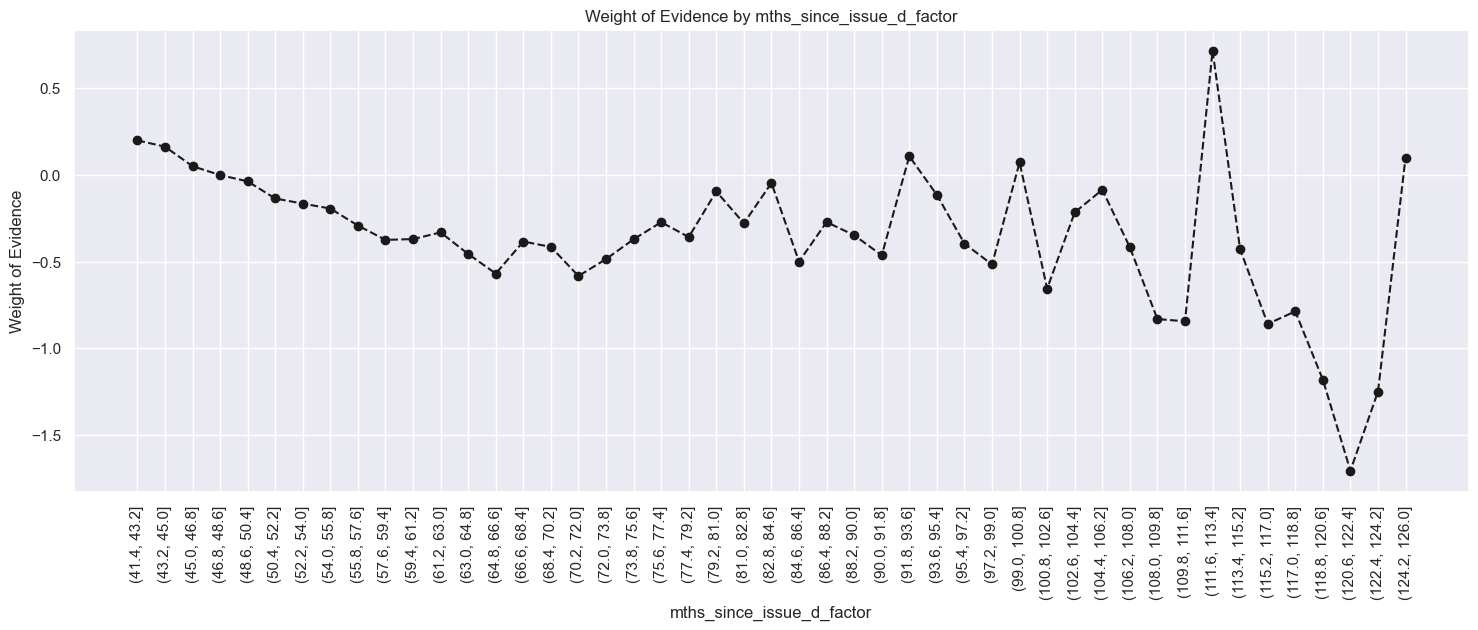

In [124]:
plot_by_woe(df_temp.iloc[3: , : ], 90)
# We plot the weight of evidence values.

In [125]:
# We create the following categories:
# < 38, 38 - 39, 40 - 41, 42 - 48, 49 - 52, 53 - 64, 65 - 84, > 84.
df_inputs_prepr['mths_since_issue_d:<38'] = np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(38)), 1, 0)
df_inputs_prepr['mths_since_issue_d:38-39'] = np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(38, 40)), 1, 0)
df_inputs_prepr['mths_since_issue_d:40-41'] = np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(40, 42)), 1, 0)
df_inputs_prepr['mths_since_issue_d:42-48'] = np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(42, 49)), 1, 0)
df_inputs_prepr['mths_since_issue_d:49-52'] = np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(49, 53)), 1, 0)
df_inputs_prepr['mths_since_issue_d:53-64'] = np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(53, 65)), 1, 0)
df_inputs_prepr['mths_since_issue_d:65-84'] = np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(65, 85)), 1, 0)
df_inputs_prepr['mths_since_issue_d:>84'] = np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(85, int(df_inputs_prepr['mths_since_issue_d'].max()))), 1, 0)

In [126]:
# int_rate
df_inputs_prepr['int_rate_factor'] = pd.cut(df_inputs_prepr['int_rate'], 50)
# Here we do fine-classing: using the 'cut' method, we split the variable into 50 categories by its values.

In [127]:
df_temp = woe_ordered_continuous(df_inputs_prepr, 'int_rate_factor', df_targets_prepr)
# We calculate weight of evidence.
df_temp

int_rate_factor  n_obs  prop_good  prop_n_obs  n_good  n_bad  \
0     (5.399, 5.833]    254   0.976378    0.002179   248.0    6.0   
1     (5.833, 6.246]   2601   0.978854    0.022312  2546.0   55.0   
2     (6.246, 6.658]   2432   0.970806    0.020863  2361.0   71.0   
3     (6.658, 7.071]    600   0.958333    0.005147   575.0   25.0   
4     (7.071, 7.484]   1017   0.982301    0.008724   999.0   18.0   
5     (7.484, 7.897]   4020   0.965672    0.034485  3882.0  138.0   
6      (7.897, 8.31]   3003   0.949051    0.025761  2850.0  153.0   
7      (8.31, 8.722]   2096   0.966126    0.017980  2025.0   71.0   
8     (8.722, 9.135]   2973   0.938446    0.025504  2790.0  183.0   
9     (9.135, 9.548]   2064   0.973353    0.017706  2009.0   55.0   
10    (9.548, 9.961]   2396   0.932387    0.020554  2234.0  162.0   
11   (9.961, 10.374]   3434   0.936808    0.029458  3217.0  217.0   
12  (10.374, 10.786]   1752   0.917237    0.015029  1607.0  145.0   
13  (10.786, 11.199]   5607   0.935795    0.048099  5247.0  360.0   
14  (11.199, 11.612]   1502   0.916778    0.012885  1377.0  125.0   
15  (11.612, 12.025]   4738   0.931195    0.040644  4412.0  326.0   
16  (12.025, 12.438]   3824   0.902197    0.032804  3450.0  374.0   
17   (12.438, 12.85]   3439   0.922070    0.029501  3171.0  268.0   
18   (12.85, 13.263]   6775   0.901402    0.058119  6107.0  668.0   
19  (13.263, 13.676]   4810   0.902287    0.041262  4340.0  470.0   
20  (13.676, 14.089]   3346   0.892708    0.028703  2987.0  359.0   
21  (14.089, 14.502]   7137   0.886507    0.061224  6327.0  810.0   
22  (14.502, 14.914]   1479   0.869506    0.012687  1286.0  193.0   
23  (14.914, 15.327]   6007   0.882470    0.051530  5301.0  706.0   
24   (15.327, 15.74]   3856   0.885114    0.033078  3413.0  443.0   
25   (15.74, 16.153]   2348   0.843697    0.020142  1981.0  367.0   
26  (16.153, 16.566]   4053   0.853442    0.034768  3459.0  594.0   
27  (16.566, 16.978]   1329   0.854778    0.011401  1136.0  193.0   
28  (16.978, 17.391]   3544   0.849041    0.030402  3009.0  535.0   
29  (17.391, 17.804]   3798   0.834650    0.032581  3170.0  628.0   
30  (17.804, 18.217]    372   0.841398    0.003191   313.0   59.0   
31   (18.217, 18.63]   3420   0.829532    0.029338  2837.0  583.0   
32   (18.63, 19.042]   2234   0.817368    0.019164  1826.0  408.0   
33  (19.042, 19.455]   1396   0.790115    0.011975  1103.0  293.0   
34  (19.455, 19.868]   2106   0.817189    0.018066  1721.0  385.0   
35  (19.868, 20.281]   1546   0.842820    0.013262  1303.0  243.0   
36  (20.281, 20.694]   1017   0.815143    0.008724   829.0  188.0   
37  (20.694, 21.106]   1217   0.787182    0.010440   958.0  259.0   
38  (21.106, 21.519]    868   0.753456    0.007446   654.0  214.0   
39  (21.519, 21.932]    285   0.800000    0.002445   228.0   57.0   
40  (21.932, 22.345]   1073   0.776328    0.009205   833.0  240.0   
41  (22.345, 22.758]    728   0.750000    0.006245   546.0  182.0   
42   (22.758, 23.17]    464   0.747845    0.003980   347.0  117.0   
43   (23.17, 23.583]    818   0.777506    0.007017   636.0  182.0   
44  (23.583, 23.996]    499   0.753507    0.004281   376.0  123.0   
45  (23.996, 24.409]    468   0.822650    0.004015   385.0   83.0   
46  (24.409, 24.822]    556   0.780576    0.004770   434.0  122.0   
47  (24.822, 25.234]    433   0.794457    0.003714   344.0   89.0   
48  (25.234, 25.647]    245   0.755102    0.002102   185.0   60.0   
49   (25.647, 26.06]    593   0.755481    0.005087   448.0  145.0   

    prop_n_good  prop_n_bad       WoE  diff_prop_good  diff_WoE        IV  
0      0.002389    0.000471  1.624523             NaN       NaN  0.361827  
1      0.024523    0.004314  1.737799        0.002476  0.113276  0.361827  
2      0.022741    0.005569  1.407014        0.008048  0.330785  0.361827  
3      0.005538    0.001961  1.038348        0.012473  0.368666  0.361827  
4      0.009622    0.001412  1.919236        0.023968  0.880889  0.361827  
5      0.037391    0.010824  

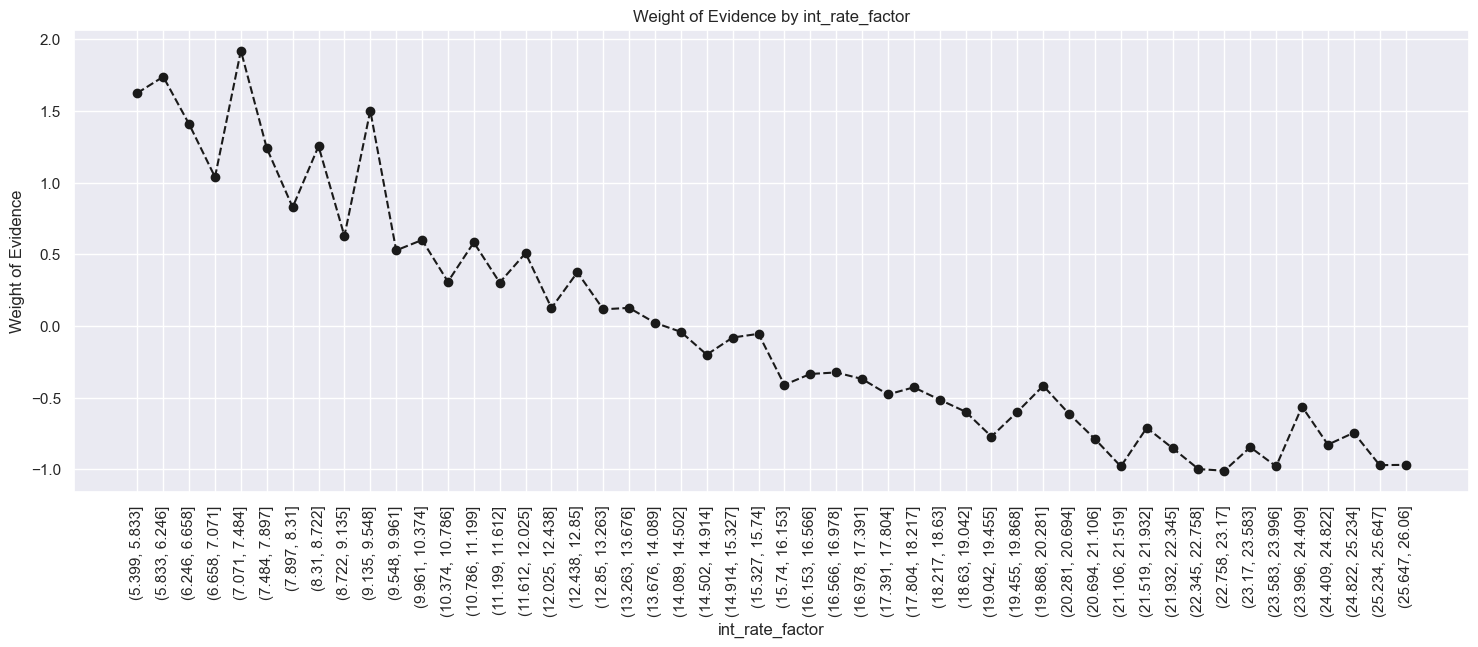

In [128]:
plot_by_woe(df_temp, 90)
# We plot the weight of evidence values.

In [129]:
# '< 9.548', '9.548 - 12.025', '12.025 - 15.74', '15.74 - 20.281', '> 20.281'

In [130]:
df_inputs_prepr['int_rate:<9.548'] = np.where((df_inputs_prepr['int_rate'] <= 9.548), 1, 0)
df_inputs_prepr['int_rate:9.548-12.025'] = np.where((df_inputs_prepr['int_rate'] > 9.548) & (df_inputs_prepr['int_rate'] <= 12.025), 1, 0)
df_inputs_prepr['int_rate:12.025-15.74'] = np.where((df_inputs_prepr['int_rate'] > 12.025) & (df_inputs_prepr['int_rate'] <= 15.74), 1, 0)
df_inputs_prepr['int_rate:15.74-20.281'] = np.where((df_inputs_prepr['int_rate'] > 15.74) & (df_inputs_prepr['int_rate'] <= 20.281), 1, 0)
df_inputs_prepr['int_rate:>20.281'] = np.where((df_inputs_prepr['int_rate'] > 20.281), 1, 0)

In [131]:
# funded_amnt
df_inputs_prepr['funded_amnt_factor'] = pd.cut(df_inputs_prepr['funded_amnt'], 50)
# Here we do fine-classing: using the 'cut' method, we split the variable into 50 categories by its values.
df_temp = woe_ordered_continuous(df_inputs_prepr, 'funded_amnt_factor', df_targets_prepr)
# We calculate weight of evidence.
df_temp

funded_amnt_factor  n_obs  prop_good  prop_n_obs  n_good   n_bad  \
0      (465.5, 1190.0]    405   0.869136    0.003474   352.0    53.0   
1     (1190.0, 1880.0]    977   0.904811    0.008381   884.0    93.0   
2     (1880.0, 2570.0]   1898   0.901475    0.016282  1711.0   187.0   
3     (2570.0, 3260.0]   2248   0.892794    0.019284  2007.0   241.0   
4     (3260.0, 3950.0]   1565   0.892013    0.013425  1396.0   169.0   
5     (3950.0, 4640.0]   2879   0.888503    0.024697  2558.0   321.0   
6     (4640.0, 5330.0]   5031   0.897833    0.043158  4517.0   514.0   
7     (5330.0, 6020.0]   5193   0.906412    0.044548  4707.0   486.0   
8     (6020.0, 6710.0]   2156   0.883117    0.018495  1904.0   252.0   
9     (6710.0, 7400.0]   3646   0.895228    0.031277  3264.0   382.0   
10    (7400.0, 8090.0]   5423   0.893417    0.046521  4845.0   578.0   
11    (8090.0, 8780.0]   2009   0.887008    0.017234  1782.0   227.0   
12    (8780.0, 9470.0]   2860   0.886713    0.024534  2536.0   324.0   
13   (9470.0, 10160.0]  10626   0.893281    0.091154  9492.0  1134.0   
14  (10160.0, 10850.0]   2050   0.872195    0.017586  1788.0   262.0   
15  (10850.0, 11540.0]   2631   0.879513    0.022570  2314.0   317.0   
16  (11540.0, 12230.0]   7192   0.906007    0.061696  6516.0   676.0   
17  (12230.0, 12920.0]   1550   0.874839    0.013297  1356.0   194.0   
18  (12920.0, 13610.0]   2330   0.894850    0.019988  2085.0   245.0   
19  (13610.0, 14300.0]   2635   0.891461    0.022604  2349.0   286.0   
20  (14300.0, 14990.0]   1575   0.890794    0.013511  1403.0   172.0   
21  (14990.0, 15680.0]   6783   0.903877    0.058187  6131.0   652.0   
22  (15680.0, 16370.0]   3660   0.880601    0.031397  3223.0   437.0   
23  (16370.0, 17060.0]   2062   0.878758    0.017689  1812.0   250.0   
24  (17060.0, 17750.0]   1132   0.852473    0.009711   965.0   167.0   
25  (17750.0, 18440.0]   3590   0.884958    0.030796  3177.0   413.0   
26  (18440.0, 19130.0]   1219   0.856440    0.010457  1044.0   175.0   
27  (19130.0, 19820.0]   1292   0.876161    0.011083  1132.0   160.0   
28  (19820.0, 20510.0]   6321   0.896852    0.054224  5669.0   652.0   
29  (20510.0, 21200.0]   2020   0.894554    0.017328  1807.0   213.0   
30  (21200.0, 21890.0]    618   0.839806    0.005301   519.0    99.0   
31  (21890.0, 22580.0]   1280   0.886719    0.010980  1135.0   145.0   
32  (22580.0, 23270.0]    798   0.888471    0.006846   709.0    89.0   
33  (23270.0, 23960.0]    605   0.847934    0.005190   513.0    92.0   
34  (23960.0, 24650.0]   3121   0.898750    0.026773  2805.0   316.0   
35  (24650.0, 25340.0]   3094   0.901422    0.026542  2789.0   305.0   
36  (25340.0, 26030.0]    602   0.848837    0.005164   511.0    91.0   
37  (26030.0, 26720.0]    378   0.809524    0.003243   306.0    72.0   
38  (26720.0, 27410.0]    492   0.865854    0.004221   426.0    66.0   
39  (27410.0, 28100.0]   2005   0.896758    0.017200  1798.0   207.0   
40  (28100.0, 28790.0]    253   0.853755    0.002170   216.0    37.0   
41  (28790.0, 29480.0]    350   0.842857    0.003002   295.0    55.0   
42  (29480.0, 30170.0]   2220   0.884234    0.019044  1963.0   257.0   
43  (30170.0, 30860.0]    173   0.820809    0.001484   142.0    31.0   
44  (30860.0, 31550.0]    265   0.845283    0.002273   224.0    41.0   
45  (31550.0, 32240.0]    458   0.906114    0.003929   415.0    43.0   
46  (32240.0, 32930.0]    178   0.870787    0.001527   155.0    23.0   
47  (32930.0, 33620.0]    338   0.890533    0.002899   301.0    37.0   
48  (33620.0, 34310.0]    176   0.880682    0.001510   155.0    21.0   
49  (34310.0, 35000.0]   4210   0.883373    0.036115  3719.0   491.0   

    prop_n_good  prop_n_bad       WoE  diff_prop_good  diff_WoE        IV  
0      0.003390    0.004157 -0.203807             NaN       NaN  0.017959  
1      0.008515    0.007294  0.154711        0.035675  0.358518  0.017959  
2      0.016480    0.014667  0.116578        0.003335  0.038133  0.017959  
3      0.019331    0.018902

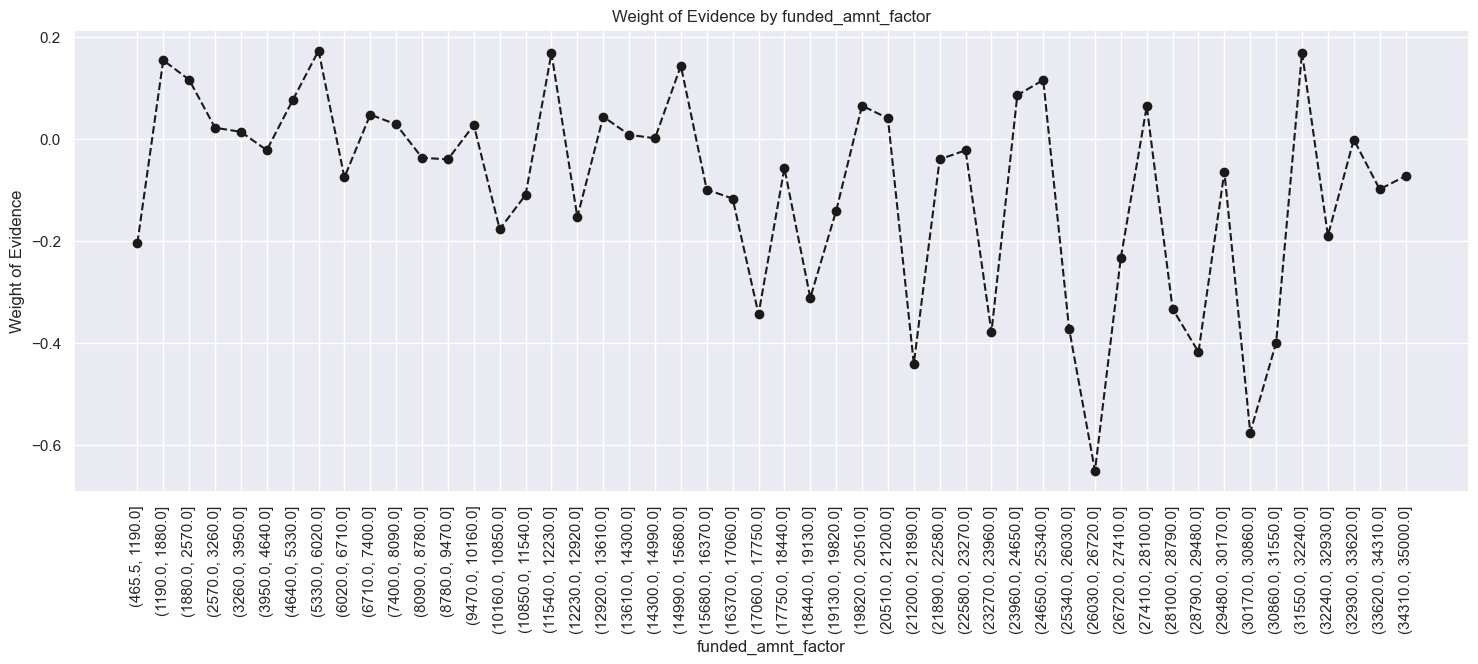

In [132]:
plot_by_woe(df_temp, 90)
# We plot the weight of evidence values.

In [133]:
#higher the rate of intrest higher the chance of default

In [134]:
# mths_since_earliest_cr_line
df_inputs_prepr['mths_since_earliest_cr_line_factor'] = pd.cut(df_inputs_prepr['mths_since_earliest_cr_line'], 50)
# Here we do fine-classing: using the 'cut' method, we split the variable into 50 categories by its values.
df_temp = woe_ordered_continuous(df_inputs_prepr, 'mths_since_earliest_cr_line_factor', df_targets_prepr)
# We calculate weight of evidence.
df_temp

mths_since_earliest_cr_line_factor  n_obs  prop_good  prop_n_obs  n_good  \
0                     (-0.587, 11.74]      7   1.000000    0.000060     7.0   
1                      (11.74, 23.48]      0        NaN    0.000000     NaN   
2                      (23.48, 35.22]      0        NaN    0.000000     NaN   
3                      (35.22, 46.96]      0        NaN    0.000000     NaN   
4                       (46.96, 58.7]      0        NaN    0.000000     NaN   
5                       (58.7, 70.44]      0        NaN    0.000000     NaN   
6                      (70.44, 82.18]    219   0.931507    0.001879   204.0   
7                      (82.18, 93.92]    629   0.901431    0.005396   567.0   
8                     (93.92, 105.66]    903   0.849391    0.007746   767.0   
9                     (105.66, 117.4]   1575   0.860952    0.013511  1356.0   
10                    (117.4, 129.14]   2866   0.871249    0.024586  2497.0   
11                   (129.14, 140.88]   3534   0.863045    0.030316  3050.0   
12                   (140.88, 152.62]   4218   0.882409    0.036184  3722.0   
13                   (152.62, 164.36]   4995   0.883283    0.042849  4412.0   
14                    (164.36, 176.1]   6046   0.886537    0.051865  5360.0   
15                    (176.1, 187.84]   6384   0.886278    0.054764  5658.0   
16                   (187.84, 199.58]   8241   0.882660    0.070695  7274.0   
17                   (199.58, 211.32]   8998   0.886419    0.077188  7976.0   
18                   (211.32, 223.06]   8504   0.886054    0.072951  7535.0   
19                    (223.06, 234.8]   6893   0.886261    0.059131  6109.0   
20                    (234.8, 246.54]   6190   0.886591    0.053100  5488.0   
21                   (246.54, 258.28]   5644   0.888731    0.048416  5016.0   
22                   (258.28, 270.02]   5571   0.894274    0.047790  4982.0   
23                   (270.02, 281.76]   4604   0.898349    0.039495  4136.0   
24                    (281.76, 293.5]   4530   0.898013    0.038860  4068.0   
25                    (293.5, 305.24]   3248   0.903941    0.027863  2936.0   
26                   (305.24, 316.98]   2445   0.908384    0.020974  2221.0   
27                   (316.98, 328.72]   2561   0.901210    0.021969  2308.0   
28                   (328.72, 340.46]   2656   0.905497    0.022784  2405.0   
29                    (340.46, 352.2]   2250   0.901778    0.019301  2029.0   
30                    (352.2, 363.94]   1827   0.913519    0.015673  1669.0   
31                   (363.94, 375.68]   1688   0.908768    0.014480  1534.0   
32                   (375.68, 387.42]   1427   0.910301    0.012241  1299.0   
33                   (387.42, 399.16]   1308   0.905963    0.011221  1185.0   
34                    (399.16, 410.9]   1042   0.917466    0.008939   956.0   
35                    (410.9, 422.64]    995   0.928643    0.008535   924.0   
36                   (422.64, 434.38]    675   0.900741    0.005790   608.0   
37                   (434.38, 446.12]    524   0.927481    0.004495   486.0   
38                   (446.12, 457.86]    428   0.911215    0.003672   390.0   
39                    (457.86, 469.6]    474   0.921941    0.004066   437.0   
40                    (469.6, 481.34]    464   0.909483    0.003980   422.0   
41                   (481.34, 493.08]    370   0.913514    0.003174   338.0   
42                   (493.08, 504.82]    276   0.934783    0.002368   258.0   
43                   (504.82, 516.56]    223   0.923767    0.001913   206.0   
44                    (516.56, 528.3]    202   0.925743    0.001733   187.0   
45                    (528.3, 540.04]    183   0.901639    0.001570   165.0   
46                   (540.04, 551.78]    164   0.902439    0.001407   148.0   
47                   (551.78, 563.52]    122   0.926230    0.001047   113.0   
48                   (563.52, 575.26]     97   0.876289    0.000832    85.0   
49                    (575.26, 587.0]    372   0.8844

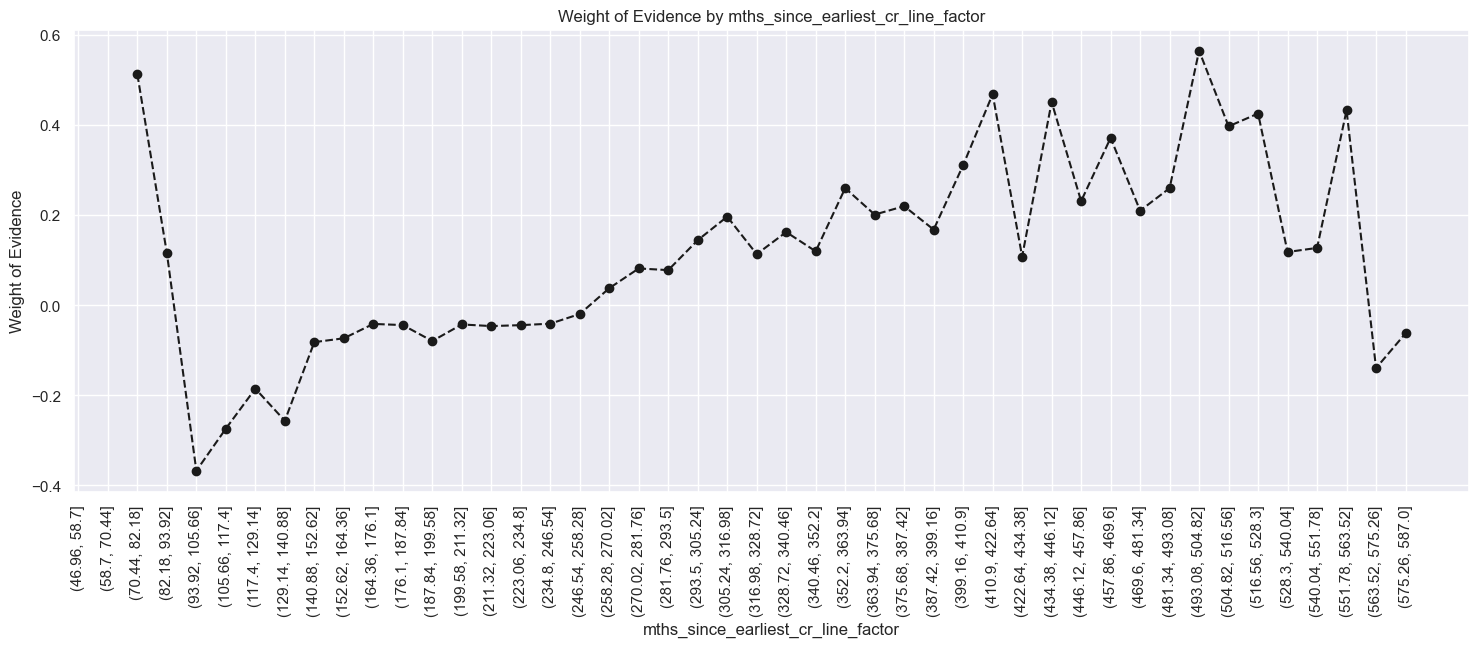

In [135]:
plot_by_woe(df_temp, 90)
# We plot the weight of evidence values.

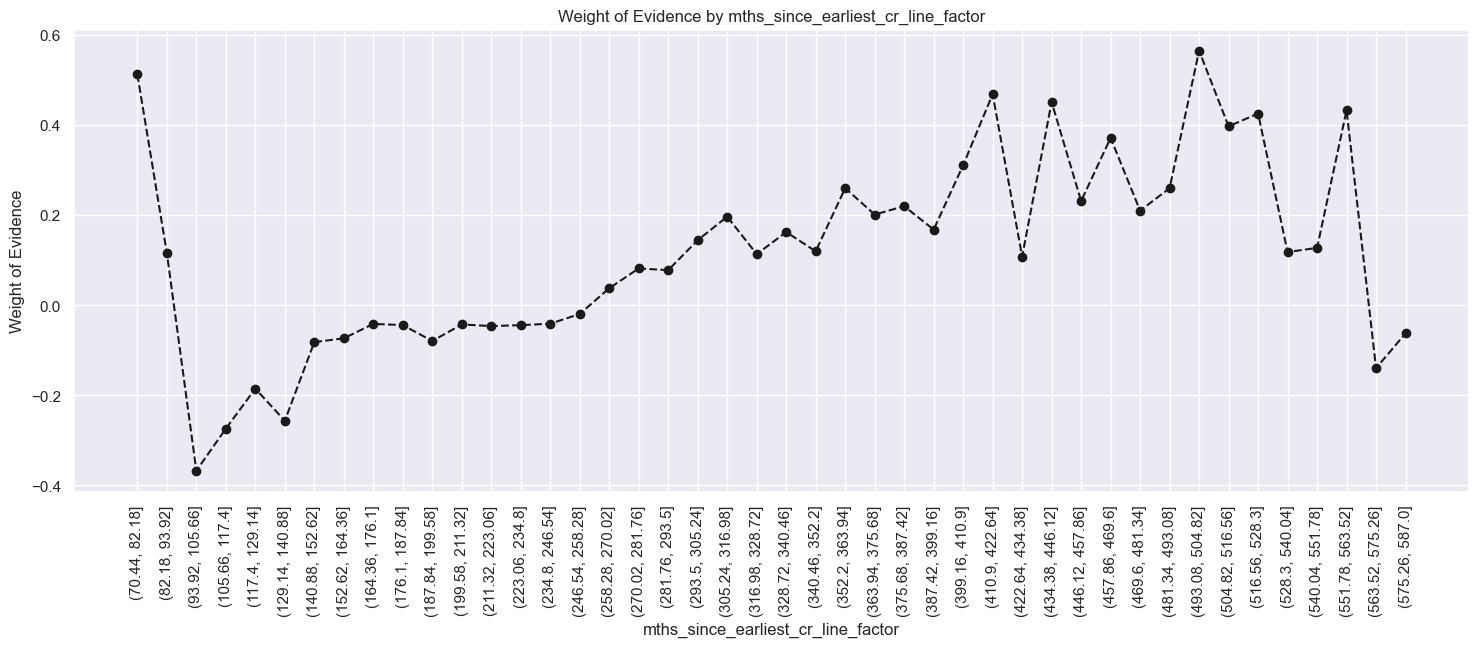

In [136]:
plot_by_woe(df_temp.iloc[6: , : ], 90)
# We plot the weight of evidence values.

In [137]:
df_inputs_prepr

Unnamed: 0        id  member_id  loan_amnt  funded_amnt  \
362514      362514  19677589   21900299      32500        32500   
288564      288564  29755527   32278795      11000        11000   
213591      213591   1343334    1588314      30000        30000   
263083      263083  33131681   35775007      14400        14400   
165001      165001   3293168    4066358      15000        15000   
...            ...       ...        ...        ...          ...   
82750        82750   7617215    9299255      30000        30000   
341222      341222  21571087   23883971       3000         3000   
294839      294839  29183523   31666686       7475         7475   
200152      200152   1507436    1769024       5000         5000   
117840      117840   6175723    7667864      24000        24000   

        funded_amnt_inv        term  int_rate  installment grade sub_grade  \
362514          32500.0   60 months     14.99       773.01     C        C5   
288564          11000.0   60 months     20.99       297.53     E        E4   
213591          30000.0   36 months     14.65      1034.83     C        C2   
263083          14400.0   60 months     14.49       338.74     C        C4   
165001          14900.0   36 months      8.90       476.30     A        A5   
...                 ...         ...       ...          ...   ...       ...   
82750           30000.0   60 months     23.10       847.44     E        E4   
341222           3000.0   36 months     16.99       106.95     D        D3   
294839           7475.0   36 months     17.57       268.63     D        D4   
200152           5000.0   60 months     18.49       128.31     D        D2   
117840          24000.0   60 months     16.78       593.63     C        C5   

                                       emp_title emp_length home_ownership  \
362514                Licensed vocational nurse    < 1 year       MORTGAGE   
288564                             shift manager  10+ years       MORTGAGE   
213591                       FastMed urgent care     1 year       MORTGAGE   
263083                          Registered Nurse    2 years       MORTGAGE   
165001                             Courier Times  10+ years       MORTGAGE   
...                                          ...        ...            ...   
82750                                        NaN        NaN       MORTGAGE   
341222                         combat instructor    7 years           RENT   
294839                                   Scaler     4 years            OWN   
200152                                       NaN    3 years           RENT   
117840  home services lending affiliate of Wells    6 years           RENT   

        annual_inc verification_status issue_d  loan_status pymnt_plan  \
362514     65000.0            Verified  Jul-14   Fully Paid          n   
288564     60000.0            Verified  Oct-14      Current          n   
213591    175000.0            Verified  Jun-12   Fully Paid          n   
263083     66000.0     Source Verified  Nov-14      Current          n   
165001     85000.0            Verified  Feb-13   Fully Paid          n   
...            ...                 ...     ...          ...        ...   
82750      75000.0            Verified  Oct-13      Current          n   
341222     50400.0        Not Verified  Jul-14      Current          n   
294839     32000.0     Source Verified  Oct-14      Current          n   
200152    120000.0     Source Verified  Sep-12      Current          n   
117840     55000.0            Verified  Jul-13  Charged Off          n   

                                                      url  \
362514  https://www.lendingclub.com/browse/loanDetail....   
288564  https://www.lendingclub.com/browse/loanDetail....   
213591  https://www.lendingclub.com/browse/loanDetail....   
263083  https://www.lendingclub.com/browse/loanDetail....   
165001  https://www.lendingclub.com/browse/loanDetail....   
...                                                   ...   
82750   https

In [138]:
# We create the following categories:
# < 140, # 141 - 164, # 165 - 247, # 248 - 270, # 271 - 352, # > 352
df_inputs_prepr['mths_since_earliest_cr_line:<140'] = np.where(df_inputs_prepr['mths_since_earliest_cr_line'].isin(range(140)), 1, 0)
df_inputs_prepr['mths_since_earliest_cr_line:141-164'] = np.where(df_inputs_prepr['mths_since_earliest_cr_line'].isin(range(140, 165)), 1, 0)
df_inputs_prepr['mths_since_earliest_cr_line:165-247'] = np.where(df_inputs_prepr['mths_since_earliest_cr_line'].isin(range(165, 248)), 1, 0)
df_inputs_prepr['mths_since_earliest_cr_line:248-270'] = np.where(df_inputs_prepr['mths_since_earliest_cr_line'].isin(range(248, 271)), 1, 0)
df_inputs_prepr['mths_since_earliest_cr_line:271-352'] = np.where(df_inputs_prepr['mths_since_earliest_cr_line'].isin(range(271, 353)), 1, 0)
df_inputs_prepr['mths_since_earliest_cr_line:>352'] = np.where(df_inputs_prepr['mths_since_earliest_cr_line'].isin(range(353, int(df_inputs_prepr['mths_since_earliest_cr_line'].max()))), 1, 0)

In [139]:
# delinq_2yrs
df_temp = woe_ordered_continuous(df_inputs_prepr, 'delinq_2yrs', df_targets_prepr)
# We calculate weight of evidence.
df_temp

delinq_2yrs  n_obs  prop_good  prop_n_obs   n_good    n_bad  prop_n_good  \
0           0.0  95779   0.890592    0.821630  85300.0  10479.0     0.821599   
1           1.0  14083   0.891642    0.120809  12557.0   1526.0     0.120947   
2           2.0   3953   0.884392    0.033910   3496.0    457.0     0.033673   
3           3.0   1429   0.892932    0.012259   1276.0    153.0     0.012290   
4           4.0    633   0.892575    0.005430    565.0     68.0     0.005442   
5           5.0    325   0.916923    0.002788    298.0     27.0     0.002870   
6           6.0    162   0.876543    0.001390    142.0     20.0     0.001368   
7           7.0     87   0.885057    0.000746     77.0     10.0     0.000742   
8           8.0     39   0.923077    0.000335     36.0      3.0     0.000347   
9           9.0     29   0.965517    0.000249     28.0      1.0     0.000270   
10         10.0     14   0.857143    0.000120     12.0      2.0     0.000116   
11         11.0     11   1.000000    0.000094     11.0      0.0     0.000106   
12         12.0     11   0.727273    0.000094      8.0      3.0     0.000077   
13         13.0      7   0.857143    0.000060      6.0      1.0     0.000058   
14         14.0      2   1.000000    0.000017      2.0      0.0     0.000019   
15         15.0      1   1.000000    0.000009      1.0      0.0     0.000010   
16         16.0      1   1.000000    0.000009      1.0      0.0     0.000010   
17         18.0      4   1.000000    0.000034      4.0      0.0     0.000039   
18         19.0      1   1.000000    0.000009      1.0      0.0     0.000010   
19         24.0      1   1.000000    0.000009      1.0      0.0     0.000010   

    prop_n_bad       WoE  diff_prop_good  diff_WoE   IV  
0     0.821882 -0.000345             NaN       NaN  inf  
1     0.119686  0.010482        0.001051  0.010827  inf  
2     0.035843 -0.062455        0.007251  0.072937  inf  
3     0.012000  0.023901        0.008541  0.086356  inf  
4     0.005333  0.020171        0.000357  0.003730  inf  
5     0.002118  0.304110        0.024348  0.283939  inf  
6     0.001569 -0.137052        0.040380  0.441162  inf  
7     0.000784 -0.055926        0.008514  0.081126  inf  
8     0.000235  0.387760        0.038019  0.443686  inf  
9     0.000078  1.235058        0.042440  0.847298  inf  
10    0.000157 -0.305387        0.108374  1.540445  inf  
11    0.000000       inf        0.142857       inf  inf  
12    0.000235 -1.116317        0.272727       inf  inf  
13    0.000078 -0.305387        0.129870  0.810930  inf  
14    0.000000       inf        0.142857       inf  inf  
15    0.000000       inf        0.000000       NaN  inf  
16    0.000000       inf        0.000000       NaN  inf  
17    0.000000       inf        0.000000       NaN  inf  
18    0.000000       inf        0.000000       NaN  inf  
19    0.000000       inf        0.000000       NaN  inf

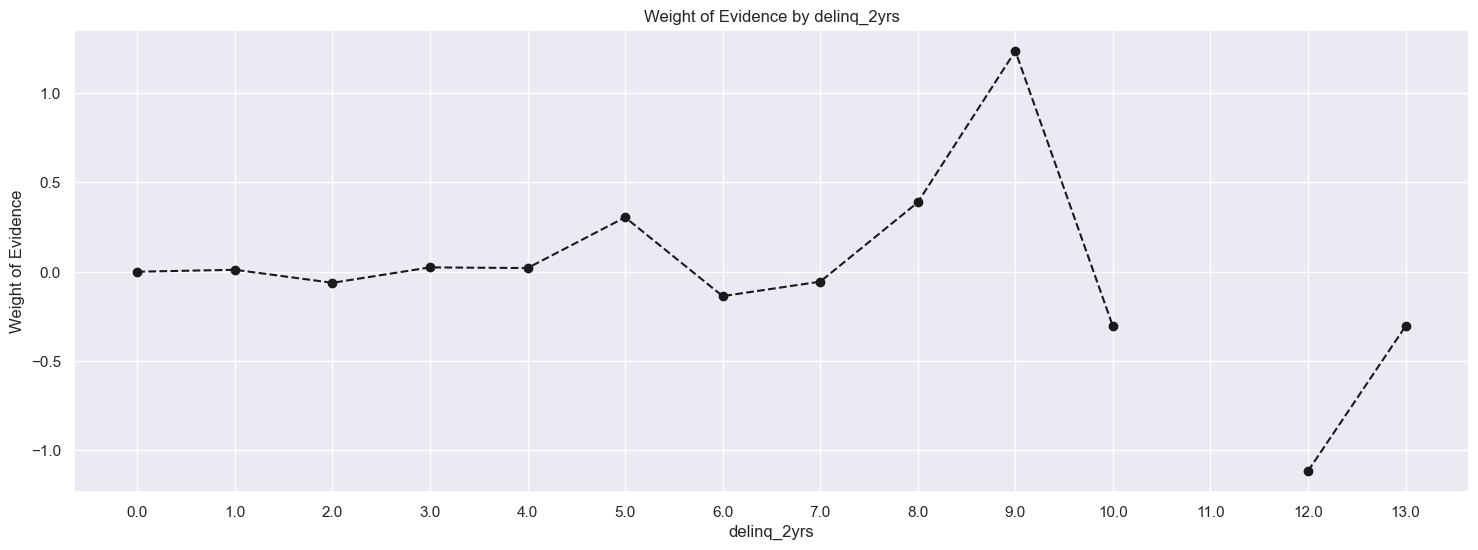

In [140]:
plot_by_woe(df_temp)
# We plot the weight of evidence values.

In [141]:
# Categories: 0, 1-3, >=4
df_inputs_prepr['delinq_2yrs:0'] = np.where((df_inputs_prepr['delinq_2yrs'] == 0), 1, 0)
df_inputs_prepr['delinq_2yrs:1-3'] = np.where((df_inputs_prepr['delinq_2yrs'] >= 1) & (df_inputs_prepr['delinq_2yrs'] <= 3), 1, 0)
df_inputs_prepr['delinq_2yrs:>=4'] = np.where((df_inputs_prepr['delinq_2yrs'] >= 9), 1, 0)

In [142]:
# inq_last_6mths
df_temp = woe_ordered_continuous(df_inputs_prepr, 'inq_last_6mths', df_targets_prepr)
# We calculate weight of evidence.
df_temp

inq_last_6mths  n_obs  prop_good  prop_n_obs   n_good   n_bad  \
0              0.0  60490   0.909506    0.518907  55016.0  5474.0   
1              1.0  32488   0.882880    0.278695  28683.0  3805.0   
2              2.0  14421   0.861175    0.123709  12419.0  2002.0   
3              3.0   6306   0.845385    0.054095   5331.0   975.0   
4              4.0   1810   0.848619    0.015527   1536.0   274.0   
5              5.0    682   0.831378    0.005850    567.0   115.0   
6              6.0    262   0.767176    0.002248    201.0    61.0   
7              7.0     51   0.627451    0.000437     32.0    19.0   
8              8.0     29   0.482759    0.000249     14.0    15.0   
9              9.0      9   0.444444    0.000077      4.0     5.0   
10            10.0      7   0.857143    0.000060      6.0     1.0   
11            11.0      7   1.000000    0.000060      7.0     0.0   
12            12.0      4   0.750000    0.000034      3.0     1.0   
13            13.0      1   0.000000    0.000009      0.0     1.0   
14            14.0      1   0.000000    0.000009      0.0     1.0   
15            18.0      2   0.500000    0.000017      1.0     1.0   
16            19.0      1   1.000000    0.000009      1.0     0.0   
17            24.0      1   1.000000    0.000009      1.0     0.0   

    prop_n_good  prop_n_bad       WoE  diff_prop_good  diff_WoE   IV  
0      0.529907    0.429333  0.210468             NaN       NaN  inf  
1      0.276271    0.298431 -0.077158        0.026626  0.287626  inf  
2      0.119618    0.157020 -0.272066        0.021705  0.194908  inf  
3      0.051347    0.076471 -0.398290        0.015789  0.126224  inf  
4      0.014795    0.021490 -0.373338        0.003233  0.024952  inf  
5      0.005461    0.009020 -0.501719        0.017240  0.128382  inf  
6      0.001936    0.004784 -0.904716        0.064203  0.402996  inf  
7      0.000308    0.001490 -1.575850        0.139725  0.671134  inf  
8      0.000135    0.001176 -2.166139        0.144692  0.590290  inf  
9      0.000039    0.000392 -2.320290        0.038314  0.154151  inf  
10     0.000058    0.000078 -0.305387        0.412698  2.014903  inf  
11     0.000067    0.000000       inf        0.142857       inf  inf  
12     0.000029    0.000078 -0.998534        0.250000       inf  inf  
13     0.000000    0.000078      -inf        0.750000       inf  inf  
14     0.000000    0.000078      -inf        0.000000       NaN  inf  
15     0.000010    0.000078 -2.097147        0.500000       inf  inf  
16     0.000010    0.000000       inf        0.500000       inf  inf  
17     0.000010    0.000000       inf        0.000000       NaN  inf

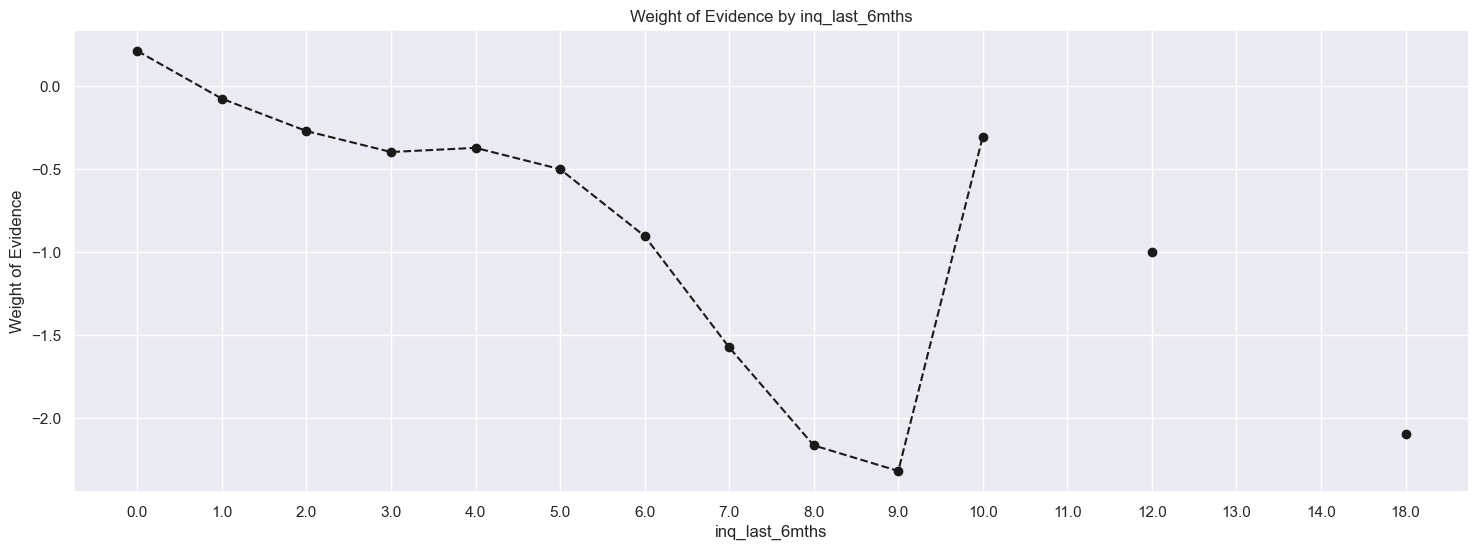

In [143]:
plot_by_woe(df_temp)
# We plot the weight of evidence values.

In [144]:
# Categories: 0, 1 - 2, 3 - 6, > 6
df_inputs_prepr['inq_last_6mths:0'] = np.where((df_inputs_prepr['inq_last_6mths'] == 0), 1, 0)
df_inputs_prepr['inq_last_6mths:1-2'] = np.where((df_inputs_prepr['inq_last_6mths'] >= 1) & (df_inputs_prepr['inq_last_6mths'] <= 2), 1, 0)
df_inputs_prepr['inq_last_6mths:3-6'] = np.where((df_inputs_prepr['inq_last_6mths'] >= 3) & (df_inputs_prepr['inq_last_6mths'] <= 6), 1, 0)
df_inputs_prepr['inq_last_6mths:>6'] = np.where((df_inputs_prepr['inq_last_6mths'] > 6), 1, 0)

In [145]:
# open_acc
df_temp = woe_ordered_continuous(df_inputs_prepr, 'open_acc', df_targets_prepr)
# We calculate weight of evidence.
df_temp

open_acc  n_obs  prop_good  prop_n_obs  n_good   n_bad  prop_n_good  \
0        0.0      9   1.000000    0.000077     9.0     0.0     0.000087   
1        1.0     40   0.900000    0.000343    36.0     4.0     0.000347   
2        2.0    416   0.841346    0.003569   350.0    66.0     0.003371   
3        3.0   1410   0.857447    0.012096  1209.0   201.0     0.011645   
4        4.0   3196   0.892991    0.027417  2854.0   342.0     0.027489   
5        5.0   5439   0.895753    0.046658  4872.0   567.0     0.046926   
6        6.0   7780   0.892159    0.066740  6941.0   839.0     0.066855   
7        7.0   9347   0.886809    0.080182  8289.0  1058.0     0.079839   
8        8.0  10370   0.892285    0.088958  9253.0  1117.0     0.089124   
9        9.0  11001   0.889010    0.094371  9780.0  1221.0     0.094200   
10      10.0  10736   0.889624    0.092098  9551.0  1185.0     0.091994   
11      11.0   9762   0.890904    0.083742  8697.0  1065.0     0.083768   
12      12.0   8574   0.887101    0.073551  7606.0   968.0     0.073260   
13      13.0   7381   0.892833    0.063317  6590.0   791.0     0.063474   
14      14.0   6186   0.895732    0.053066  5541.0   645.0     0.053370   
15      15.0   5037   0.893786    0.043209  4502.0   535.0     0.043363   
16      16.0   4118   0.895580    0.035326  3688.0   430.0     0.035522   
17      17.0   3387   0.881606    0.029055  2986.0   401.0     0.028761   
18      18.0   2808   0.899929    0.024088  2527.0   281.0     0.024340   
19      19.0   2192   0.890055    0.018804  1951.0   241.0     0.018792   
20      20.0   1781   0.899495    0.015278  1602.0   179.0     0.015430   
21      21.0   1290   0.882171    0.011066  1138.0   152.0     0.010961   
22      22.0    964   0.900415    0.008270   868.0    96.0     0.008360   
23      23.0    779   0.898588    0.006683   700.0    79.0     0.006742   
24      24.0    594   0.887205    0.005096   527.0    67.0     0.005076   
25      25.0    468   0.884615    0.004015   414.0    54.0     0.003988   
26      26.0    316   0.895570    0.002711   283.0    33.0     0.002726   
27      27.0    257   0.902724    0.002205   232.0    25.0     0.002235   
28      28.0    201   0.895522    0.001724   180.0    21.0     0.001734   
29      29.0    161   0.850932    0.001381   137.0    24.0     0.001320   
30      30.0    129   0.906977    0.001107   117.0    12.0     0.001127   
31      31.0     87   0.885057    0.000746    77.0    10.0     0.000742   
32      32.0     74   0.945946    0.000635    70.0     4.0     0.000674   
33      33.0     57   0.842105    0.000489    48.0     9.0     0.000462   
34      34.0     53   0.830189    0.000455    44.0     9.0     0.000424   
35      35.0     37   0.945946    0.000317    35.0     2.0     0.000337   
36      36.0     26   0.769231    0.000223    20.0     6.0     0.000193   
37      37.0     25   0.840000    0.000214    21.0     4.0     0.000202   
38      38.0     17   0.941176    0.000146    16.0     1.0     0.000154   
39      39.0     13   0.923077    0.000112    12.0     1.0     0.000116   
40      40.0     11   0.636364    0.000094     7.0     4.0     0.000067   
41      41.0      7   1.000000    0.000060     7.0     0.0     0.000067   
42      42.0      8   1.000000    0.000069     8.0     0.0     0.000077   
43      43.0      5   0.800000    0.000043     4.0     1.0     0.000039   
44      44.0      1   1.000000    0.000009     1.0     0.0     0.000010   
45      45.0      6   1.000000    0.000051     6.0     0.0     0.000058   
46      46.0      3   1.000000    0.000026     3.0     0.0     0.000029   
47      48.0      2   1.000000    0.000017     2.0     0.0     0.000019   
48      49.0      3   1.000000    0.000026     3.0     0.0     0.000029   
49      50.0      1   1.000000    0.000009     1.0     0.0     0.000010   
50      52.0      1   1.000000    0.000009     1.0     0.0     0.000010   
51      53.0      2   1.000000    0.000017     2.0     0.0     0.000019   
52      58.0      3   1.00000

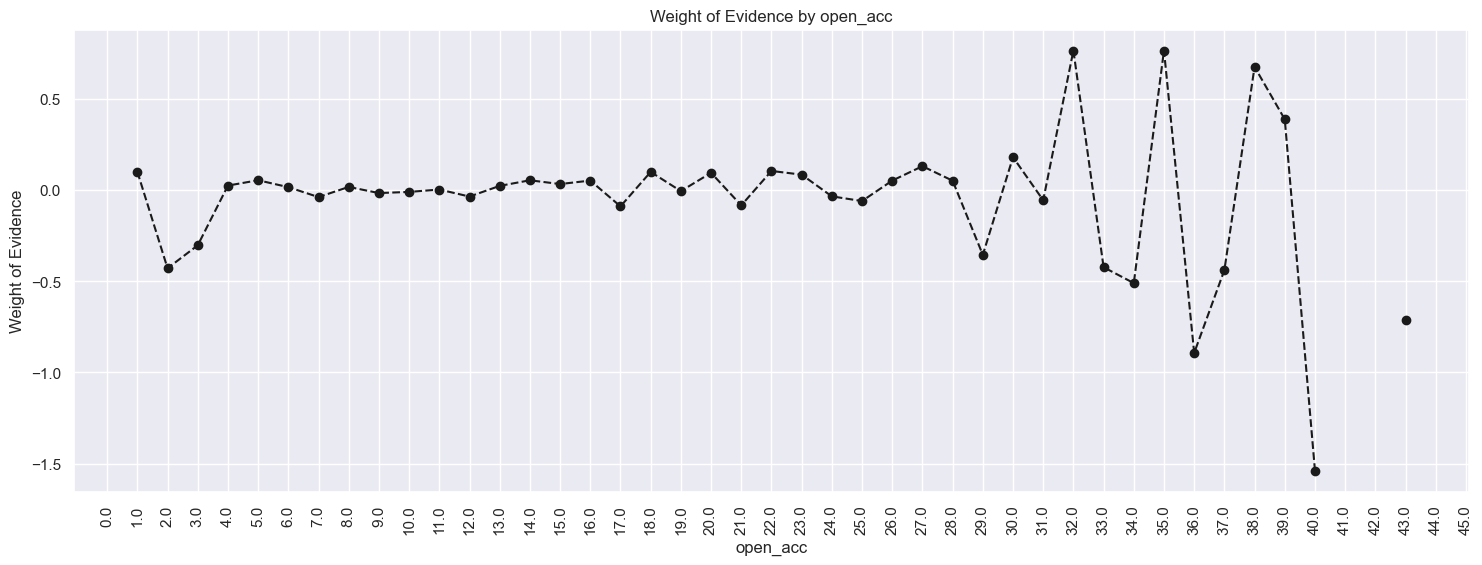

In [146]:
plot_by_woe(df_temp, 90)
# We plot the weight of evidence values.

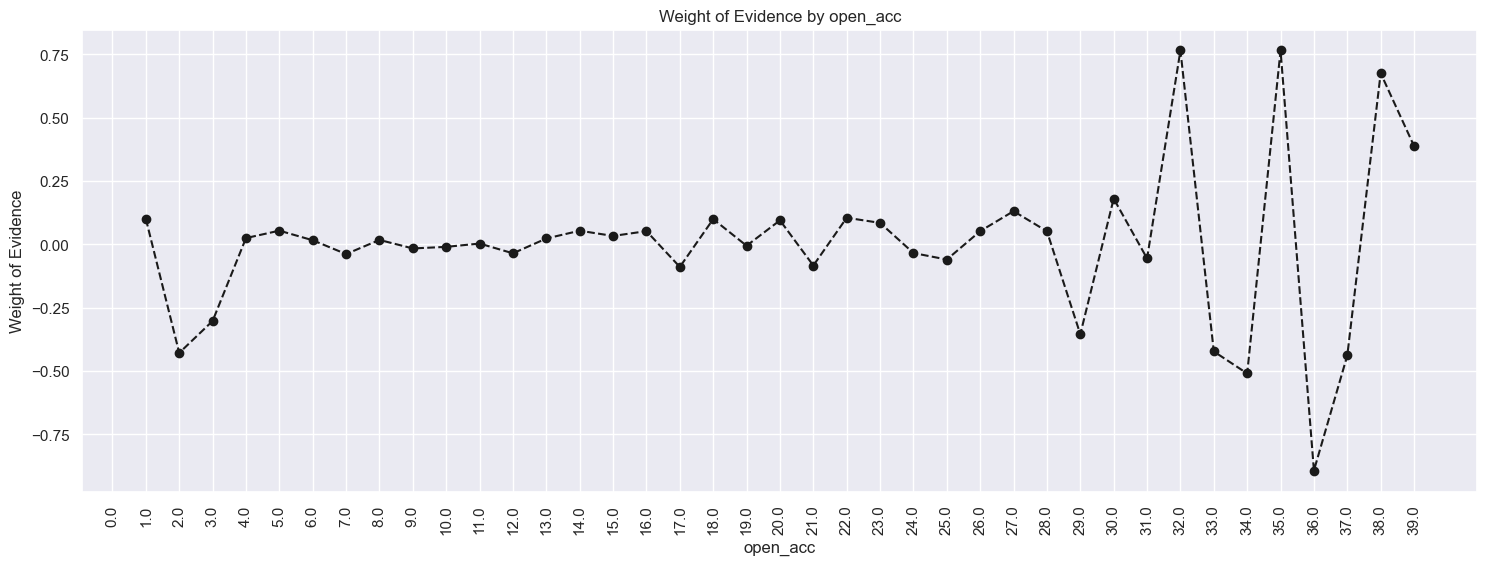

In [147]:
plot_by_woe(df_temp.iloc[ : 40, :], 90)
# We plot the weight of evidence values.

In [148]:
# Categories: '0', '1-3', '4-12', '13-17', '18-22', '23-25', '26-30', '>30'
df_inputs_prepr['open_acc:0'] = np.where((df_inputs_prepr['open_acc'] == 0), 1, 0)
df_inputs_prepr['open_acc:1-3'] = np.where((df_inputs_prepr['open_acc'] >= 1) & (df_inputs_prepr['open_acc'] <= 3), 1, 0)
df_inputs_prepr['open_acc:4-12'] = np.where((df_inputs_prepr['open_acc'] >= 4) & (df_inputs_prepr['open_acc'] <= 12), 1, 0)
df_inputs_prepr['open_acc:13-17'] = np.where((df_inputs_prepr['open_acc'] >= 13) & (df_inputs_prepr['open_acc'] <= 17), 1, 0)
df_inputs_prepr['open_acc:18-22'] = np.where((df_inputs_prepr['open_acc'] >= 18) & (df_inputs_prepr['open_acc'] <= 22), 1, 0)
df_inputs_prepr['open_acc:23-25'] = np.where((df_inputs_prepr['open_acc'] >= 23) & (df_inputs_prepr['open_acc'] <= 25), 1, 0)
df_inputs_prepr['open_acc:26-30'] = np.where((df_inputs_prepr['open_acc'] >= 26) & (df_inputs_prepr['open_acc'] <= 30), 1, 0)
df_inputs_prepr['open_acc:>=31'] = np.where((df_inputs_prepr['open_acc'] >= 31), 1, 0)

In [149]:
# pub_rec
df_temp = woe_ordered_continuous(df_inputs_prepr, 'pub_rec', df_targets_prepr)
# We calculate weight of evidence.
df_temp

pub_rec   n_obs  prop_good  prop_n_obs   n_good    n_bad  prop_n_good  \
0       0.0  101167   0.889213    0.867850  89959.0  11208.0     0.866473   
1       1.0   13308   0.899760    0.114161  11974.0   1334.0     0.115332   
2       2.0    1394   0.904591    0.011958   1261.0    133.0     0.012146   
3       3.0     404   0.900990    0.003466    364.0     40.0     0.003506   
4       4.0     138   0.876812    0.001184    121.0     17.0     0.001165   
5       5.0      91   0.890110    0.000781     81.0     10.0     0.000780   
6       6.0      31   0.870968    0.000266     27.0      4.0     0.000260   
7       7.0      18   0.833333    0.000154     15.0      3.0     0.000144   
8       8.0       5   0.800000    0.000043      4.0      1.0     0.000039   
9       9.0       4   1.000000    0.000034      4.0      0.0     0.000039   
10     10.0       4   1.000000    0.000034      4.0      0.0     0.000039   
11     11.0       5   1.000000    0.000043      5.0      0.0     0.000048   
12     12.0       1   1.000000    0.000009      1.0      0.0     0.000010   
13     14.0       1   1.000000    0.000009      1.0      0.0     0.000010   
14     49.0       1   1.000000    0.000009      1.0      0.0     0.000010   

    prop_n_bad       WoE  diff_prop_good  diff_WoE   IV  
0     0.879059 -0.014420             NaN       NaN  inf  
1     0.104627  0.097409        0.010547  0.111829  inf  
2     0.010431  0.152165        0.004832  0.054756  inf  
3     0.003137  0.111128        0.003601  0.041037  inf  
4     0.001333 -0.134569        0.024179  0.245697  inf  
5     0.000784 -0.005283        0.013298  0.129287  inf  
6     0.000314 -0.187604        0.019142  0.182322  inf  
7     0.000235 -0.487709        0.037634  0.300105  inf  
8     0.000078 -0.710852        0.033333  0.223144  inf  
9     0.000000       inf        0.200000       inf  inf  
10    0.000000       inf        0.000000       NaN  inf  
11    0.000000       inf        0.000000       NaN  inf  
12    0.000000       inf        0.000000       NaN  inf  
13    0.000000       inf        0.000000       NaN  inf  
14    0.000000       inf        0.000000       NaN  inf

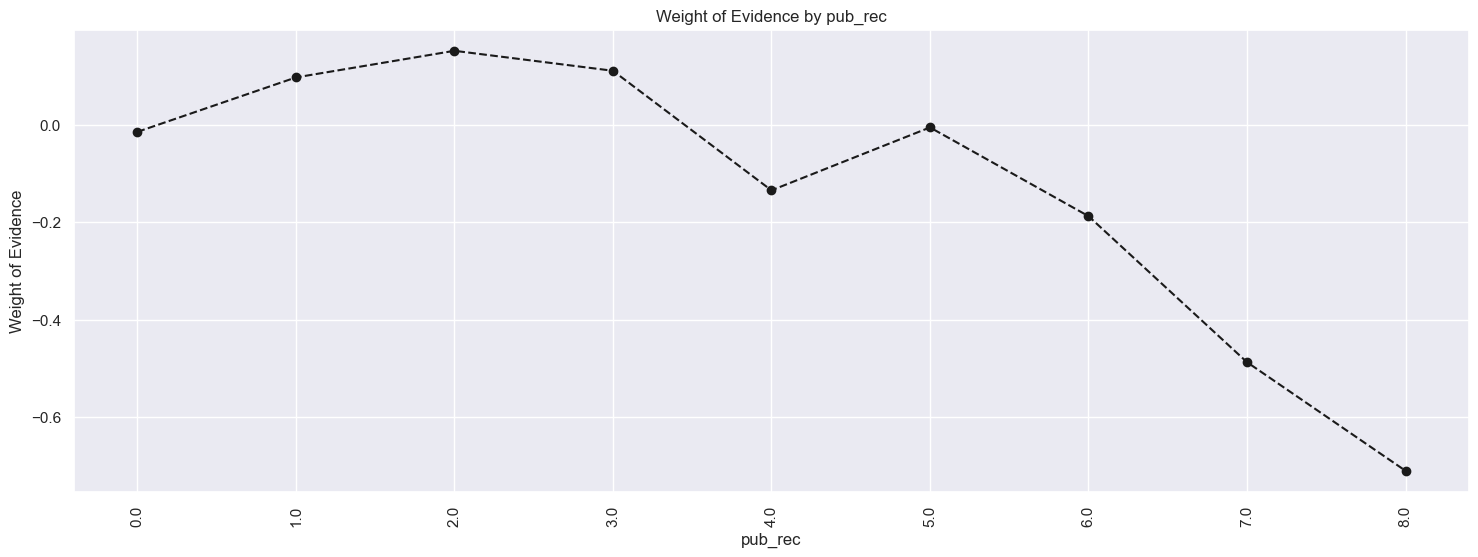

In [150]:
plot_by_woe(df_temp, 90)
# We plot the weight of evidence values.

In [151]:
# Categories '0-2', '3-4', '>=5'
df_inputs_prepr['pub_rec:0-2'] = np.where((df_inputs_prepr['pub_rec'] >= 0) & (df_inputs_prepr['pub_rec'] <= 2), 1, 0)
df_inputs_prepr['pub_rec:3-4'] = np.where((df_inputs_prepr['pub_rec'] >= 3) & (df_inputs_prepr['pub_rec'] <= 4), 1, 0)
df_inputs_prepr['pub_rec:>=5'] = np.where((df_inputs_prepr['pub_rec'] >= 5), 1, 0)

In [152]:
# total_acc
df_inputs_prepr['total_acc_factor'] = pd.cut(df_inputs_prepr['total_acc'], 50)
# Here we do fine-classing: using the 'cut' method, we split the variable into 50 categories by its values.
df_temp = woe_ordered_continuous(df_inputs_prepr, 'total_acc_factor', df_targets_prepr)
# We calculate weight of evidence.
df_temp

total_acc_factor  n_obs  prop_good  prop_n_obs   n_good   n_bad  \
0     (-0.156, 3.12]    145   0.786207    0.001244    114.0    31.0   
1       (3.12, 6.24]   1862   0.857143    0.015973   1596.0   266.0   
2       (6.24, 9.36]   4631   0.873461    0.039727   4045.0   586.0   
3      (9.36, 12.48]   7862   0.878911    0.067443   6910.0   952.0   
4      (12.48, 15.6]  10496   0.882717    0.090039   9265.0  1231.0   
5      (15.6, 18.72]  12325   0.889249    0.105729  10960.0  1365.0   
6     (18.72, 21.84]  12766   0.892057    0.109512  11388.0  1378.0   
7     (21.84, 24.96]  12507   0.892060    0.107290  11157.0  1350.0   
8     (24.96, 28.08]  14851   0.892802    0.127398  13259.0  1592.0   
9      (28.08, 31.2]   9134   0.891942    0.078355   8147.0   987.0   
10     (31.2, 34.32]   7726   0.903702    0.066277   6982.0   744.0   
11    (34.32, 37.44]   5893   0.904124    0.050552   5328.0   565.0   
12    (37.44, 40.56]   4473   0.901408    0.038371   4032.0   441.0   
13    (40.56, 43.68]   3560   0.891573    0.030539   3174.0   386.0   
14     (43.68, 46.8]   2440   0.892213    0.020931   2177.0   263.0   
15     (46.8, 49.92]   1848   0.899892    0.015853   1663.0   185.0   
16    (49.92, 53.04]   1610   0.903727    0.013811   1455.0   155.0   
17    (53.04, 56.16]    782   0.898977    0.006708    703.0    79.0   
18    (56.16, 59.28]    541   0.868762    0.004641    470.0    71.0   
19     (59.28, 62.4]    469   0.891258    0.004023    418.0    51.0   
20     (62.4, 65.52]    413   0.871671    0.003543    360.0    53.0   
21    (65.52, 68.64]     70   0.957143    0.000600     67.0     3.0   
22    (68.64, 71.76]     53   0.924528    0.000455     49.0     4.0   
23    (71.76, 74.88]     27   0.962963    0.000232     26.0     1.0   
24     (74.88, 78.0]     30   0.866667    0.000257     26.0     4.0   
25     (78.0, 81.12]     16   0.812500    0.000137     13.0     3.0   
26    (81.12, 84.24]     13   0.923077    0.000112     12.0     1.0   
27    (84.24, 87.36]      9   0.888889    0.000077      8.0     1.0   
28    (87.36, 90.48]      6   0.833333    0.000051      5.0     1.0   
29     (90.48, 93.6]      8   0.875000    0.000069      7.0     1.0   
30     (93.6, 96.72]      1   1.000000    0.000009      1.0     0.0   
31    (96.72, 99.84]      3   1.000000    0.000026      3.0     0.0   
32   (99.84, 102.96]      0        NaN    0.000000      NaN     NaN   
33  (102.96, 106.08]      1   1.000000    0.000009      1.0     0.0   
34   (106.08, 109.2]      0        NaN    0.000000      NaN     NaN   
35   (109.2, 112.32]      0        NaN    0.000000      NaN     NaN   
36  (112.32, 115.44]      0        NaN    0.000000      NaN     NaN   
37  (115.44, 118.56]      0        NaN    0.000000      NaN     NaN   
38  (118.56, 121.68]      0        NaN    0.000000      NaN     NaN   
39   (121.68, 124.8]      0        NaN    0.000000      NaN     NaN   
40   (124.8, 127.92]      0        NaN    0.000000      NaN     NaN   
41  (127.92, 131.04]      0        NaN    0.000000      NaN     NaN   
42  (131.04, 134.16]      0        NaN    0.000000      NaN     NaN   
43  (134.16, 137.28]      0        NaN    0.000000      NaN     NaN   
44   (137.28, 140.4]      0        NaN    0.000000      NaN     NaN   
45   (140.4, 143.52]      0        NaN    0.000000      NaN     NaN   
46  (143.52, 146.64]      0        NaN    0.000000      NaN     NaN   
47  (146.64, 149.76]      0        NaN    0.000000      NaN     NaN   
48  (149.76, 152.88]      0        NaN    0.000000      NaN     NaN   
49   (152.88, 156.0]      1   1.000000    0.000009      1.0     0.0   

    prop_n_good  prop_n_bad       WoE  diff_prop_good  diff_WoE   IV  
0      0.001098    0.002431 -0.794935             NaN       NaN  inf  
1      0.015372    0.020863 -0.305387        0.070936  0.489548  inf  
2      0.038961    0.045961 -0.165230        0.016319  0.140158  inf  
3      0.066556    0.074667 -0.114987        0.005450  0.050243  inf  
4      0.089239    0.096549

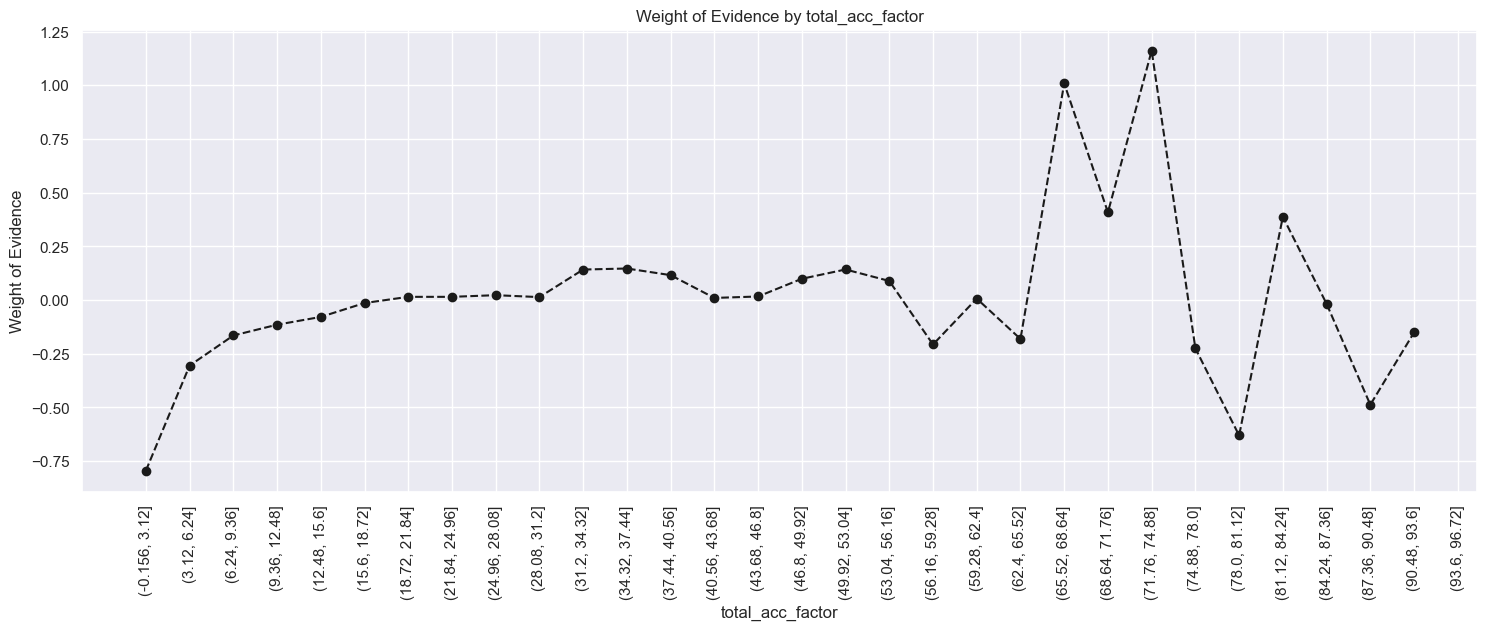

In [153]:
plot_by_woe(df_temp, 90)
# We plot the weight of evidence values.

In [154]:
# Categories: '<=27', '28-51', '>51'
df_inputs_prepr['total_acc:<=27'] = np.where((df_inputs_prepr['total_acc'] <= 27), 1, 0)
df_inputs_prepr['total_acc:28-51'] = np.where((df_inputs_prepr['total_acc'] >= 28) & (df_inputs_prepr['total_acc'] <= 51), 1, 0)
df_inputs_prepr['total_acc:>=52'] = np.where((df_inputs_prepr['total_acc'] >= 52), 1, 0)

In [155]:
# acc_now_delinq
df_temp = woe_ordered_continuous(df_inputs_prepr, 'acc_now_delinq', df_targets_prepr)
# We calculate weight of evidence.
df_temp

acc_now_delinq   n_obs  prop_good  prop_n_obs    n_good    n_bad  \
0             0.0  116108   0.890705    0.996020  103418.0  12690.0   
1             1.0     436   0.873853    0.003740     381.0     55.0   
2             2.0      24   0.833333    0.000206      20.0      4.0   
3             3.0       4   0.750000    0.000034       3.0      1.0   

   prop_n_good  prop_n_bad       WoE  diff_prop_good  diff_WoE        IV  
0     0.996109    0.995294  0.000818             NaN       NaN  0.000213  
1     0.003670    0.004314 -0.161680        0.016852  0.162499  0.000213  
2     0.000193    0.000314 -0.487709        0.040520  0.326028  0.000213  
3     0.000029    0.000078 -0.998534        0.083333  0.510826  0.000213

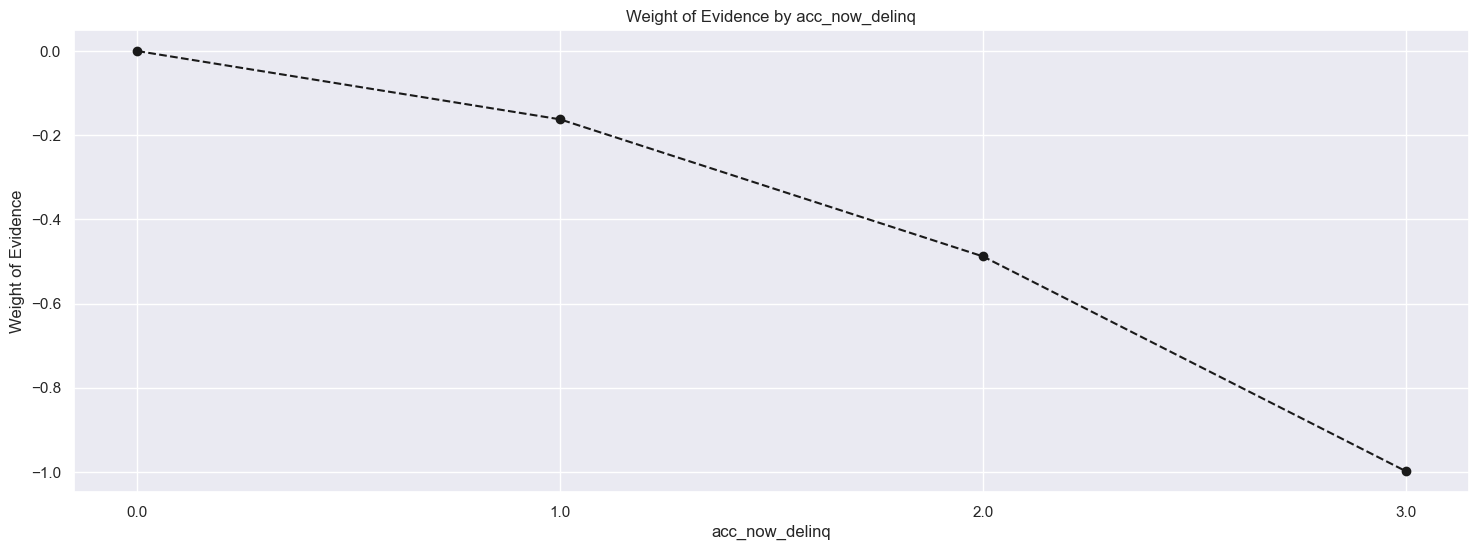

In [156]:
plot_by_woe(df_temp)
# We plot the weight of evidence values.

In [157]:
# Categories: '0', '>=1'
df_inputs_prepr['acc_now_delinq:0'] = np.where((df_inputs_prepr['acc_now_delinq'] == 0), 1, 0)
df_inputs_prepr['acc_now_delinq:>=1'] = np.where((df_inputs_prepr['acc_now_delinq'] >= 1), 1, 0)

In [158]:
# total_rev_hi_lim
df_inputs_prepr['total_rev_hi_lim_factor'] = pd.cut(df_inputs_prepr['total_rev_hi_lim'], 2000)
# Here we do fine-classing: using the 'cut' method, we split the variable into 2000 categories by its values.
df_temp = woe_ordered_continuous(df_inputs_prepr, 'total_rev_hi_lim_factor', df_targets_prepr)
# We calculate weight of evidence.
df_temp

total_rev_hi_lim_factor  n_obs  prop_good  prop_n_obs   n_good  \
0            (-9999.999, 5000.0]   6074   0.863187    0.052105   5243.0   
1             (5000.0, 9999.999]  16704   0.873024    0.143293  14583.0   
2          (9999.999, 14999.998]  18468   0.880279    0.158426  16257.0   
3         (14999.998, 19999.998]  16010   0.881699    0.137340  14116.0   
4         (19999.998, 24999.997]  13028   0.885938    0.111759  11542.0   
...                          ...    ...        ...         ...      ...   
1995  (9974999.002, 9979999.002]      0        NaN    0.000000      NaN   
1996  (9979999.002, 9984999.002]      0        NaN    0.000000      NaN   
1997  (9984999.002, 9989999.001]      0        NaN    0.000000      NaN   
1998    (9989999.001, 9994999.0]      0        NaN    0.000000      NaN   
1999      (9994999.0, 9999999.0]      1   1.000000    0.000009      1.0   

       n_bad  prop_n_good  prop_n_bad       WoE  diff_prop_good  diff_WoE   IV  
0      831.0     0.050500    0.065176 -0.255127             NaN       NaN  inf  
1     2121.0     0.140462    0.166353 -0.169178        0.009837  0.085949  inf  
2     2211.0     0.156585    0.173412 -0.102068        0.007255  0.067110  inf  
3     1894.0     0.135963    0.148549 -0.088529        0.001420  0.013539  inf  
4     1486.0     0.111171    0.116549 -0.047242        0.004239  0.041287  inf  
...      ...          ...         ...       ...             ...       ...  ...  
1995     NaN          NaN         NaN       NaN             NaN       NaN  inf  
1996     NaN          NaN         NaN       NaN             NaN       NaN  inf  
1997     NaN          NaN         NaN       NaN             NaN       NaN  inf  
1998     NaN          NaN         NaN       NaN             NaN       NaN  inf  
1999     0.0     0.000010    0.000000       inf             NaN       NaN  inf  

[2000 rows x 12 columns]

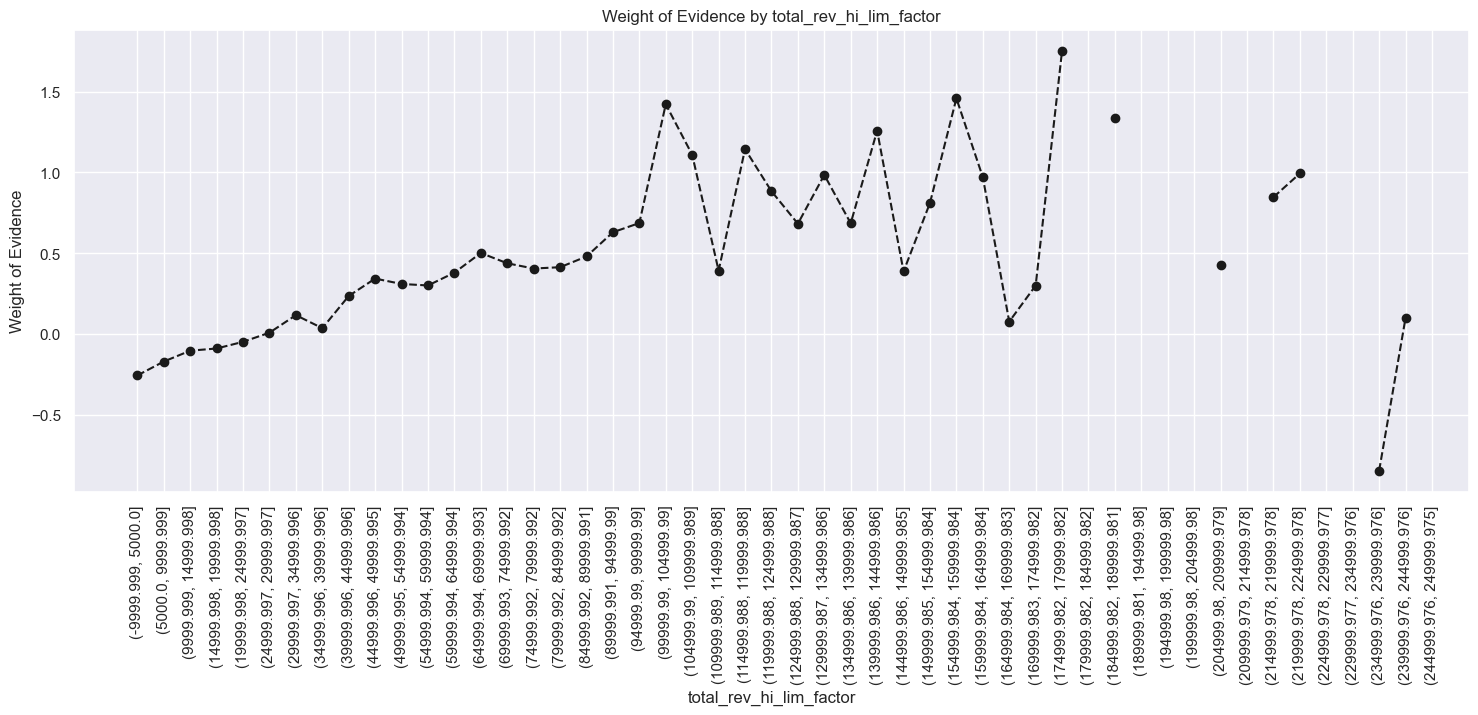

In [159]:
plot_by_woe(df_temp.iloc[: 50, : ], 90)
# We plot the weight of evidence values.

In [160]:
# Categories
# '<=5K', '5K-10K', '10K-20K', '20K-30K', '30K-40K', '40K-55K', '55K-95K', '>95K'
df_inputs_prepr['total_rev_hi_lim:<=5K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] <= 5000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:5K-10K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 5000) & (df_inputs_prepr['total_rev_hi_lim'] <= 10000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:10K-20K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 10000) & (df_inputs_prepr['total_rev_hi_lim'] <= 20000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:20K-30K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 20000) & (df_inputs_prepr['total_rev_hi_lim'] <= 30000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:30K-40K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 30000) & (df_inputs_prepr['total_rev_hi_lim'] <= 40000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:40K-55K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 40000) & (df_inputs_prepr['total_rev_hi_lim'] <= 55000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:55K-95K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 55000) & (df_inputs_prepr['total_rev_hi_lim'] <= 95000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:>95K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 95000), 1, 0)

In [161]:
# installment
df_inputs_prepr['installment_factor'] = pd.cut(df_inputs_prepr['installment'], 50)
# Here we do fine-classing: using the 'cut' method, we split the variable into 50 categories by its values.
df_temp = woe_ordered_continuous(df_inputs_prepr, 'installment_factor', df_targets_prepr)
# We calculate weight of evidence.
df_temp

installment_factor  n_obs  prop_good  prop_n_obs  n_good  n_bad  \
0      (14.369, 43.585]    607   0.869852    0.005207   528.0   79.0   
1       (43.585, 71.41]   1536   0.906901    0.013176  1393.0  143.0   
2       (71.41, 99.235]   2168   0.895756    0.018598  1942.0  226.0   
3      (99.235, 127.06]   2867   0.896756    0.024594  2571.0  296.0   
4     (127.06, 154.885]   3225   0.891163    0.027665  2874.0  351.0   
5     (154.885, 182.71]   5263   0.897967    0.045148  4726.0  537.0   
6     (182.71, 210.535]   5138   0.904243    0.044076  4646.0  492.0   
7     (210.535, 238.36]   4693   0.900916    0.040258  4228.0  465.0   
8     (238.36, 266.185]   5895   0.899237    0.050570  5301.0  594.0   
9     (266.185, 294.01]   6221   0.889728    0.053366  5535.0  686.0   
10    (294.01, 321.835]   6431   0.904836    0.055168  5819.0  612.0   
11    (321.835, 349.66]   8044   0.891845    0.069005  7174.0  870.0   
12    (349.66, 377.485]   5871   0.882644    0.050364  5182.0  689.0   
13    (377.485, 405.31]   5506   0.897930    0.047233  4944.0  562.0   
14    (405.31, 433.135]   4262   0.882684    0.036561  3762.0  500.0   
15    (433.135, 460.96]   4053   0.878855    0.034768  3562.0  491.0   
16    (460.96, 488.785]   4789   0.889747    0.041082  4261.0  528.0   
17    (488.785, 516.61]   4850   0.886804    0.041605  4301.0  549.0   
18    (516.61, 544.435]   3475   0.872518    0.029810  3032.0  443.0   
19    (544.435, 572.26]   3192   0.878133    0.027382  2803.0  389.0   
20    (572.26, 600.085]   3037   0.873559    0.026053  2653.0  384.0   
21    (600.085, 627.91]   2847   0.901651    0.024423  2567.0  280.0   
22    (627.91, 655.735]   2616   0.901376    0.022441  2358.0  258.0   
23    (655.735, 683.56]   2817   0.893149    0.024165  2516.0  301.0   
24    (683.56, 711.385]   2046   0.875367    0.017551  1791.0  255.0   
25    (711.385, 739.21]   1540   0.895455    0.013211  1379.0  161.0   
26    (739.21, 767.035]   1689   0.898165    0.014489  1517.0  172.0   
27    (767.035, 794.86]   1470   0.889116    0.012610  1307.0  163.0   
28    (794.86, 822.685]   1274   0.888540    0.010929  1132.0  142.0   
29    (822.685, 850.51]   1200   0.883333    0.010294  1060.0  140.0   
30    (850.51, 878.335]   1301   0.889316    0.011160  1157.0  144.0   
31    (878.335, 906.16]    921   0.856678    0.007901   789.0  132.0   
32    (906.16, 933.985]    725   0.857931    0.006219   622.0  103.0   
33    (933.985, 961.81]    779   0.863928    0.006683   673.0  106.0   
34    (961.81, 989.635]    551   0.838475    0.004727   462.0   89.0   
35   (989.635, 1017.46]    557   0.859964    0.004778   479.0   78.0   
36  (1017.46, 1045.285]    372   0.884409    0.003191   329.0   43.0   
37  (1045.285, 1073.11]    263   0.897338    0.002256   236.0   27.0   
38  (1073.11, 1100.935]    279   0.896057    0.002393   250.0   29.0   
39  (1100.935, 1128.76]    310   0.932258    0.002659   289.0   21.0   
40  (1128.76, 1156.585]    293   0.921502    0.002513   270.0   23.0   
41  (1156.585, 1184.41]    344   0.904070    0.002951   311.0   33.0   
42  (1184.41, 1212.235]    393   0.905852    0.003371   356.0   37.0   
43  (1212.235, 1240.06]    369   0.899729    0.003165   332.0   37.0   
44  (1240.06, 1267.885]    196   0.846939    0.001681   166.0   30.0   
45  (1267.885, 1295.71]    175   0.817143    0.001501   143.0   32.0   
46  (1295.71, 1323.535]     64   0.765625    0.000549    49.0   15.0   
47  (1323.535, 1351.36]     30   0.733333    0.000257    22.0    8.0   
48  (1351.36, 1379.185]     17   0.705882    0.000146    12.0    5.0   
49  (1379.185, 1407.01]     11   1.000000    0.000094    11.0    0.0   

    prop_n_good  prop_n_bad       WoE  diff_prop_good  diff_WoE   IV  
0      0.005086    0.006196 -0.197498             NaN       NaN  inf  
1      0.013417    0.011216  0.179224        0.037049  0.376722  inf  
2      0.018705    0.017725  0.053792        0.011145  0.125432  inf  
3      0.024764    0.023216  0.064544        0.0

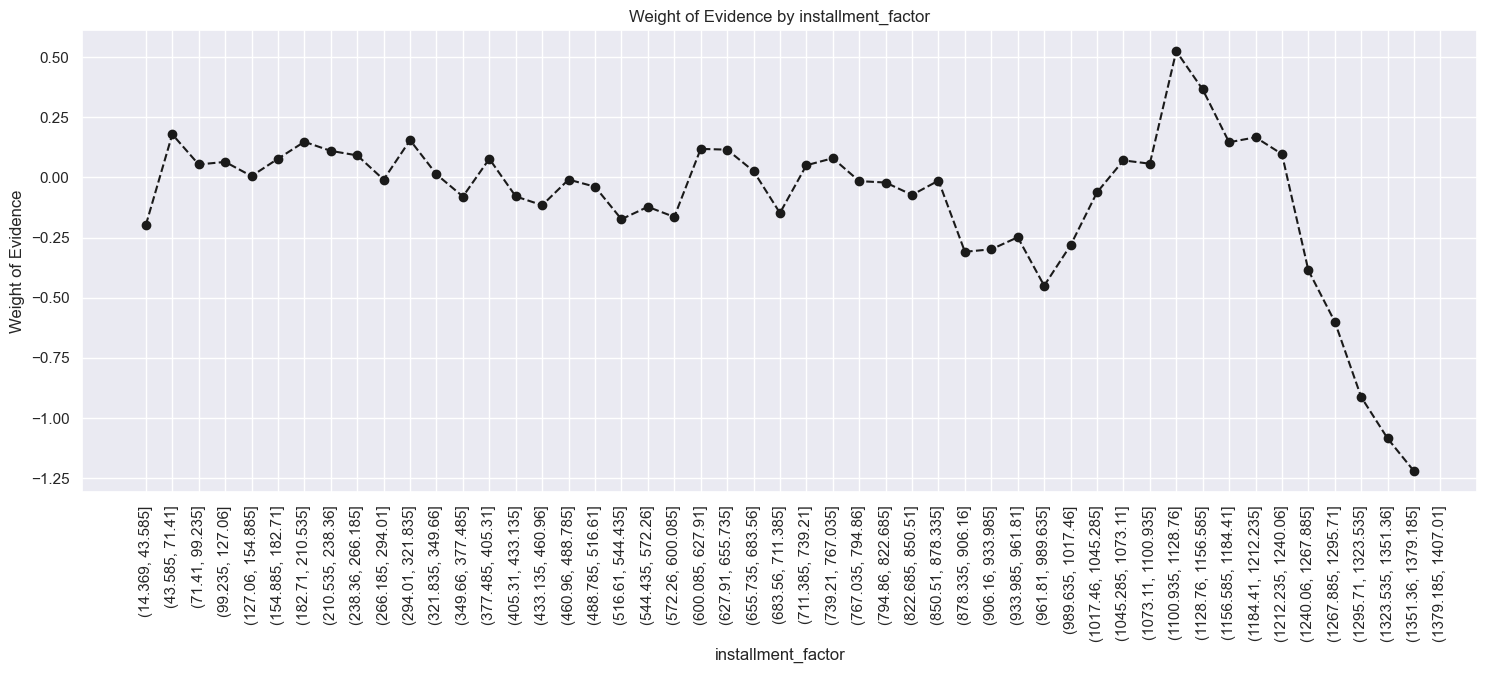

In [162]:
plot_by_woe(df_temp, 90)
# We plot the weight of evidence values.

### Preprocessing Continuous Variables: Creating Dummy Variables, Part 3

In [163]:
# annual_inc
df_inputs_prepr['annual_inc_factor'] = pd.cut(df_inputs_prepr['annual_inc'], 50)
# Here we do fine-classing: using the 'cut' method, we split the variable into 50 categories by its values.
df_temp = woe_ordered_continuous(df_inputs_prepr, 'annual_inc_factor', df_targets_prepr)
# We calculate weight of evidence.
df_temp

annual_inc_factor   n_obs  prop_good  prop_n_obs   n_good    n_bad  \
0      (-2695.2, 154704.0]  111623   0.888894    0.957546  99221.0  12402.0   
1     (154704.0, 304608.0]    4429   0.928426    0.037994   4112.0    317.0   
2     (304608.0, 454512.0]     345   0.933333    0.002960    322.0     23.0   
3     (454512.0, 604416.0]     101   0.970297    0.000866     98.0      3.0   
4     (604416.0, 754320.0]      30   0.933333    0.000257     28.0      2.0   
5     (754320.0, 904224.0]      21   0.952381    0.000180     20.0      1.0   
6    (904224.0, 1054128.0]       9   0.888889    0.000077      8.0      1.0   
7   (1054128.0, 1204032.0]       6   1.000000    0.000051      6.0      0.0   
8   (1204032.0, 1353936.0]       2   0.500000    0.000017      1.0      1.0   
9   (1353936.0, 1503840.0]       3   1.000000    0.000026      3.0      0.0   
10  (1503840.0, 1653744.0]       1   1.000000    0.000009      1.0      0.0   
11  (1653744.0, 1803648.0]       0        NaN    0.000000      NaN      NaN   
12  (1803648.0, 1953552.0]       0        NaN    0.000000      NaN      NaN   
13  (1953552.0, 2103456.0]       0        NaN    0.000000      NaN      NaN   
14  (2103456.0, 2253360.0]       0        NaN    0.000000      NaN      NaN   
15  (2253360.0, 2403264.0]       0        NaN    0.000000      NaN      NaN   
16  (2403264.0, 2553168.0]       0        NaN    0.000000      NaN      NaN   
17  (2553168.0, 2703072.0]       0        NaN    0.000000      NaN      NaN   
18  (2703072.0, 2852976.0]       0        NaN    0.000000      NaN      NaN   
19  (2852976.0, 3002880.0]       0        NaN    0.000000      NaN      NaN   
20  (3002880.0, 3152784.0]       0        NaN    0.000000      NaN      NaN   
21  (3152784.0, 3302688.0]       0        NaN    0.000000      NaN      NaN   
22  (3302688.0, 3452592.0]       0        NaN    0.000000      NaN      NaN   
23  (3452592.0, 3602496.0]       0        NaN    0.000000      NaN      NaN   
24  (3602496.0, 3752400.0]       0        NaN    0.000000      NaN      NaN   
25  (3752400.0, 3902304.0]       0        NaN    0.000000      NaN      NaN   
26  (3902304.0, 4052208.0]       0        NaN    0.000000      NaN      NaN   
27  (4052208.0, 4202112.0]       0        NaN    0.000000      NaN      NaN   
28  (4202112.0, 4352016.0]       0        NaN    0.000000      NaN      NaN   
29  (4352016.0, 4501920.0]       0        NaN    0.000000      NaN      NaN   
30  (4501920.0, 4651824.0]       0        NaN    0.000000      NaN      NaN   
31  (4651824.0, 4801728.0]       0        NaN    0.000000      NaN      NaN   
32  (4801728.0, 4951632.0]       0        NaN    0.000000      NaN      NaN   
33  (4951632.0, 5101536.0]       0        NaN    0.000000      NaN      NaN   
34  (5101536.0, 5251440.0]       0        NaN    0.000000      NaN      NaN   
35  (5251440.0, 5401344.0]       0        NaN    0.000000      NaN      NaN   
36  (5401344.0, 5551248.0]       0        NaN    0.000000      NaN      NaN   
37  (5551248.0, 5701152.0]       0        NaN    0.000000      NaN      NaN   
38  (5701152.0, 5851056.0]       0        NaN    0.000000      NaN      NaN   
39  (5851056.0, 6000960.0]       0        NaN    0.000000      NaN      NaN   
40  (6000960.0, 6150864.0]       0        NaN    0.000000      NaN      NaN   
41  (6150864.0, 6300768.0]       0        NaN    0.000000      NaN      NaN   
42  (6300768.0, 6450672.0]       0        NaN    0.000000      NaN      NaN   
43  (6450672.0, 6600576.0]       0        NaN    0.000000      NaN      NaN   
44  (6600576.0, 6750480.0]       0        NaN    0.000000      NaN      NaN   
45  (6750480.0, 6900384.0]       0        NaN    0.000000      NaN      NaN   
46  (6900384.0, 7050288.0]       0        NaN    0.000000      NaN      NaN   
47  (7050288.0, 7200192.0]       0        NaN    0.000000      NaN      NaN   
48  (7200192.0, 7350096.0]       0        NaN    0.000000      NaN      NaN   
49  (7350096.0, 7500000.0]       2   1.000000    0.000017  

In [164]:
df_inputs_prepr['annual_inc_factor'] = pd.cut(df_inputs_prepr['annual_inc'], 100)
# Here we do fine-classing: using the 'cut' method, we split the variable into 100 categories by its values.
df_temp = woe_ordered_continuous(df_inputs_prepr, 'annual_inc_factor', df_targets_prepr)
# We calculate weight of evidence.
df_temp

annual_inc_factor  n_obs  prop_good  prop_n_obs   n_good   n_bad  \
0       (-2695.2, 79752.0]  78346   0.877645    0.672082  68760.0  9586.0   
1      (79752.0, 154704.0]  33277   0.915377    0.285463  30461.0  2816.0   
2     (154704.0, 229656.0]   3572   0.927492    0.030642   3313.0   259.0   
3     (229656.0, 304608.0]    857   0.932322    0.007352    799.0    58.0   
4     (304608.0, 379560.0]    208   0.937500    0.001784    195.0    13.0   
5     (379560.0, 454512.0]    137   0.927007    0.001175    127.0    10.0   
6     (454512.0, 529464.0]     63   0.968254    0.000540     61.0     2.0   
7     (529464.0, 604416.0]     38   0.973684    0.000326     37.0     1.0   
8     (604416.0, 679368.0]     12   0.916667    0.000103     11.0     1.0   
9     (679368.0, 754320.0]     18   0.944444    0.000154     17.0     1.0   
10    (754320.0, 829272.0]      8   1.000000    0.000069      8.0     0.0   
11    (829272.0, 904224.0]     13   0.923077    0.000112     12.0     1.0   
12    (904224.0, 979176.0]      4   0.750000    0.000034      3.0     1.0   
13   (979176.0, 1054128.0]      5   1.000000    0.000043      5.0     0.0   
14  (1054128.0, 1129080.0]      3   1.000000    0.000026      3.0     0.0   
15  (1129080.0, 1204032.0]      3   1.000000    0.000026      3.0     0.0   
16  (1204032.0, 1278984.0]      2   0.500000    0.000017      1.0     1.0   
17  (1278984.0, 1353936.0]      0        NaN    0.000000      NaN     NaN   
18  (1353936.0, 1428888.0]      1   1.000000    0.000009      1.0     0.0   
19  (1428888.0, 1503840.0]      2   1.000000    0.000017      2.0     0.0   
20  (1503840.0, 1578792.0]      1   1.000000    0.000009      1.0     0.0   
21  (1578792.0, 1653744.0]      0        NaN    0.000000      NaN     NaN   
22  (1653744.0, 1728696.0]      0        NaN    0.000000      NaN     NaN   
23  (1728696.0, 1803648.0]      0        NaN    0.000000      NaN     NaN   
24  (1803648.0, 1878600.0]      0        NaN    0.000000      NaN     NaN   
25  (1878600.0, 1953552.0]      0        NaN    0.000000      NaN     NaN   
26  (1953552.0, 2028504.0]      0        NaN    0.000000      NaN     NaN   
27  (2028504.0, 2103456.0]      0        NaN    0.000000      NaN     NaN   
28  (2103456.0, 2178408.0]      0        NaN    0.000000      NaN     NaN   
29  (2178408.0, 2253360.0]      0        NaN    0.000000      NaN     NaN   
30  (2253360.0, 2328312.0]      0        NaN    0.000000      NaN     NaN   
31  (2328312.0, 2403264.0]      0        NaN    0.000000      NaN     NaN   
32  (2403264.0, 2478216.0]      0        NaN    0.000000      NaN     NaN   
33  (2478216.0, 2553168.0]      0        NaN    0.000000      NaN     NaN   
34  (2553168.0, 2628120.0]      0        NaN    0.000000      NaN     NaN   
35  (2628120.0, 2703072.0]      0        NaN    0.000000      NaN     NaN   
36  (2703072.0, 2778024.0]      0        NaN    0.000000      NaN     NaN   
37  (2778024.0, 2852976.0]      0        NaN    0.000000      NaN     NaN   
38  (2852976.0, 2927928.0]      0        NaN    0.000000      NaN     NaN   
39  (2927928.0, 3002880.0]      0        NaN    0.000000      NaN     NaN   
40  (3002880.0, 3077832.0]      0        NaN    0.000000      NaN     NaN   
41  (3077832.0, 3152784.0]      0        NaN    0.000000      NaN     NaN   
42  (3152784.0, 3227736.0]      0        NaN    0.000000      NaN     NaN   
43  (3227736.0, 3302688.0]      0        NaN    0.000000      NaN     NaN   
44  (3302688.0, 3377640.0]      0        NaN    0.000000      NaN     NaN   
45  (3377640.0, 3452592.0]      0        NaN    0.000000      NaN     NaN   
46  (3452592.0, 3527544.0]      0        NaN    0.000000      NaN     NaN   
47  (3527544.0, 3602496.0]      0        NaN    0.000000      NaN     NaN   
48  (3602496.0, 3677448.0]      0        NaN    0.000000      NaN     NaN   
49  (3677448.0, 3752400.0]      0        NaN    0.000000      NaN     NaN   
50  (3752400.0, 3827352.0]      0        NaN    0.000000      NaN     NaN   
51  (

In [165]:
# Initial examination shows that there are too few individuals with large income and too many with small income.
# Hence, we are going to have one category for more than 150K, and we are going to apply our approach to determine
# the categories of everyone with 140k or less.
df_inputs_prepr_temp = df_inputs_prepr.loc[df_inputs_prepr['annual_inc'] <= 140000, : ]
#loan_data_temp = loan_data_temp.reset_index(drop = True)
#df_inputs_prepr_temp

In [166]:
df_inputs_prepr_temp["annual_inc_factor"] = pd.cut(df_inputs_prepr_temp['annual_inc'], 50)
# Here we do fine-classing: using the 'cut' method, we split the variable into 50 categories by its values.
df_temp = woe_ordered_continuous(df_inputs_prepr_temp, 'annual_inc_factor', df_targets_prepr[df_inputs_prepr_temp.index])
# We calculate weight of evidence.
df_temp

annual_inc_factor  n_obs  prop_good  prop_n_obs  n_good  n_bad  \
0       (4664.8, 7504.0]     14   0.857143    0.000128    12.0    2.0   
1      (7504.0, 10208.0]    100   0.780000    0.000911    78.0   22.0   
2     (10208.0, 12912.0]    164   0.792683    0.001494   130.0   34.0   
3     (12912.0, 15616.0]    375   0.850667    0.003417   319.0   56.0   
4     (15616.0, 18320.0]    472   0.838983    0.004300   396.0   76.0   
5     (18320.0, 21024.0]    909   0.847085    0.008282   770.0  139.0   
6     (21024.0, 23728.0]    868   0.852535    0.007909   740.0  128.0   
7     (23728.0, 26432.0]   2200   0.857727    0.020045  1887.0  313.0   
8     (26432.0, 29136.0]   1715   0.860058    0.015626  1475.0  240.0   
9     (29136.0, 31840.0]   2860   0.858042    0.026058  2454.0  406.0   
10    (31840.0, 34544.0]   2694   0.857090    0.024546  2309.0  385.0   
11    (34544.0, 37248.0]   4419   0.857660    0.040262  3790.0  629.0   
12    (37248.0, 39952.0]   2427   0.877215    0.022113  2129.0  298.0   
13    (39952.0, 42656.0]   6245   0.866934    0.056899  5414.0  831.0   
14    (42656.0, 45360.0]   5095   0.874779    0.046422  4457.0  638.0   
15    (45360.0, 48064.0]   3757   0.877296    0.034231  3296.0  461.0   
16    (48064.0, 50768.0]   5419   0.875438    0.049374  4744.0  675.0   
17    (50768.0, 53472.0]   3619   0.883946    0.032973  3199.0  420.0   
18    (53472.0, 56176.0]   5199   0.876130    0.047369  4555.0  644.0   
19    (56176.0, 58880.0]   2285   0.885777    0.020819  2024.0  261.0   
20    (58880.0, 61584.0]   5930   0.880438    0.054029  5221.0  709.0   
21    (61584.0, 64288.0]   2847   0.891465    0.025940  2538.0  309.0   
22    (64288.0, 66992.0]   4276   0.891955    0.038960  3814.0  462.0   
23    (66992.0, 69696.0]   2478   0.904762    0.022578  2242.0  236.0   
24    (69696.0, 72400.0]   5127   0.899161    0.046713  4610.0  517.0   
25    (72400.0, 75104.0]   4331   0.895867    0.039461  3880.0  451.0   
26    (75104.0, 77808.0]   1200   0.917500    0.010933  1101.0   99.0   
27    (77808.0, 80512.0]   4467   0.899933    0.040700  4020.0  447.0   
28    (80512.0, 83216.0]   1620   0.920370    0.014760  1491.0  129.0   
29    (83216.0, 85920.0]   2856   0.900560    0.026022  2572.0  284.0   
30    (85920.0, 88624.0]   1461   0.913758    0.013311  1335.0  126.0   
31    (88624.0, 91328.0]   3050   0.916721    0.027789  2796.0  254.0   
32    (91328.0, 94032.0]   1416   0.918785    0.012901  1301.0  115.0   
33    (94032.0, 96736.0]   1977   0.915023    0.018013  1809.0  168.0   
34    (96736.0, 99440.0]   1136   0.914613    0.010350  1039.0   97.0   
35   (99440.0, 102144.0]   2877   0.907543    0.026213  2611.0  266.0   
36  (102144.0, 104848.0]    673   0.900446    0.006132   606.0   67.0   
37  (104848.0, 107552.0]   1362   0.933921    0.012409  1272.0   90.0   
38  (107552.0, 110256.0]   1957   0.918753    0.017831  1798.0  159.0   
39  (110256.0, 112960.0]    376   0.912234    0.003426   343.0   33.0   
40  (112960.0, 115664.0]    995   0.911558    0.009066   907.0   88.0   
41  (115664.0, 118368.0]    456   0.929825    0.004155   424.0   32.0   
42  (118368.0, 121072.0]   1886   0.913574    0.017184  1723.0  163.0   
43  (121072.0, 123776.0]    262   0.931298    0.002387   244.0   18.0   
44  (123776.0, 126480.0]   1067   0.930647    0.009722   993.0   74.0   
45  (126480.0, 129184.0]    283   0.929329    0.002578   263.0   20.0   
46  (129184.0, 131888.0]    909   0.928493    0.008282   844.0   65.0   
47  (131888.0, 134592.0]    268   0.925373    0.002442   248.0   20.0   
48  (134592.0, 137296.0]    575   0.926957    0.005239   533.0   42.0   
49  (137296.0, 140000.0]    801   0.920100    0.007298   737.0   64.0   

    prop_n_good  prop_n_bad       WoE  diff_prop_good  diff_WoE        IV  
0      0.000123    0.000163 -0.281516             NaN       NaN  0.050924  
1      0.000800    0.001794 -0.807609        0.077143  0.526093  0.050924  
2      0.001333    0.002773 -0.732102        0.012683  

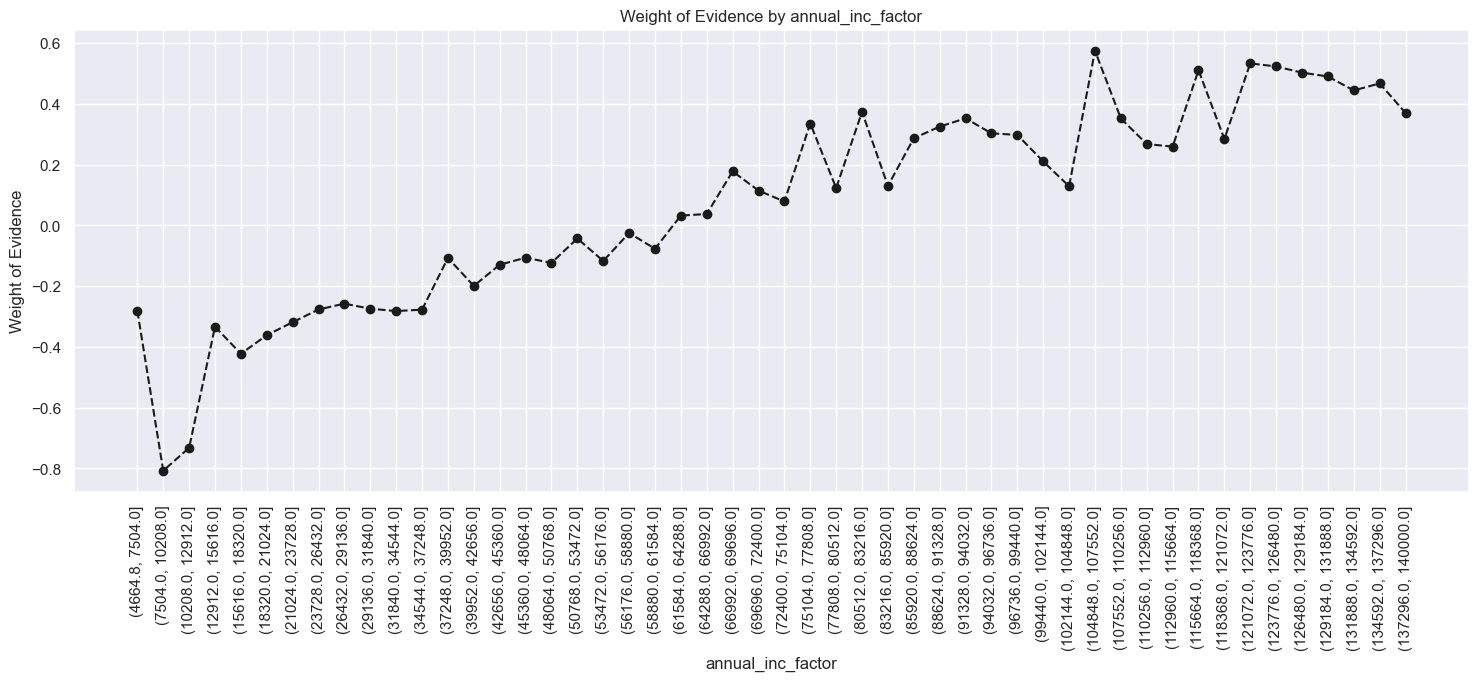

In [167]:
plot_by_woe(df_temp, 90)
# We plot the weight of evidence values.

In [168]:
# WoE is monotonically decreasing with income, so we split income in 10 equal categories, each with width of 15k.
df_inputs_prepr['annual_inc:<20K'] = np.where((df_inputs_prepr['annual_inc'] <= 20000), 1, 0)
df_inputs_prepr['annual_inc:20K-30K'] = np.where((df_inputs_prepr['annual_inc'] > 20000) & (df_inputs_prepr['annual_inc'] <= 30000), 1, 0)
df_inputs_prepr['annual_inc:30K-40K'] = np.where((df_inputs_prepr['annual_inc'] > 30000) & (df_inputs_prepr['annual_inc'] <= 40000), 1, 0)
df_inputs_prepr['annual_inc:40K-50K'] = np.where((df_inputs_prepr['annual_inc'] > 40000) & (df_inputs_prepr['annual_inc'] <= 50000), 1, 0)
df_inputs_prepr['annual_inc:50K-60K'] = np.where((df_inputs_prepr['annual_inc'] > 50000) & (df_inputs_prepr['annual_inc'] <= 60000), 1, 0)
df_inputs_prepr['annual_inc:60K-70K'] = np.where((df_inputs_prepr['annual_inc'] > 60000) & (df_inputs_prepr['annual_inc'] <= 70000), 1, 0)
df_inputs_prepr['annual_inc:70K-80K'] = np.where((df_inputs_prepr['annual_inc'] > 70000) & (df_inputs_prepr['annual_inc'] <= 80000), 1, 0)
df_inputs_prepr['annual_inc:80K-90K'] = np.where((df_inputs_prepr['annual_inc'] > 80000) & (df_inputs_prepr['annual_inc'] <= 90000), 1, 0)
df_inputs_prepr['annual_inc:90K-100K'] = np.where((df_inputs_prepr['annual_inc'] > 90000) & (df_inputs_prepr['annual_inc'] <= 100000), 1, 0)
df_inputs_prepr['annual_inc:100K-120K'] = np.where((df_inputs_prepr['annual_inc'] > 100000) & (df_inputs_prepr['annual_inc'] <= 120000), 1, 0)
df_inputs_prepr['annual_inc:120K-140K'] = np.where((df_inputs_prepr['annual_inc'] > 120000) & (df_inputs_prepr['annual_inc'] <= 140000), 1, 0)
df_inputs_prepr['annual_inc:>140K'] = np.where((df_inputs_prepr['annual_inc'] > 140000), 1, 0)

In [169]:
# mths_since_last_delinq
# We have to create one category for missing values and do fine and coarse classing for the rest.
df_inputs_prepr_temp = df_inputs_prepr[pd.notnull(df_inputs_prepr['mths_since_last_delinq'])]
df_inputs_prepr_temp['mths_since_last_delinq_factor'] = pd.cut(df_inputs_prepr_temp['mths_since_last_delinq'], 50)
df_temp = woe_ordered_continuous(df_inputs_prepr_temp, 'mths_since_last_delinq_factor', df_targets_prepr[df_inputs_prepr_temp.index])
# We calculate weight of evidence.
df_temp

mths_since_last_delinq_factor  n_obs  prop_good  prop_n_obs  n_good  n_bad  \
0                   (-0.17, 3.4]   1664   0.867188    0.030952  1443.0  221.0   
1                     (3.4, 6.8]   2366   0.883347    0.044010  2090.0  276.0   
2                    (6.8, 10.2]   4192   0.890267    0.077975  3732.0  460.0   
3                   (10.2, 13.6]   3092   0.894243    0.057514  2765.0  327.0   
4                   (13.6, 17.0]   3963   0.887207    0.073715  3516.0  447.0   
5                   (17.0, 20.4]   2851   0.892669    0.053031  2545.0  306.0   
6                   (20.4, 23.8]   2647   0.898753    0.049236  2379.0  268.0   
7                   (23.8, 27.2]   3427   0.892909    0.063745  3060.0  367.0   
8                   (27.2, 30.6]   2426   0.899011    0.045126  2181.0  245.0   
9                   (30.6, 34.0]   3070   0.893485    0.057105  2743.0  327.0   
10                  (34.0, 37.4]   2245   0.908241    0.041759  2039.0  206.0   
11                  (37.4, 40.8]   2220   0.885586    0.041294  1966.0  254.0   
12                  (40.8, 44.2]   2827   0.879377    0.052585  2486.0  341.0   
13                  (44.2, 47.6]   2095   0.898329    0.038969  1882.0  213.0   
14                  (47.6, 51.0]   2179   0.891235    0.040531  1942.0  237.0   
15                  (51.0, 54.4]   1434   0.887727    0.026674  1273.0  161.0   
16                  (54.4, 57.8]   1402   0.908702    0.026078  1274.0  128.0   
17                  (57.8, 61.2]   1797   0.899277    0.033426  1616.0  181.0   
18                  (61.2, 64.6]   1255   0.885259    0.023344  1111.0  144.0   
19                  (64.6, 68.0]   1666   0.890756    0.030989  1484.0  182.0   
20                  (68.0, 71.4]   1152   0.888021    0.021428  1023.0  129.0   
21                  (71.4, 74.8]   1133   0.885260    0.021075  1003.0  130.0   
22                  (74.8, 78.2]   1515   0.906931    0.028180  1374.0  141.0   
23                  (78.2, 81.6]    932   0.870172    0.017336   811.0  121.0   
24                  (81.6, 85.0]    164   0.890244    0.003051   146.0   18.0   
25                  (85.0, 88.4]     11   1.000000    0.000205    11.0    0.0   
26                  (88.4, 91.8]      3   1.000000    0.000056     3.0    0.0   
27                  (91.8, 95.2]      4   1.000000    0.000074     4.0    0.0   
28                  (95.2, 98.6]      4   0.500000    0.000074     2.0    2.0   
29                 (98.6, 102.0]      5   1.000000    0.000093     5.0    0.0   
30                (102.0, 105.4]      3   1.000000    0.000056     3.0    0.0   
31                (105.4, 108.8]      3   1.000000    0.000056     3.0    0.0   
32                (108.8, 112.2]      1   1.000000    0.000019     1.0    0.0   
33                (112.2, 115.6]      1   1.000000    0.000019     1.0    0.0   
34                (115.6, 119.0]      2   1.000000    0.000037     2.0    0.0   
35                (119.0, 122.4]      3   1.000000    0.000056     3.0    0.0   
36                (122.4, 125.8]      1   1.000000    0.000019     1.0    0.0   
37                (125.8, 129.2]      0        NaN    0.000000     NaN    NaN   
38                (129.2, 132.6]      1   1.000000    0.000019     1.0    0.0   
39                (132.6, 136.0]      2   1.000000    0.000037     2.0    0.0   
40                (136.0, 139.4]      0        NaN    0.000000     NaN    NaN   
41                (139.4, 142.8]      0        NaN    0.000000     NaN    NaN   
42                (142.8, 146.2]      1   1.000000    0.000019     1.0    0.0   
43                (146.2, 149.6]      0        NaN    0.000000     NaN    NaN   
44                (149.6, 153.0]      1   1.000000    0.000019     1.0    0.0   
45                (153.0, 156.4]      0        NaN    0.000000     NaN    NaN   
46                (156.4, 159.8]      0        NaN    0.000000     NaN    NaN   
47                (159.8, 163.2]      0        NaN    0.000000     NaN    NaN   
48                (163.2, 166.6]  

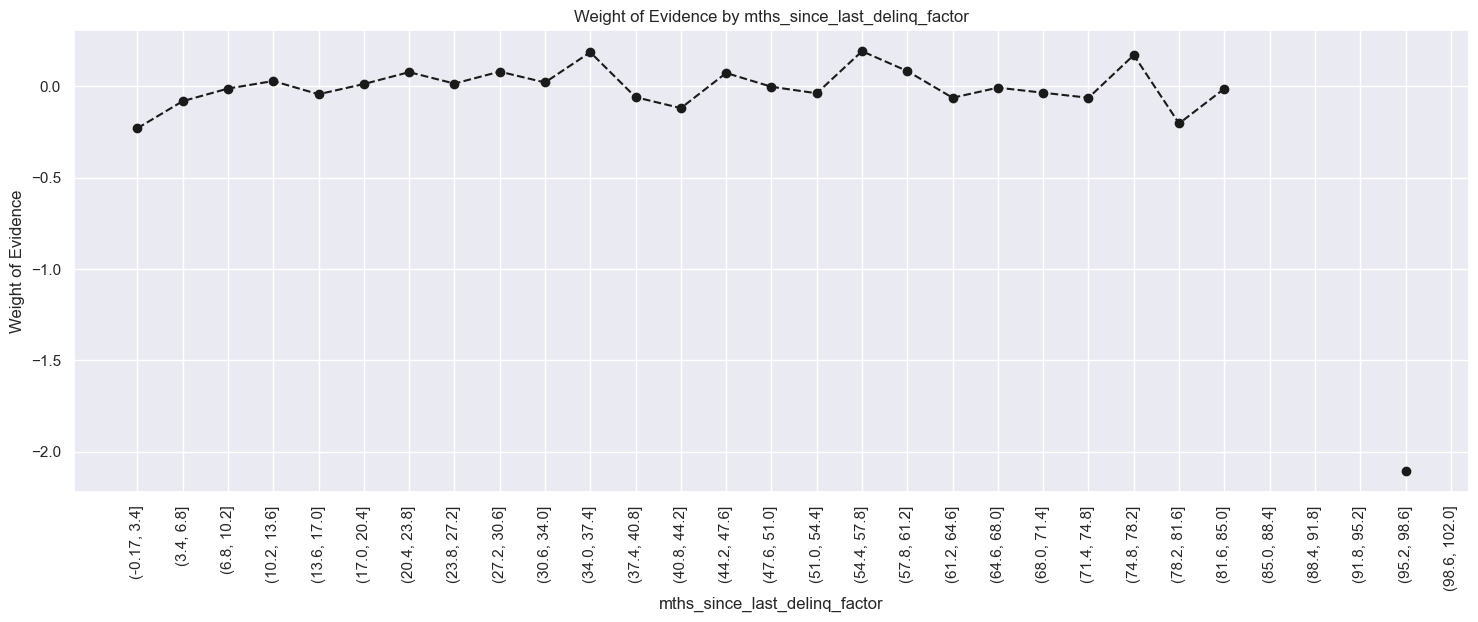

In [170]:
plot_by_woe(df_temp, 90)
# We plot the weight of evidence values.

In [171]:
# Categories: Missing, 0-3, 4-30, 31-56, >=57
df_inputs_prepr['mths_since_last_delinq:Missing'] = np.where((df_inputs_prepr['mths_since_last_delinq'].isnull()), 1, 0)
df_inputs_prepr['mths_since_last_delinq:0-3'] = np.where((df_inputs_prepr['mths_since_last_delinq'] >= 0) & (df_inputs_prepr['mths_since_last_delinq'] <= 3), 1, 0)
df_inputs_prepr['mths_since_last_delinq:4-30'] = np.where((df_inputs_prepr['mths_since_last_delinq'] >= 4) & (df_inputs_prepr['mths_since_last_delinq'] <= 30), 1, 0)
df_inputs_prepr['mths_since_last_delinq:31-56'] = np.where((df_inputs_prepr['mths_since_last_delinq'] >= 31) & (df_inputs_prepr['mths_since_last_delinq'] <= 56), 1, 0)
df_inputs_prepr['mths_since_last_delinq:>=57'] = np.where((df_inputs_prepr['mths_since_last_delinq'] >= 57), 1, 0)

### Preprocessing Continuous Variables: Creating Dummy Variables, Part 3

In [172]:
# dti
df_inputs_prepr['dti_factor'] = pd.cut(df_inputs_prepr['dti'], 100)
# Here we do fine-classing: using the 'cut' method, we split the variable into 100 categories by its values.
df_temp = woe_ordered_continuous(df_inputs_prepr, 'dti_factor', df_targets_prepr)
# We calculate weight of evidence.
df_temp

dti_factor  n_obs  prop_good  prop_n_obs  n_good  n_bad  \
0       (-0.04, 0.4]    231   0.887446    0.001982   205.0   26.0   
1         (0.4, 0.8]    231   0.896104    0.001982   207.0   24.0   
2         (0.8, 1.2]    298   0.902685    0.002556   269.0   29.0   
3         (1.2, 1.6]    331   0.900302    0.002839   298.0   33.0   
4         (1.6, 2.0]    381   0.892388    0.003268   340.0   41.0   
5       (2.0, 2.399]    398   0.909548    0.003414   362.0   36.0   
6     (2.399, 2.799]    443   0.920993    0.003800   408.0   35.0   
7     (2.799, 3.199]    525   0.906667    0.004504   476.0   49.0   
8     (3.199, 3.599]    606   0.930693    0.005199   564.0   42.0   
9     (3.599, 3.999]    698   0.912607    0.005988   637.0   61.0   
10    (3.999, 4.399]    751   0.922770    0.006442   693.0   58.0   
11    (4.399, 4.799]    822   0.911192    0.007051   749.0   73.0   
12    (4.799, 5.199]    871   0.916188    0.007472   798.0   73.0   
13    (5.199, 5.599]   1019   0.916585    0.008741   934.0   85.0   
14    (5.599, 5.999]   1049   0.904671    0.008999   949.0  100.0   
15    (5.999, 6.398]   1111   0.908191    0.009531  1009.0  102.0   
16    (6.398, 6.798]   1195   0.933891    0.010251  1116.0   79.0   
17    (6.798, 7.198]   1253   0.906624    0.010749  1136.0  117.0   
18    (7.198, 7.598]   1302   0.909370    0.011169  1184.0  118.0   
19    (7.598, 7.998]   1474   0.910448    0.012645  1342.0  132.0   
20    (7.998, 8.398]   1454   0.911279    0.012473  1325.0  129.0   
21    (8.398, 8.798]   1460   0.914384    0.012524  1335.0  125.0   
22    (8.798, 9.198]   1599   0.909318    0.013717  1454.0  145.0   
23    (9.198, 9.598]   1633   0.901408    0.014009  1472.0  161.0   
24    (9.598, 9.998]   1723   0.912943    0.014781  1573.0  150.0   
25   (9.998, 10.397]   1805   0.913573    0.015484  1649.0  156.0   
26  (10.397, 10.797]   1901   0.908469    0.016308  1727.0  174.0   
27  (10.797, 11.197]   1977   0.907436    0.016959  1794.0  183.0   
28  (11.197, 11.597]   1985   0.902771    0.017028  1792.0  193.0   
29  (11.597, 11.997]   1934   0.906929    0.016591  1754.0  180.0   
30  (11.997, 12.397]   1994   0.895186    0.017105  1785.0  209.0   
31  (12.397, 12.797]   2172   0.902394    0.018632  1960.0  212.0   
32  (12.797, 13.197]   2039   0.907798    0.017491  1851.0  188.0   
33  (13.197, 13.597]   2114   0.899243    0.018135  1901.0  213.0   
34  (13.597, 13.997]   2139   0.896213    0.018349  1917.0  222.0   
35  (13.997, 14.396]   2134   0.902999    0.018306  1927.0  207.0   
36  (14.396, 14.796]   2243   0.886759    0.019241  1989.0  254.0   
37  (14.796, 15.196]   2151   0.901906    0.018452  1940.0  211.0   
38  (15.196, 15.596]   2103   0.901569    0.018040  1896.0  207.0   
39  (15.596, 15.996]   2203   0.892873    0.018898  1967.0  236.0   
40  (15.996, 16.396]   2106   0.904084    0.018066  1904.0  202.0   
41  (16.396, 16.796]   2103   0.893961    0.018040  1880.0  223.0   
42  (16.796, 17.196]   2207   0.897145    0.018933  1980.0  227.0   
43  (17.196, 17.596]   2120   0.884906    0.018186  1876.0  244.0   
44  (17.596, 17.996]   2087   0.898419    0.017903  1875.0  212.0   
45  (17.996, 18.395]   2106   0.894587    0.018066  1884.0  222.0   
46  (18.395, 18.795]   2054   0.898247    0.017620  1845.0  209.0   
47  (18.795, 19.195]   2056   0.883755    0.017637  1817.0  239.0   
48  (19.195, 19.595]   2033   0.888834    0.017440  1807.0  226.0   
49  (19.595, 19.995]   1946   0.879239    0.016694  1711.0  235.0   
50  (19.995, 20.395]   1875   0.886400    0.016084  1662.0  213.0   
51  (20.395, 20.795]   2038   0.882728    0.017483  1799.0  239.0   
52  (20.795, 21.195]   1866   0.881565    0.016007  1645.0  221.0   
53  (21.195, 21.595]   1835   0.873025    0.015741  1602.0  233.0   
54  (21.595, 21.995]   1819   0.884552    0.015604  1609.0  210.0   
55  (21.995, 22.394]   1745   0.870487    0.014969  1519.0  226.0   
56  (22.394, 22.794]   1631   0.860822    0.013991  1404.0  227.0   
57  (22.

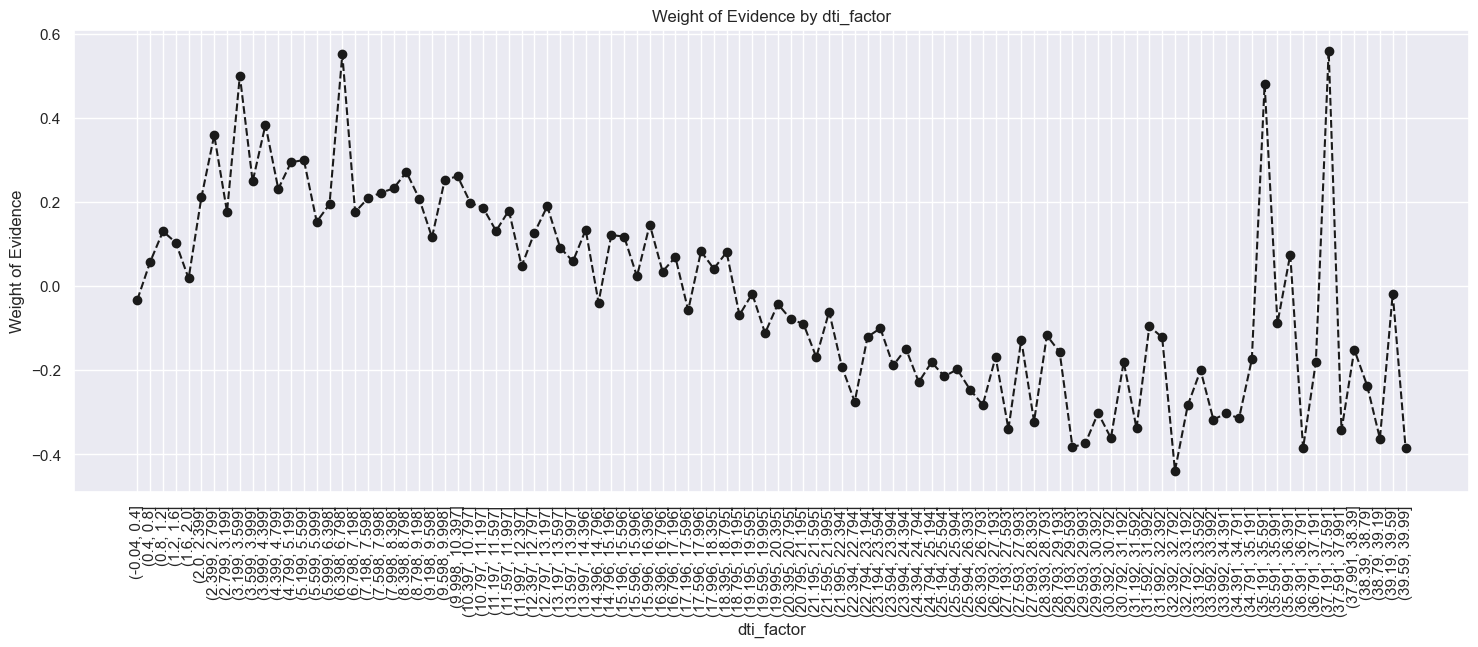

In [173]:
plot_by_woe(df_temp, 90)
# We plot the weight of evidence values.

In [174]:
# Similarly to income, initial examination shows that most values are lower than 200.
# Hence, we are going to have one category for more than 35, and we are going to apply our approach to determine
# the categories of everyone with 150k or less.
df_inputs_prepr_temp = df_inputs_prepr.loc[df_inputs_prepr['dti'] <= 35, : ]

In [175]:
df_inputs_prepr_temp['dti_factor'] = pd.cut(df_inputs_prepr_temp['dti'], 50)
# Here we do fine-classing: using the 'cut' method, we split the variable into 50 categories by its values.
df_temp = woe_ordered_continuous(df_inputs_prepr_temp, 'dti_factor', df_targets_prepr[df_inputs_prepr_temp.index])
# We calculate weight of evidence.
df_temp

dti_factor  n_obs  prop_good  prop_n_obs  n_good  n_bad  prop_n_good  \
0   (-0.035, 0.7]    410   0.890244    0.003544   365.0   45.0     0.003542   
1      (0.7, 1.4]    524   0.900763    0.004530   472.0   52.0     0.004581   
2      (1.4, 2.1]    645   0.899225    0.005576   580.0   65.0     0.005629   
3      (2.1, 2.8]    747   0.915663    0.006458   684.0   63.0     0.006638   
4      (2.8, 3.5]    984   0.921748    0.008506   907.0   77.0     0.008803   
5      (3.5, 4.2]   1212   0.910066    0.010477  1103.0  109.0     0.010705   
6      (4.2, 4.9]   1420   0.918310    0.012275  1304.0  116.0     0.012656   
7      (4.9, 5.6]   1694   0.915584    0.014644  1551.0  143.0     0.015053   
8      (5.6, 6.3]   1877   0.905701    0.016226  1700.0  177.0     0.016499   
9      (6.3, 7.0]   2103   0.926296    0.018180  1948.0  155.0     0.018906   
10     (7.0, 7.7]   2277   0.906017    0.019684  2063.0  214.0     0.020022   
11     (7.7, 8.4]   2550   0.911373    0.022044  2324.0  226.0     0.022555   
12     (8.4, 9.1]   2659   0.910493    0.022986  2421.0  238.0     0.023497   
13     (9.1, 9.8]   2924   0.906977    0.025277  2652.0  272.0     0.025739   
14    (9.8, 10.5]   3154   0.912809    0.027265  2879.0  275.0     0.027942   
15   (10.5, 11.2]   3403   0.907141    0.029418  3087.0  316.0     0.029960   
16   (11.2, 11.9]   3416   0.904274    0.029530  3089.0  327.0     0.029980   
17   (11.9, 12.6]   3546   0.902707    0.030654  3201.0  345.0     0.031067   
18   (12.6, 13.3]   3654   0.902573    0.031587  3298.0  356.0     0.032008   
19   (13.3, 14.0]   3789   0.896543    0.032754  3397.0  392.0     0.032969   
20   (14.0, 14.7]   3822   0.897436    0.033040  3430.0  392.0     0.033289   
21   (14.7, 15.4]   3663   0.899263    0.031665  3294.0  369.0     0.031969   
22   (15.4, 16.1]   3819   0.896046    0.033014  3422.0  397.0     0.033212   
23   (16.1, 16.8]   3669   0.898610    0.031717  3297.0  372.0     0.031999   
24   (16.8, 17.5]   3826   0.887872    0.033074  3397.0  429.0     0.032969   
25   (17.5, 18.2]   3711   0.901105    0.032080  3344.0  367.0     0.032455   
26   (18.2, 18.9]   3591   0.890838    0.031043  3199.0  392.0     0.031047   
27   (18.9, 19.6]   3535   0.889392    0.030559  3144.0  391.0     0.030514   
28   (19.6, 20.3]   3380   0.885207    0.029219  2992.0  388.0     0.029038   
29   (20.3, 21.0]   3493   0.882336    0.030196  3082.0  411.0     0.029912   
30   (21.0, 21.7]   3176   0.877204    0.027455  2786.0  390.0     0.027039   
31   (21.7, 22.4]   3121   0.873438    0.026980  2726.0  395.0     0.026457   
32   (22.4, 23.1]   2822   0.867470    0.024395  2448.0  374.0     0.023759   
33   (23.1, 23.8]   2899   0.880648    0.025061  2553.0  346.0     0.024778   
34   (23.8, 24.5]   2710   0.870480    0.023427  2359.0  351.0     0.022895   
35   (24.5, 25.2]   2481   0.870214    0.021447  2159.0  322.0     0.020954   
36   (25.2, 25.9]   2157   0.866945    0.018646  1870.0  287.0     0.018149   
37   (25.9, 26.6]   2113   0.865121    0.018266  1828.0  285.0     0.017741   
38   (26.6, 27.3]   1953   0.865847    0.016883  1691.0  262.0     0.016412   
39   (27.3, 28.0]   1927   0.868189    0.016658  1673.0  254.0     0.016237   
40   (28.0, 28.7]   1735   0.863977    0.014998  1499.0  236.0     0.014548   
41   (28.7, 29.4]   1645   0.869301    0.014220  1430.0  215.0     0.013879   
42   (29.4, 30.1]   1399   0.845604    0.012094  1183.0  216.0     0.011481   
43   (30.1, 30.8]   1070   0.853271    0.009250   913.0  157.0     0.008861   
44   (30.8, 31.5]   1016   0.870079    0.008783   884.0  132.0     0.008580   
45   (31.5, 32.2]    927   0.872708    0.008014   809.0  118.0     0.007852   
46   (32.2, 32.9]    848   0.858491    0.007331   728.0  120.0     0.007065   
47   (32.9, 33.6]    774   0.856589    0.006691   663.0  111.0     0.006435   
48   (33.6, 34.3]    783   0.858238    0.006769   672.0  111.0     0.006522   
49   (34.3, 35.0]    626   0.856230    0.005412   536.0  

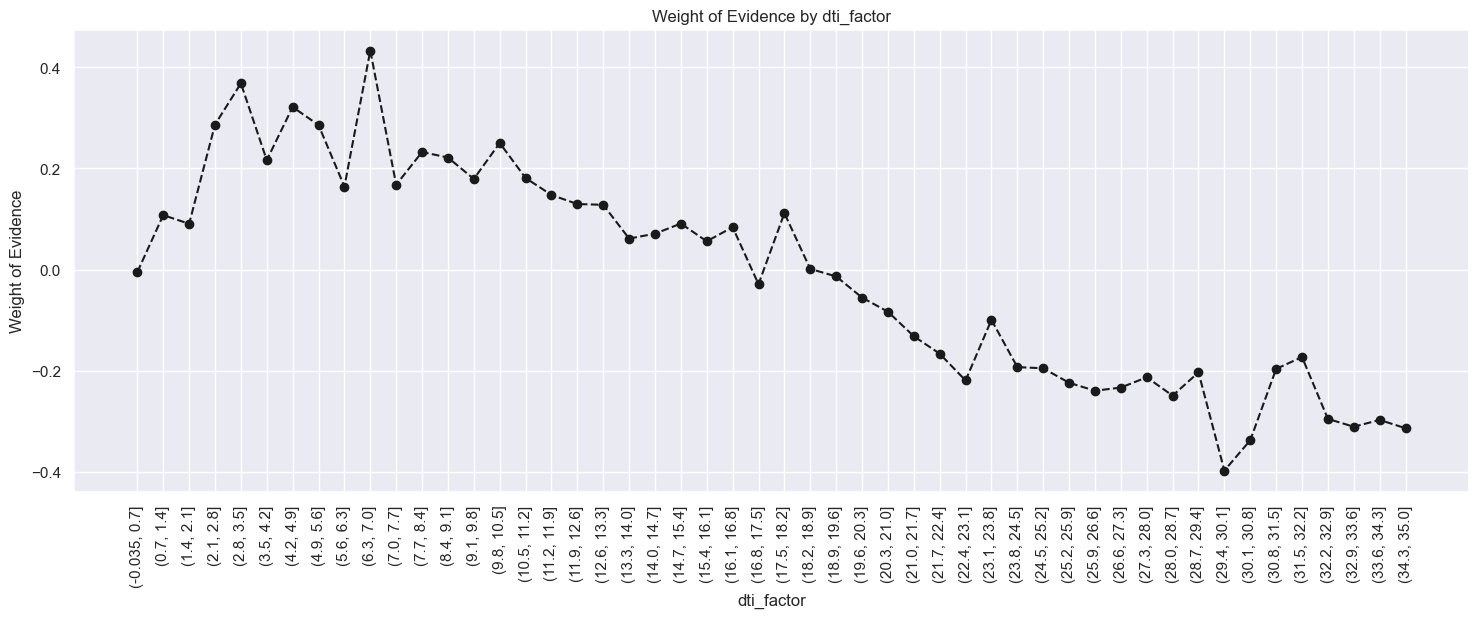

In [176]:
plot_by_woe(df_temp, 90)
# We plot the weight of evidence values.

In [177]:
# Categories:
df_inputs_prepr['dti:<=1.4'] = np.where((df_inputs_prepr['dti'] <= 1.4), 1, 0)
df_inputs_prepr['dti:1.4-3.5'] = np.where((df_inputs_prepr['dti'] > 1.4) & (df_inputs_prepr['dti'] <= 3.5), 1, 0)
df_inputs_prepr['dti:3.5-7.7'] = np.where((df_inputs_prepr['dti'] > 3.5) & (df_inputs_prepr['dti'] <= 7.7), 1, 0)
df_inputs_prepr['dti:7.7-10.5'] = np.where((df_inputs_prepr['dti'] > 7.7) & (df_inputs_prepr['dti'] <= 10.5), 1, 0)
df_inputs_prepr['dti:10.5-16.1'] = np.where((df_inputs_prepr['dti'] > 10.5) & (df_inputs_prepr['dti'] <= 16.1), 1, 0)
df_inputs_prepr['dti:16.1-20.3'] = np.where((df_inputs_prepr['dti'] > 16.1) & (df_inputs_prepr['dti'] <= 20.3), 1, 0)
df_inputs_prepr['dti:20.3-21.7'] = np.where((df_inputs_prepr['dti'] > 20.3) & (df_inputs_prepr['dti'] <= 21.7), 1, 0)
df_inputs_prepr['dti:21.7-22.4'] = np.where((df_inputs_prepr['dti'] > 21.7) & (df_inputs_prepr['dti'] <= 22.4), 1, 0)
df_inputs_prepr['dti:22.4-35'] = np.where((df_inputs_prepr['dti'] > 22.4) & (df_inputs_prepr['dti'] <= 35), 1, 0)
df_inputs_prepr['dti:>35'] = np.where((df_inputs_prepr['dti'] > 35), 1, 0)

In [178]:
# mths_since_last_record
# We have to create one category for missing values and do fine and coarse classing for the rest.
df_inputs_prepr_temp = df_inputs_prepr[pd.notnull(df_inputs_prepr['mths_since_last_record'])]
#sum(loan_data_temp['mths_since_last_record'].isnull())
df_inputs_prepr_temp['mths_since_last_record_factor'] = pd.cut(df_inputs_prepr_temp['mths_since_last_record'], 50)
# Here we do fine-classing: using the 'cut' method, we split the variable into 50 categories by its values.
df_temp = woe_ordered_continuous(df_inputs_prepr_temp, 'mths_since_last_record_factor', df_targets_prepr[df_inputs_prepr_temp.index])
# We calculate weight of evidence.
df_temp

mths_since_last_record_factor  n_obs  prop_good  prop_n_obs  n_good  n_bad  \
0                 (-0.129, 2.58]    309   0.731392    0.019674   226.0   83.0   
1                   (2.58, 5.16]     45   0.911111    0.002865    41.0    4.0   
2                   (5.16, 7.74]     49   0.897959    0.003120    44.0    5.0   
3                  (7.74, 10.32]     85   0.917647    0.005412    78.0    7.0   
4                  (10.32, 12.9]     52   0.865385    0.003311    45.0    7.0   
5                  (12.9, 15.48]     94   0.882979    0.005985    83.0   11.0   
6                 (15.48, 18.06]    111   0.873874    0.007067    97.0   14.0   
7                 (18.06, 20.64]     78   0.935897    0.004966    73.0    5.0   
8                 (20.64, 23.22]    129   0.899225    0.008213   116.0   13.0   
9                  (23.22, 25.8]    108   0.935185    0.006876   101.0    7.0   
10                 (25.8, 28.38]    172   0.906977    0.010951   156.0   16.0   
11                (28.38, 30.96]    126   0.896825    0.008022   113.0   13.0   
12                (30.96, 33.54]    245   0.918367    0.015599   225.0   20.0   
13                (33.54, 36.12]    239   0.899582    0.015217   215.0   24.0   
14                 (36.12, 38.7]    198   0.909091    0.012607   180.0   18.0   
15                 (38.7, 41.28]    285   0.915789    0.018146   261.0   24.0   
16                (41.28, 43.86]    236   0.906780    0.015026   214.0   22.0   
17                (43.86, 46.44]    407   0.916462    0.025914   373.0   34.0   
18                (46.44, 49.02]    447   0.926174    0.028460   414.0   33.0   
19                 (49.02, 51.6]    290   0.941379    0.018464   273.0   17.0   
20                 (51.6, 54.18]    560   0.925000    0.035655   518.0   42.0   
21                (54.18, 56.76]    323   0.900929    0.020565   291.0   32.0   
22                (56.76, 59.34]    491   0.928717    0.031262   456.0   35.0   
23                (59.34, 61.92]    341   0.909091    0.021711   310.0   31.0   
24                 (61.92, 64.5]    527   0.925996    0.033554   488.0   39.0   
25                 (64.5, 67.08]    504   0.952381    0.032090   480.0   24.0   
26                (67.08, 69.66]    334   0.898204    0.021266   300.0   34.0   
27                (69.66, 72.24]    460   0.910870    0.029288   419.0   41.0   
28                (72.24, 74.82]    287   0.923345    0.018273   265.0   22.0   
29                 (74.82, 77.4]    439   0.913440    0.027951   401.0   38.0   
30                 (77.4, 79.98]    305   0.911475    0.019419   278.0   27.0   
31                (79.98, 82.56]    438   0.890411    0.027887   390.0   48.0   
32                (82.56, 85.14]    364   0.906593    0.023176   330.0   34.0   
33                (85.14, 87.72]    302   0.831126    0.019228   251.0   51.0   
34                 (87.72, 90.3]    429   0.883450    0.027314   379.0   50.0   
35                 (90.3, 92.88]    321   0.844237    0.020438   271.0   50.0   
36                (92.88, 95.46]    490   0.857143    0.031198   420.0   70.0   
37                (95.46, 98.04]    521   0.880998    0.033172   459.0   62.0   
38               (98.04, 100.62]    408   0.875000    0.025977   357.0   51.0   
39               (100.62, 103.2]    643   0.884914    0.040940   569.0   74.0   
40               (103.2, 105.78]    500   0.896000    0.031835   448.0   52.0   
41              (105.78, 108.36]    729   0.884774    0.046415   645.0   84.0   
42              (108.36, 110.94]    506   0.897233    0.032217   454.0   52.0   
43              (110.94, 113.52]    653   0.883614    0.041576   577.0   76.0   
44               (113.52, 116.1]    634   0.902208    0.040367   572.0   62.0   
45               (116.1, 118.68]    377   0.877984    0.024004   331.0   46.0   
46              (118.68, 121.26]    114   0.842105    0.007258    96.0   18.0   
47              (121.26, 123.84]      0        NaN    0.000000     NaN    NaN   
48              (123.84, 126.42]  

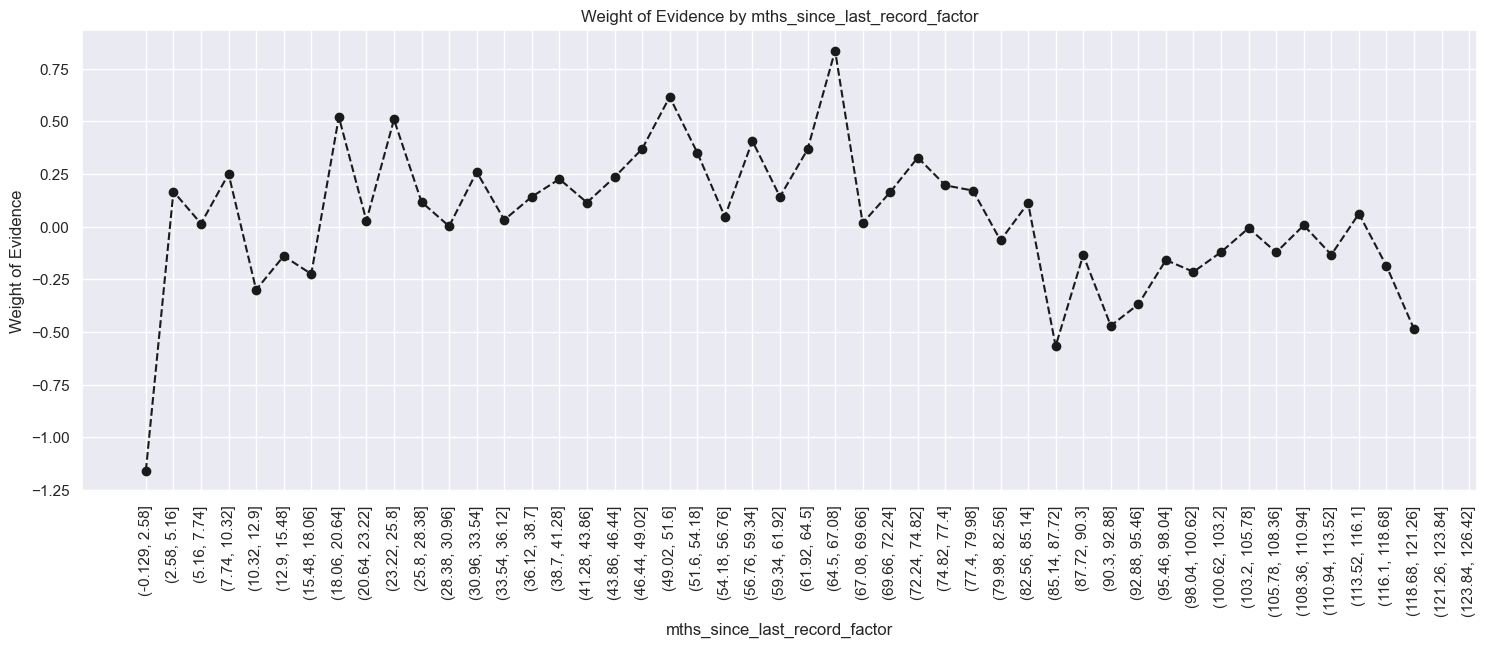

In [179]:
plot_by_woe(df_temp, 90)
# We plot the weight of evidence values.

In [180]:
# Categories: 'Missing', '0-2', '3-20', '21-31', '32-80', '81-86', '>86'
df_inputs_prepr['mths_since_last_record:Missing'] = np.where((df_inputs_prepr['mths_since_last_record'].isnull()), 1, 0)
df_inputs_prepr['mths_since_last_record:0-2'] = np.where((df_inputs_prepr['mths_since_last_record'] >= 0) & (df_inputs_prepr['mths_since_last_record'] <= 2), 1, 0)
df_inputs_prepr['mths_since_last_record:3-20'] = np.where((df_inputs_prepr['mths_since_last_record'] >= 3) & (df_inputs_prepr['mths_since_last_record'] <= 20), 1, 0)
df_inputs_prepr['mths_since_last_record:21-31'] = np.where((df_inputs_prepr['mths_since_last_record'] >= 21) & (df_inputs_prepr['mths_since_last_record'] <= 31), 1, 0)
df_inputs_prepr['mths_since_last_record:32-80'] = np.where((df_inputs_prepr['mths_since_last_record'] >= 32) & (df_inputs_prepr['mths_since_last_record'] <= 80), 1, 0)
df_inputs_prepr['mths_since_last_record:81-86'] = np.where((df_inputs_prepr['mths_since_last_record'] >= 81) & (df_inputs_prepr['mths_since_last_record'] <= 86), 1, 0)
df_inputs_prepr['mths_since_last_record:>86'] = np.where((df_inputs_prepr['mths_since_last_record'] > 86), 1, 0)

In [181]:
loan_data_inputs_test.shape,loan_data_targets_test.shape

((116572, 324), (116572,))

In [182]:
# stored the spilit data into csv file

In [183]:
loan_data_inputs_test.to_csv('loan_data_inputs_test.csv')
loan_data_targets_test.to_csv('loan_data_targets_test.csv')